In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

### Linear Regression For SF

In [2]:
SF  = pd.read_csv("../Dataset/Merge/Merge_SF_ new.csv")

In [3]:
SF.shape

(105109, 43)

In [4]:
SF.columns

Index(['HH:MM (LST)', 'Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Glo Unc (%)', 'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'SUNY Dif Unc (%)', 'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)',
       'METSTAT CSKY Dif Unc (%)', 'Meas Glo (Wh/m^2)', 'Meas Glo Flg',
       'Meas Dir (Wh/m^2)', 'Meas Dir Flg', 'Meas Dif (Wh/m^2)',
       'Meas Dif Flg', 'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)', 'Albedo Flg', 'Power(MW)'],
      dtype='object')

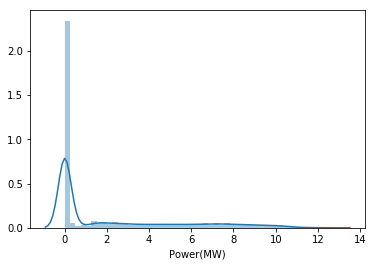

In [5]:
sns.distplot(SF["Power(MW)"])

In [6]:
SF.corr()

,Zenith (deg),Azimuth (deg),ETR (Wh/m^2),ETRN (Wh/m^2),SUNY Glo (Wh/m^2),SUNY Glo Flg,SUNY Glo Unc (%),SUNY Dir (Wh/m^2),SUNY Dir Flg,SUNY Dir Unc (%),...,Precip Wat Flg,AOD (unitless),AOD Flg,AOD RAN (unitless),AOD RAN Flg,Ozone (cm),Ozone Flg,Albedo (unitless),Albedo Flg,Power(MW)
Zenith (deg),1.000000,-0.753465,-0.992932,-0.845858,-0.882723,0.128535,-0.803614,-0.633213,0.128535,-0.803614,...,-0.000323,-0.276863,NaN,-0.093742,NaN,-0.115295,-0.220504,0.154076,NaN,-0.872832
Azimuth (deg),-0.753465,1.000000,0.712182,0.904244,0.605908,0.245610,0.936764,0.519066,0.245610,0.936764,...,0.001154,0.150435,NaN,0.049130,NaN,0.062292,0.268734,-0.089725,NaN,0.553273
ETR (Wh/m^2),-0.992932,0.712182,1.000000,0.823376,0.888315,-0.201276,0.760451,0.639300,-0.201276,0.760451,...,-0.000298,0.249742,NaN,0.084689,NaN,0.110003,0.205703,-0.145566,NaN,0.883668
ETRN (Wh/m^2),-0.845858,0.904244,0.823376,1.000000,0.694645,-0.011370,0.964717,0.597164,-0.011370,0.964717,...,-0.001320,0.126092,NaN,0.042750,NaN,0.055467,0.268387,-0.075480,NaN,0.689463
SUNY Glo (Wh/m^2),-0.882723,0.605908,0.888315,0.694645,1.000000,-0.184498,0.639405,0.873446,-0.184498,0.639405,...,-0.001382,0.239311,NaN,0.097177,NaN,0.089478,0.172549,-0.147101,NaN,0.916849
SUNY Glo Flg,0.128535,0.245610,-0.201276,-0.011370,-0.184498,1.000000,0.195911,-0.115796,1.000000,0.195911,...,0.020835,0.035141,NaN,-0.000936,NaN,0.023156,0.078970,-0.040483,NaN,-0.207073
SUNY Glo Unc (%),-0.803614,0.936764,0.760451,0.964717,0.639405,0.195911,1.000000,0.548704,0.195911,1.000000,...,0.004143,0.160791,NaN,0.052587,NaN,0.067158,0.285327,-0.094431,NaN,0.630367
SUNY Dir (Wh/m^2),-0.633213,0.519066,0.639300,0.597164,0.873446,-0.115796,0.548704,1.000000,-0.115796,0.548704,...,0.001717,0.081081,NaN,0.055688,NaN,0.024373,0.148788,-0.074211,NaN,0.768766
SUNY Dir Flg,0.128535,0.245610,-0.201276,-0.011370,-0.184498,1.000000,0.195911,-0.115796,1.000000,0.195911,...,0.020835,0.035141,NaN,-0.000936,NaN,0.023156,0.078970,-0.040483,NaN,-0.207073
SUNY Dir Unc (%),-0.803614,0.936764,0.760451,0.964717,0.639405,0.195911,1.000000,0.548704,0.195911,1.000000,...,0.004143,0.160791,NaN,0.052587,NaN,0.067158,0.285327,-0.094431,NaN,0.630367


In [7]:
X = SF[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Glo Unc (%)', 'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'SUNY Dif Unc (%)', 'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)',
       'METSTAT CSKY Dif Unc (%)', 'Meas Glo (Wh/m^2)', 'Meas Glo Flg',
       'Meas Dir (Wh/m^2)', 'Meas Dir Flg', 'Meas Dif (Wh/m^2)',
       'Meas Dif Flg', 'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)', 'Albedo Flg','SUNY Dir (Wh/m^2)']]
y = SF["Power(MW)"]

In [8]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

In [9]:
model.summary()

c:\users\deepe\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
c:\users\deepe\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\deepe\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\deepe\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 4.221e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        01:32:01   Log-Likelihood:            -1.4603e+05
No. Observations:              105109   AIC:                         2.921e+05
Df Residuals:                  105084   BIC:                         2.924e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.0530      0.003     15.380      0.000       0.046       0.060
Azimuth (deg)                -0.0081   6.37e-05   -126.554      0.000      -0.008      -0.008
ETR (Wh/m^2)                 -0.0106      0.000    -30.949      0.000      -0.011      -0.010
ETRN (Wh/m^2)                 0.0004   4.41e-05      9.155      0.000       0.000       0.000
SUNY Glo (Wh/m^2)             0.0021      0.000     19.148      0.000       0.002       0.002
SUNY Glo Flg                750.3087   3431.235      0.219      0.827   -5974.866    7475.483
SUNY Glo Unc (%)           7.248e+06   1.28e+07      0.564      0.572   -1.79e+07    3.24e+07
SUNY Dir (Wh/m^2)         -1.278e+07   6.54e+07     -0.195      0.845   -1.41e+08    1.15e+08
SUNY Dir Flg               -395.8117   1064.431     -0.372      0.710   -2482.083    1690.460
SUNY Dir Unc (%)          -2.643e+06   2.99e+06     -0.885      0.376    -8.5e+06    3.21e+06
SUNY Dif (Wh/m^2)             0.0070      0.000     64.524      0.000       0.007       0.007
SUNY Dif Flg               -354.1440   2415.360     -0.147      0.883   -5088.217    4379.929
SUNY Dif Unc (%)           7.249e+06   1.28e+07      0.564      0.572   -1.79e+07    3.24e+07
METSTAT Glo (Wh/m^2)          0.0038      0.000     36.282      0.000       0.004       0.004
METSTAT Glo Unc (%)        1.149e+05   1.76e+05      0.652      0.514    -2.3e+05     4.6e+05
METSTAT Dir (Wh/m^2)       1.776e-05   6.82e-05      0.260      0.795      -0.000       0.000
METSTAT Dir Unc (%)       -2.296e+05   3.52e+05     -0.652      0.515    -9.2e+05    4.61e+05
METSTAT Dif (Wh/m^2)         -0.0020      0.000    -15.346      0.000      -0.002      -0.002
METSTAT Dif Unc (%)        1.147e+05   1.76e+05      0.651      0.515   -2.31e+05     4.6e+05
METSTAT CSKY Glo (Wh/m^2)     0.0164      0.000     37.804      0.000       0.016       0.017
METSTAT CSKY Glo Unc (%)  -1.037e+07   1.43e+07     -0.725      0.468   -3.84e+07    1.77e+07
METSTAT CSKY Dir (Wh/m^2)     0.0010   8.45e-05     11.863      0.000       0.001       0.001
METSTAT CSKY Dir Unc (%)   8.229e+06    8.8e+06      0.935      0.350   -9.02e+06    2.55e+07
METSTAT CSKY Dif (Wh/m^2)     0.0078      0.000     27.752      0.000       0.007       0.008
METSTAT CSKY Dif Unc (%)  -1.037e+07   1.43e+07     -0.725      0.468   -3.84e+07    1.77e+07
Meas Glo (Wh/m^2)         -7.534e+06   3.25e+07     -0.232      0.817   -7.12e+07    5.62e+07
Meas Glo Flg              -3.572e+04   3.07e+05     -0.116      0.907   -6.38e+05    5.67e+05
Meas Dir (Wh/m^2)          3.767e+06   1.62e+07      0.232      0.817   -2.81e+07    3.56e+07
Meas Dir Flg              -3.572e+04   3.07e+05     -0.116      0.907   -6.38e+05    5.67e+05
Meas Dif (Wh/m^2)          3.767e+06   1.62e+07      0.232      0.817   -2.

In [17]:
X = SF[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Glo Unc (%)', 'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'SUNY Dif Unc (%)', 'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)',
       'METSTAT CSKY Dif Unc (%)', 'Meas Glo (Wh/m^2)',
       'Meas Dir (Wh/m^2)',  'Meas Dif (Wh/m^2)',
     'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)', 'Albedo Flg','SUNY Dir (Wh/m^2)']]
y = SF["Power(MW)"]

In [18]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 4.221e+04
Date:                Wed, 27 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:09:47   Log-Likelihood:            -1.4603e+05
No. Observations:              105109   AIC:                         2.921e+05
Df Residuals:                  105084   BIC:                         2.924e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.0530      0.003     15.380      0.000       0.046       0.060
Azimuth (deg)                -0.0081   6.37e-05   -126.558      0.000      -0.008      -0.008
ETR (Wh/m^2)                 -0.0106      0.000    -30.949      0.000      -0.011      -0.010
ETRN (Wh/m^2)                 0.0004   4.41e-05      9.157      0.000       0.000       0.000
SUNY Glo (Wh/m^2)             0.0021      0.000     19.147      0.000       0.002       0.002
SUNY Glo Flg                335.1256   2465.431      0.136      0.892   -4497.086    5167.337
SUNY Glo Unc (%)            7.25e+06   1.28e+07      0.564      0.572   -1.79e+07    3.24e+07
SUNY Dir (Wh/m^2)         -1.279e+07   6.54e+07     -0.195      0.845   -1.41e+08    1.15e+08
SUNY Dir Flg               -684.6862   2732.734     -0.251      0.802   -6040.809    4671.436
SUNY Dir Unc (%)          -2.643e+06   2.99e+06     -0.885      0.376    -8.5e+06    3.21e+06
SUNY Dif (Wh/m^2)             0.0070      0.000     64.523      0.000       0.007       0.007
SUNY Dif Flg                349.9135    536.552      0.652      0.514    -701.721    1401.548
SUNY Dif Unc (%)            7.25e+06   1.28e+07      0.565      0.572   -1.79e+07    3.24e+07
METSTAT Glo (Wh/m^2)          0.0038      0.000     36.281      0.000       0.004       0.004
METSTAT Glo Unc (%)        1.146e+05   1.76e+05      0.651      0.515    -2.3e+05     4.6e+05
METSTAT Dir (Wh/m^2)       1.776e-05   6.82e-05      0.260      0.795      -0.000       0.000
METSTAT Dir Unc (%)       -2.291e+05   3.52e+05     -0.651      0.515   -9.19e+05    4.61e+05
METSTAT Dif (Wh/m^2)         -0.0020      0.000    -15.346      0.000      -0.002      -0.002
METSTAT Dif Unc (%)        1.145e+05   1.76e+05      0.651      0.515   -2.31e+05     4.6e+05
METSTAT CSKY Glo (Wh/m^2)     0.0164      0.000     37.806      0.000       0.016       0.017
METSTAT CSKY Glo Unc (%)  -1.037e+07   1.43e+07     -0.725      0.468   -3.84e+07    1.77e+07
METSTAT CSKY Dir (Wh/m^2)     0.0010   8.45e-05     11.863      0.000       0.001       0.001
METSTAT CSKY Dir Unc (%)   8.228e+06    8.8e+06      0.935      0.350   -9.02e+06    2.55e+07
METSTAT CSKY Dif (Wh/m^2)     0.0078      0.000     27.752      0.000       0.007       0.008
METSTAT CSKY Dif Unc (%)  -1.037e+07   1.43e+07     -0.725      0.468   -3.84e+07    1.77e+07
Meas Glo (Wh/m^2)         -7.517e+06   3.25e+07     -0.231      0.817   -7.12e+07    5.62e+07
Meas Dir (Wh/m^2)          3.759e+06   1.63e+07      0.231      0.817   -2.81e+07    3.56e+07
Meas Dif (Wh/m^2)          3.759e+06   1.63e+07      0.231      0.817   -2.81e+07    3.56e+07
Precip Wat (cm)              -0.0620      0.006    -10.571      0.000      -0.073      -0.050
Precip Wat Flg                0.0011      0.000      5.853      0.000      

In [20]:
X = SF[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)',
       'SUNY Glo Unc (%)', 'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'SUNY Dif Unc (%)', 'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)',
       'METSTAT CSKY Dif Unc (%)', 'Meas Glo (Wh/m^2)',
       'Meas Dir (Wh/m^2)',  'Meas Dif (Wh/m^2)',
     'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)', 'Albedo Flg','SUNY Dir (Wh/m^2)']]
y = SF["Power(MW)"]

In [21]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 4.221e+04
Date:                Wed, 27 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:12:26   Log-Likelihood:            -1.4603e+05
No. Observations:              105109   AIC:                         2.921e+05
Df Residuals:                  105084   BIC:                         2.924e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.0530      0.003     15.503      0.000       0.046       0.060
Azimuth (deg)                -0.0081   6.37e-05   -126.600      0.000      -0.008      -0.008
ETR (Wh/m^2)                 -0.0106      0.000    -30.995      0.000      -0.011      -0.010
ETRN (Wh/m^2)                 0.0004   4.36e-05      9.238      0.000       0.000       0.000
SUNY Glo (Wh/m^2)             0.0021      0.000     19.127      0.000       0.002       0.002
SUNY Glo Unc (%)           7.368e+06    1.3e+07      0.565      0.572   -1.82e+07    3.29e+07
SUNY Dir (Wh/m^2)          5.557e+06   2.97e+07      0.187      0.852   -5.27e+07    6.38e+07
SUNY Dir Flg                 36.9418     61.362      0.602      0.547     -83.326     157.210
SUNY Dir Unc (%)          -2.662e+06      3e+06     -0.886      0.375   -8.55e+06    3.23e+06
SUNY Dif (Wh/m^2)             0.0070      0.000     64.523      0.000       0.007       0.007
SUNY Dif Flg                -36.5892     61.362     -0.596      0.551    -156.857      83.679
SUNY Dif Unc (%)           7.368e+06    1.3e+07      0.565      0.572   -1.82e+07    3.29e+07
METSTAT Glo (Wh/m^2)          0.0038      0.000     36.286      0.000       0.004       0.004
METSTAT Glo Unc (%)        1.093e+05   1.73e+05      0.631      0.528    -2.3e+05    4.49e+05
METSTAT Dir (Wh/m^2)       1.773e-05   6.82e-05      0.260      0.795      -0.000       0.000
METSTAT Dir Unc (%)       -2.185e+05   3.47e+05     -0.630      0.528   -8.98e+05    4.61e+05
METSTAT Dif (Wh/m^2)         -0.0020      0.000    -15.348      0.000      -0.002      -0.002
METSTAT Dif Unc (%)        1.092e+05   1.73e+05      0.630      0.529    -2.3e+05    4.49e+05
METSTAT CSKY Glo (Wh/m^2)     0.0164      0.000     37.868      0.000       0.016       0.017
METSTAT CSKY Glo Unc (%)   -1.05e+07   1.45e+07     -0.723      0.470    -3.9e+07     1.8e+07
METSTAT CSKY Dir (Wh/m^2)     0.0010   8.43e-05     11.890      0.000       0.001       0.001
METSTAT CSKY Dir Unc (%)   8.295e+06   8.89e+06      0.933      0.351   -9.13e+06    2.57e+07
METSTAT CSKY Dif (Wh/m^2)     0.0078      0.000     27.739      0.000       0.007       0.008
METSTAT CSKY Dif Unc (%)   -1.05e+07   1.45e+07     -0.723      0.470    -3.9e+07     1.8e+07
Meas Glo (Wh/m^2)          5.175e+06   2.27e+07      0.228      0.819   -3.92e+07    4.96e+07
Meas Dir (Wh/m^2)         -2.588e+06   1.13e+07     -0.228      0.819   -2.48e+07    1.96e+07
Meas Dif (Wh/m^2)         -2.588e+06   1.13e+07     -0.228      0.819   -2.48e+07    1.96e+07
Precip Wat (cm)              -0.0620      0.006    -10.570      0.000      -0.073      -0.050
Precip Wat Flg                0.0011      0.000      5.850      0.000       0.001       0.002
AOD (unitless)               -4.0347      0.157    -25.689      0.000      

In [23]:
X = SF[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)',
       'SUNY Glo Unc (%)', 'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'SUNY Dif Unc (%)', 'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)',
       'METSTAT CSKY Dif Unc (%)', 'Meas Glo (Wh/m^2)',
       'Meas Dir (Wh/m^2)',  'Meas Dif (Wh/m^2)',
     'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
      'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)', 'Albedo Flg','SUNY Dir (Wh/m^2)']]
y = SF["Power(MW)"]

In [24]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 4.221e+04
Date:                Wed, 27 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:14:19   Log-Likelihood:            -1.4603e+05
No. Observations:              105109   AIC:                         2.921e+05
Df Residuals:                  105084   BIC:                         2.924e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.0530      0.003     15.503      0.000       0.046       0.060
Azimuth (deg)                -0.0081   6.37e-05   -126.605      0.000      -0.008      -0.008
ETR (Wh/m^2)                 -0.0106      0.000    -30.990      0.000      -0.011      -0.010
ETRN (Wh/m^2)                 0.0004   4.36e-05      9.233      0.000       0.000       0.000
SUNY Glo (Wh/m^2)             0.0021      0.000     19.134      0.000       0.002       0.002
SUNY Glo Unc (%)           7.368e+06    1.3e+07      0.565      0.572   -1.82e+07    3.29e+07
SUNY Dir (Wh/m^2)          5.554e+06   2.97e+07      0.187      0.852   -5.27e+07    6.38e+07
SUNY Dir Flg                166.8432    305.528      0.546      0.585    -431.988     765.674
SUNY Dir Unc (%)          -2.662e+06      3e+06     -0.886      0.376   -8.55e+06    3.23e+06
SUNY Dif (Wh/m^2)             0.0070      0.000     64.523      0.000       0.007       0.007
SUNY Dif Flg               -166.4906    305.528     -0.545      0.586    -765.322     432.340
SUNY Dif Unc (%)           7.369e+06    1.3e+07      0.565      0.572   -1.82e+07    3.29e+07
METSTAT Glo (Wh/m^2)          0.0038      0.000     36.286      0.000       0.004       0.004
METSTAT Glo Unc (%)        1.105e+05   1.74e+05      0.636      0.525    -2.3e+05    4.51e+05
METSTAT Dir (Wh/m^2)       1.773e-05   6.82e-05      0.260      0.795      -0.000       0.000
METSTAT Dir Unc (%)       -2.208e+05   3.47e+05     -0.636      0.525   -9.02e+05     4.6e+05
METSTAT Dif (Wh/m^2)         -0.0020      0.000    -15.348      0.000      -0.002      -0.002
METSTAT Dif Unc (%)        1.104e+05   1.74e+05      0.635      0.525    -2.3e+05    4.51e+05
METSTAT CSKY Glo (Wh/m^2)     0.0164      0.000     37.872      0.000       0.016       0.017
METSTAT CSKY Glo Unc (%)   -1.05e+07   1.45e+07     -0.723      0.470    -3.9e+07     1.8e+07
METSTAT CSKY Dir (Wh/m^2)     0.0010   8.43e-05     11.890      0.000       0.001       0.001
METSTAT CSKY Dir Unc (%)   8.295e+06   8.89e+06      0.933      0.351   -9.13e+06    2.57e+07
METSTAT CSKY Dif (Wh/m^2)     0.0078      0.000     27.742      0.000       0.007       0.008
METSTAT CSKY Dif Unc (%)   -1.05e+07   1.45e+07     -0.723      0.470    -3.9e+07     1.8e+07
Meas Glo (Wh/m^2)          5.175e+06   2.27e+07      0.228      0.819   -3.92e+07    4.96e+07
Meas Dir (Wh/m^2)         -2.588e+06   1.13e+07     -0.228      0.819   -2.48e+07    1.96e+07
Meas Dif (Wh/m^2)         -2.588e+06   1.13e+07     -0.228      0.819   -2.48e+07    1.96e+07
Precip Wat (cm)              -0.0620      0.006    -10.570      0.000      -0.073      -0.050
Precip Wat Flg                0.0011      0.000      5.851      0.000       0.001       0.002
AOD (unitless)               -4.0347      0.157    -25.689      0.000      

In [25]:
X = SF[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)',
       'SUNY Glo Unc (%)', 'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'SUNY Dif Unc (%)', 'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)',
       'METSTAT CSKY Dif Unc (%)', 'Meas Glo (Wh/m^2)',
       'Meas Dir (Wh/m^2)',  'Meas Dif (Wh/m^2)',
     'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
      'AOD RAN (unitless)', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)', 'Albedo Flg','SUNY Dir (Wh/m^2)']]
y = SF["Power(MW)"]

In [26]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 4.221e+04
Date:                Wed, 27 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:15:21   Log-Likelihood:            -1.4603e+05
No. Observations:              105109   AIC:                         2.921e+05
Df Residuals:                  105084   BIC:                         2.924e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.0530      0.003     15.502      0.000       0.046       0.060
Azimuth (deg)                -0.0081   6.37e-05   -126.600      0.000      -0.008      -0.008
ETR (Wh/m^2)                 -0.0106      0.000    -30.996      0.000      -0.011      -0.010
ETRN (Wh/m^2)                 0.0004   4.36e-05      9.238      0.000       0.000       0.000
SUNY Glo (Wh/m^2)             0.0021      0.000     19.127      0.000       0.002       0.002
SUNY Glo Unc (%)           7.368e+06    1.3e+07      0.565      0.572   -1.82e+07    3.29e+07
SUNY Dir (Wh/m^2)          5.553e+06   2.97e+07      0.187      0.852   -5.27e+07    6.38e+07
SUNY Dir Flg               -206.8248    308.872     -0.670      0.503    -812.211     398.561
SUNY Dir Unc (%)          -2.662e+06      3e+06     -0.886      0.376   -8.55e+06    3.23e+06
SUNY Dif (Wh/m^2)             0.0070      0.000     64.522      0.000       0.007       0.007
SUNY Dif Flg                207.1775    308.872      0.671      0.502    -398.208     812.563
SUNY Dif Unc (%)           7.369e+06    1.3e+07      0.565      0.572   -1.82e+07    3.29e+07
METSTAT Glo (Wh/m^2)          0.0038      0.000     36.286      0.000       0.004       0.004
METSTAT Glo Unc (%)        1.098e+05   1.73e+05      0.633      0.527    -2.3e+05     4.5e+05
METSTAT Dir (Wh/m^2)       1.773e-05   6.82e-05      0.260      0.795      -0.000       0.000
METSTAT Dir Unc (%)       -2.199e+05   3.47e+05     -0.634      0.526      -9e+05     4.6e+05
METSTAT Dif (Wh/m^2)         -0.0020      0.000    -15.348      0.000      -0.002      -0.002
METSTAT Dif Unc (%)          1.1e+05   1.73e+05      0.634      0.526    -2.3e+05     4.5e+05
METSTAT CSKY Glo (Wh/m^2)     0.0164      0.000     37.868      0.000       0.016       0.017
METSTAT CSKY Glo Unc (%)   -1.05e+07   1.45e+07     -0.723      0.470    -3.9e+07     1.8e+07
METSTAT CSKY Dir (Wh/m^2)     0.0010   8.43e-05     11.890      0.000       0.001       0.001
METSTAT CSKY Dir Unc (%)   8.295e+06   8.89e+06      0.933      0.351   -9.13e+06    2.57e+07
METSTAT CSKY Dif (Wh/m^2)     0.0078      0.000     27.739      0.000       0.007       0.008
METSTAT CSKY Dif Unc (%)   -1.05e+07   1.45e+07     -0.723      0.470    -3.9e+07     1.8e+07
Meas Glo (Wh/m^2)          5.175e+06   2.27e+07      0.228      0.819   -3.92e+07    4.96e+07
Meas Dir (Wh/m^2)         -2.588e+06   1.13e+07     -0.228      0.819   -2.48e+07    1.96e+07
Meas Dif (Wh/m^2)         -2.588e+06   1.13e+07     -0.228      0.819   -2.48e+07    1.96e+07
Precip Wat (cm)              -0.0620      0.006    -10.570      0.000      -0.073      -0.050
Precip Wat Flg                0.0011      0.000      5.850      0.000       0.001       0.002
AOD (unitless)               -4.0347      0.157    -25.689      0.000      

In [27]:
X = SF[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)',
       'SUNY Glo Unc (%)',  'SUNY Dir Flg',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'SUNY Dif Unc (%)', 'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)',
       'METSTAT CSKY Dif Unc (%)', 'Meas Glo (Wh/m^2)',
       'Meas Dir (Wh/m^2)',  'Meas Dif (Wh/m^2)',
     'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
      'AOD RAN (unitless)', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)', 'Albedo Flg']]
y = SF["Power(MW)"]

In [28]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 4.293e+04
Date:                Wed, 27 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:20:47   Log-Likelihood:            -1.4726e+05
No. Observations:              105109   AIC:                         2.946e+05
Df Residuals:                  105085   BIC:                         2.948e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.0597      0.003     17.194      0.000       0.053       0.067
Azimuth (deg)                -0.0084   6.41e-05   -130.648      0.000      -0.009      -0.008
ETR (Wh/m^2)                 -0.0084      0.000    -24.559      0.000      -0.009      -0.008
ETRN (Wh/m^2)                 0.0005   4.31e-05     12.063      0.000       0.000       0.001
SUNY Glo (Wh/m^2)             0.0064   3.13e-05    203.659      0.000       0.006       0.006
SUNY Glo Unc (%)           8.779e+06    1.3e+07      0.676      0.499   -1.67e+07    3.42e+07
SUNY Dir Flg                  9.5233     12.255      0.777      0.437     -14.497      33.543
SUNY Dir Unc (%)          -3.233e+06   3.03e+06     -1.068      0.285   -9.17e+06     2.7e+06
SUNY Dif (Wh/m^2)             0.0034    8.3e-05     41.387      0.000       0.003       0.004
SUNY Dif Flg                 -8.9761     12.255     -0.732      0.464     -32.996      15.044
SUNY Dif Unc (%)            8.78e+06    1.3e+07      0.676      0.499   -1.67e+07    3.42e+07
METSTAT Glo (Wh/m^2)          0.0016   9.71e-05     16.306      0.000       0.001       0.002
METSTAT Glo Unc (%)        1.326e+05   1.75e+05      0.757      0.449   -2.11e+05    4.76e+05
METSTAT Dir (Wh/m^2)          0.0017   5.99e-05     29.130      0.000       0.002       0.002
METSTAT Dir Unc (%)       -2.652e+05    3.5e+05     -0.757      0.449   -9.52e+05    4.22e+05
METSTAT Dif (Wh/m^2)          0.0004      0.000      3.339      0.001       0.000       0.001
METSTAT Dif Unc (%)        1.326e+05   1.75e+05      0.757      0.449   -2.11e+05    4.76e+05
METSTAT CSKY Glo (Wh/m^2)     0.0139      0.000     31.603      0.000       0.013       0.015
METSTAT CSKY Glo Unc (%)  -1.258e+07   1.45e+07     -0.870      0.384   -4.09e+07    1.58e+07
METSTAT CSKY Dir (Wh/m^2)     0.0011   8.56e-05     12.390      0.000       0.001       0.001
METSTAT CSKY Dir Unc (%)   1.003e+07   8.91e+06      1.125      0.260   -7.44e+06    2.75e+07
METSTAT CSKY Dif (Wh/m^2)     0.0067      0.000     23.347      0.000       0.006       0.007
METSTAT CSKY Dif Unc (%)  -1.258e+07   1.45e+07     -0.870      0.384   -4.09e+07    1.58e+07
Meas Glo (Wh/m^2)          5.172e+06   1.94e+07      0.266      0.790   -3.29e+07    4.32e+07
Meas Dir (Wh/m^2)         -2.586e+06   9.71e+06     -0.266      0.790   -2.16e+07    1.64e+07
Meas Dif (Wh/m^2)         -2.586e+06   9.71e+06     -0.266      0.790   -2.16e+07    1.64e+07
Precip Wat (cm)              -0.0915      0.006    -15.505      0.000      -0.103      -0.080
Precip Wat Flg                0.0013      0.000      6.686      0.000       0.001       0.002
AOD (unitless)               -5.1498      0.157    -32.742      0.000      -5.458      -4.841
AOD RAN (unitless)            1.3599      0.065     20.762      0.000      

In [29]:
X = SF[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)',
       'SUNY Glo Unc (%)',  'SUNY Dir Flg',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'SUNY Dif Unc (%)', 'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)',
       'METSTAT CSKY Dif Unc (%)','Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
      'AOD RAN (unitless)', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)', 'Albedo Flg']]
y = SF["Power(MW)"]

In [30]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 6.142e+04
Date:                Wed, 27 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:31:54   Log-Likelihood:            -1.4747e+05
No. Observations:              105109   AIC:                         2.950e+05
Df Residuals:                  105085   BIC:                         2.952e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.0093      0.001     16.688      0.000       0.008       0.010
Azimuth (deg)                -0.0084   6.99e-05   -120.623      0.000      -0.009      -0.008
ETR (Wh/m^2)                 -0.0083      0.000    -24.280      0.000      -0.009      -0.008
ETRN (Wh/m^2)                 0.0003   4.03e-05      6.466      0.000       0.000       0.000
SUNY Glo (Wh/m^2)             0.0063   3.12e-05    202.415      0.000       0.006       0.006
SUNY Glo Unc (%)            1.14e+07   1.79e+07      0.639      0.523   -2.36e+07    4.64e+07
SUNY Dir Flg               -176.4620   3309.835     -0.053      0.957   -6663.693    6310.769
SUNY Dir Unc (%)          -1.363e+07   9.12e+07     -0.149      0.881   -1.92e+08    1.65e+08
SUNY Dif (Wh/m^2)             0.0033   8.26e-05     40.071      0.000       0.003       0.003
SUNY Dif Flg                177.0428   3309.835      0.053      0.957   -6310.189    6664.274
SUNY Dif Unc (%)           1.169e+07   1.99e+07      0.589      0.556   -2.72e+07    5.06e+07
METSTAT Glo (Wh/m^2)          0.0013   9.56e-05     14.102      0.000       0.001       0.002
METSTAT Glo Unc (%)       -1.434e+07   1.39e+08     -0.103      0.918   -2.86e+08    2.57e+08
METSTAT Dir (Wh/m^2)          0.0019   5.91e-05     31.988      0.000       0.002       0.002
METSTAT Dir Unc (%)        2.867e+07   2.77e+08      0.103      0.918   -5.15e+08    5.72e+08
METSTAT Dif (Wh/m^2)          0.0007      0.000      5.781      0.000       0.000       0.001
METSTAT Dif Unc (%)       -1.433e+07   1.39e+08     -0.103      0.918   -2.86e+08    2.57e+08
METSTAT CSKY Glo (Wh/m^2)     0.0103      0.000     27.730      0.000       0.010       0.011
METSTAT CSKY Glo Unc (%)  -1.322e+07    2.2e+07     -0.601      0.548   -5.63e+07    2.99e+07
METSTAT CSKY Dir (Wh/m^2)     0.0018   7.01e-05     25.185      0.000       0.002       0.002
METSTAT CSKY Dir Unc (%)   1.238e+07   8.96e+06      1.381      0.167   -5.19e+06    2.99e+07
METSTAT CSKY Dif (Wh/m^2)     0.0062      0.000     21.724      0.000       0.006       0.007
METSTAT CSKY Dif Unc (%)  -1.322e+07    2.2e+07     -0.601      0.548   -5.63e+07    2.99e+07
Precip Wat (cm)              -0.1081      0.006    -18.451      0.000      -0.120      -0.097
Precip Wat Flg                0.0013      0.000      6.714      0.000       0.001       0.002
AOD (unitless)               -6.0429      0.152    -39.854      0.000      -6.340      -5.746
AOD RAN (unitless)            1.5383      0.065     23.641      0.000       1.411       1.666
Ozone (cm)                   -3.0409      0.110    -27.526      0.000      -3.257      -2.824
Ozone Flg                    -0.0023      0.000     -5.403      0.000      -0.003      -0.001
Albedo (unitless)             0.4859      0.153      3.171      0.002      

In [31]:
X = SF[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)',
       'SUNY Glo Unc (%)','SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)',    
    'SUNY Dif Unc (%)', 'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)',
       'METSTAT CSKY Dif Unc (%)','Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
      'AOD RAN (unitless)', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)', 'Albedo Flg']]
y = SF["Power(MW)"]

In [32]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 6.114e+04
Date:                Wed, 27 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:37:18   Log-Likelihood:            -1.4770e+05
No. Observations:              105109   AIC:                         2.954e+05
Df Residuals:                  105085   BIC:                         2.957e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.0102      0.001     18.278      0.000       0.009       0.011
Azimuth (deg)                -0.0080   6.71e-05   -119.310      0.000      -0.008      -0.008
ETR (Wh/m^2)                 -0.0096      0.000    -28.385      0.000      -0.010      -0.009
ETRN (Wh/m^2)             -3.345e-05   3.79e-05     -0.883      0.377      -0.000    4.08e-05
SUNY Glo (Wh/m^2)             0.0063   3.13e-05    201.665      0.000       0.006       0.006
SUNY Glo Unc (%)           1.184e+07   1.79e+07      0.663      0.508   -2.32e+07    4.69e+07
SUNY Dir Unc (%)          -1.345e+07   9.14e+07     -0.147      0.883   -1.93e+08    1.66e+08
SUNY Dif (Wh/m^2)             0.0033   8.27e-05     39.287      0.000       0.003       0.003
SUNY Dif Unc (%)           1.212e+07   1.99e+07      0.609      0.542   -2.69e+07    5.11e+07
METSTAT Glo (Wh/m^2)          0.0013   9.58e-05     13.901      0.000       0.001       0.002
METSTAT Glo Unc (%)       -1.367e+07   1.39e+08     -0.098      0.922   -2.86e+08    2.59e+08
METSTAT Dir (Wh/m^2)          0.0019   5.92e-05     31.812      0.000       0.002       0.002
METSTAT Dir Unc (%)        2.733e+07   2.78e+08      0.098      0.922   -5.17e+08    5.72e+08
METSTAT Dif (Wh/m^2)          0.0007      0.000      5.739      0.000       0.000       0.001
METSTAT Dif Unc (%)       -1.366e+07   1.39e+08     -0.098      0.922   -2.86e+08    2.58e+08
METSTAT CSKY Glo (Wh/m^2)     0.0118      0.000     32.387      0.000       0.011       0.012
METSTAT CSKY Glo Unc (%)  -1.409e+07    2.2e+07     -0.640      0.522   -5.72e+07    2.91e+07
METSTAT CSKY Dir (Wh/m^2)     0.0017   7.02e-05     24.063      0.000       0.002       0.002
METSTAT CSKY Dir Unc (%)   1.312e+07   8.98e+06      1.460      0.144   -4.49e+06    3.07e+07
METSTAT CSKY Dif (Wh/m^2)     0.0066      0.000     23.089      0.000       0.006       0.007
METSTAT CSKY Dif Unc (%)  -1.409e+07    2.2e+07     -0.640      0.522   -5.72e+07    2.91e+07
Precip Wat (cm)              -0.1060      0.006    -18.046      0.000      -0.117      -0.094
Precip Wat Flg                0.0014      0.000      6.973      0.000       0.001       0.002
AOD (unitless)               -6.2505      0.152    -41.223      0.000      -6.548      -5.953
AOD RAN (unitless)            1.5488      0.065     23.752      0.000       1.421       1.677
Ozone (cm)                   -3.0414      0.111    -27.473      0.000      -3.258      -2.824
Ozone Flg                    -0.0024      0.000     -5.583      0.000      -0.003      -0.002
Albedo (unitless)             0.3663      0.153      2.387      0.017       0.065       0.667
Albedo Flg                         0          0        nan        nan           0           0
===========================================================================

In [33]:
X = SF[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)',
       'SUNY Glo Unc (%)','SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)',    
    'SUNY Dif Unc (%)', 'METSTAT Glo (Wh/m^2)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dif (Wh/m^2)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)',
       'METSTAT CSKY Dif Unc (%)','Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
      'AOD RAN (unitless)', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)', 'Albedo Flg']]
y = SF["Power(MW)"]

In [34]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 6.644e+04
Date:                Wed, 27 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:58:55   Log-Likelihood:            -1.4788e+05
No. Observations:              105109   AIC:                         2.958e+05
Df Residuals:                  105087   BIC:                         2.960e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.0099      0.001     17.815      0.000       0.009       0.011
Azimuth (deg)                -0.0080   6.64e-05   -120.257      0.000      -0.008      -0.008
ETR (Wh/m^2)                 -0.0094      0.000    -27.669      0.000      -0.010      -0.009
ETRN (Wh/m^2)             -5.872e-05    3.8e-05     -1.546      0.122      -0.000    1.57e-05
SUNY Glo (Wh/m^2)             0.0064   3.11e-05    205.249      0.000       0.006       0.006
SUNY Glo Unc (%)           8.089e+07   3.71e+08      0.218      0.827   -6.46e+08    8.08e+08
SUNY Dir Unc (%)          -1.914e+08   9.81e+08     -0.195      0.845   -2.11e+09    1.73e+09
SUNY Dif (Wh/m^2)             0.0034   8.23e-05     41.741      0.000       0.003       0.004
SUNY Dif Unc (%)           9.499e+07   4.45e+08      0.214      0.831   -7.77e+08    9.67e+08
METSTAT Glo (Wh/m^2)          0.0012   9.56e-05     12.657      0.000       0.001       0.001
METSTAT Dir (Wh/m^2)          0.0020   5.89e-05     34.089      0.000       0.002       0.002
METSTAT Dif (Wh/m^2)          0.0009      0.000      7.201      0.000       0.001       0.001
METSTAT CSKY Glo (Wh/m^2)     0.0115      0.000     31.593      0.000       0.011       0.012
METSTAT CSKY Glo Unc (%)   6.324e+07   4.11e+08      0.154      0.878   -7.42e+08    8.68e+08
METSTAT CSKY Dir (Wh/m^2)     0.0016   7.01e-05     22.637      0.000       0.001       0.002
METSTAT CSKY Dir Unc (%)   1.247e+07   8.99e+06      1.387      0.165   -5.15e+06    3.01e+07
METSTAT CSKY Dif (Wh/m^2)     0.0064      0.000     22.448      0.000       0.006       0.007
METSTAT CSKY Dif Unc (%)   6.316e+07    4.1e+08      0.154      0.878   -7.41e+08    8.67e+08
Precip Wat (cm)              -0.1191      0.006    -20.380      0.000      -0.131      -0.108
Precip Wat Flg                0.0013      0.000      6.373      0.000       0.001       0.002
AOD (unitless)               -5.7964      0.150    -38.624      0.000      -6.090      -5.502
AOD RAN (unitless)            1.5184      0.065     23.252      0.000       1.390       1.646
Ozone (cm)                   -3.1216      0.111    -28.167      0.000      -3.339      -2.904
Ozone Flg                    -0.0022      0.000     -5.317      0.000      -0.003      -0.001
Albedo (unitless)             0.4558      0.154      2.966      0.003       0.155       0.757
Albedo Flg                         0          0        nan        nan           0           0
==============================================================================
Omnibus:                    11052.339   Durbin-Watson:                   0.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            96807.963
Skew:                           0.072   Prob(JB):                         0.00
Kurtosis:                       7.699   C

In [35]:
X = SF[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)',
       'SUNY Glo Unc (%)','SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)',    
    'SUNY Dif Unc (%)', 'METSTAT Glo (Wh/m^2)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dif (Wh/m^2)', 'METSTAT CSKY Glo (Wh/m^2)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)'
       ,'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
      'AOD RAN (unitless)', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)', 'Albedo Flg']]
y = SF["Power(MW)"]

In [36]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

c:\users\deepe\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\regression\linear_model.py:1633: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 6.644e+04
Date:                Wed, 27 Mar 2019   Prob (F-statistic):               0.00
Time:                        23:02:58   Log-Likelihood:            -1.4788e+05
No. Observations:              105109   AIC:                         2.958e+05
Df Residuals:                  105087   BIC:                         2.960e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.0099      0.001     17.815      0.000       0.009       0.011
Azimuth (deg)                -0.0080   6.12e-05   -130.440      0.000      -0.008      -0.008
ETR (Wh/m^2)                 -0.0094      0.000    -27.671      0.000      -0.010      -0.009
ETRN (Wh/m^2)             -5.966e-05   3.75e-05     -1.591      0.112      -0.000    1.38e-05
SUNY Glo (Wh/m^2)             0.0064   3.11e-05    205.250      0.000       0.006       0.006
SUNY Glo Unc (%)           2.527e+07   2.73e+07      0.925      0.355   -2.83e+07    7.88e+07
SUNY Dir Unc (%)          -4.041e+07   3.65e+07     -1.107      0.268   -1.12e+08    3.11e+07
SUNY Dif (Wh/m^2)             0.0034   8.23e-05     41.741      0.000       0.003       0.004
SUNY Dif Unc (%)           2.528e+07   2.73e+07      0.925      0.355   -2.83e+07    7.88e+07
METSTAT Glo (Wh/m^2)          0.0012   9.56e-05     12.657      0.000       0.001       0.001
METSTAT Dir (Wh/m^2)          0.0020   5.89e-05     34.089      0.000       0.002       0.002
METSTAT Dif (Wh/m^2)          0.0009      0.000      7.201      0.000       0.001       0.001
METSTAT CSKY Glo (Wh/m^2)     0.0115      0.000     31.593      0.000       0.011       0.012
METSTAT CSKY Dir (Wh/m^2)     0.0016   7.01e-05     22.638      0.000       0.001       0.002
METSTAT CSKY Dir Unc (%)   1.261e+07   8.94e+06      1.410      0.159   -4.92e+06    3.01e+07
METSTAT CSKY Dif (Wh/m^2)     0.0064      0.000     22.448      0.000       0.006       0.007
Precip Wat (cm)              -0.1191      0.006    -20.381      0.000      -0.131      -0.108
Precip Wat Flg                0.0013      0.000      6.371      0.000       0.001       0.002
AOD (unitless)               -5.7962      0.150    -38.623      0.000      -6.090      -5.502
AOD RAN (unitless)            1.5184      0.065     23.252      0.000       1.390       1.646
Ozone (cm)                   -3.1216      0.111    -28.167      0.000      -3.339      -2.904
Ozone Flg                    -0.0022      0.000     -5.317      0.000      -0.003      -0.001
Albedo (unitless)             0.4559      0.154      2.966      0.003       0.155       0.757
Albedo Flg                         0          0        nan        nan           0           0
==============================================================================
Omnibus:                    11051.377   Durbin-Watson:                   0.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            96808.071
Skew:                           0.071   Prob(JB):                         0.00
Kurtosis:                       7.699   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the

In [38]:
X = SF[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)',
    'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)'   
    , 'METSTAT Glo (Wh/m^2)','METSTAT Dir (Wh/m^2)', 'METSTAT Dif (Wh/m^2)', 'METSTAT CSKY Glo (Wh/m^2)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)'
       ,'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
      'AOD RAN (unitless)', 'Ozone (cm)','Ozone Flg', 'Albedo (unitless)', 'Albedo Flg']]
y = SF["Power(MW)"]

In [39]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 6.961e+04
Date:                Wed, 27 Mar 2019   Prob (F-statistic):               0.00
Time:                        23:05:10   Log-Likelihood:            -1.4788e+05
No. Observations:              105109   AIC:                         2.958e+05
Df Residuals:                  105088   BIC:                         2.960e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.0099      0.001     17.814      0.000       0.009       0.011
Azimuth (deg)                -0.0080   6.11e-05   -130.575      0.000      -0.008      -0.008
ETR (Wh/m^2)                 -0.0094      0.000    -27.686      0.000      -0.010      -0.009
ETRN (Wh/m^2)             -6.054e-05   3.75e-05     -1.615      0.106      -0.000    1.29e-05
SUNY Glo (Wh/m^2)             0.0064   3.11e-05    205.250      0.000       0.006       0.006
SUNY Dir Unc (%)          -7.211e+06   6.76e+06     -1.067      0.286   -2.05e+07    6.03e+06
SUNY Dif (Wh/m^2)             0.0034   8.23e-05     41.740      0.000       0.003       0.004
METSTAT Glo (Wh/m^2)          0.0012   9.56e-05     12.655      0.000       0.001       0.001
METSTAT Dir (Wh/m^2)          0.0020   5.89e-05     34.091      0.000       0.002       0.002
METSTAT Dif (Wh/m^2)          0.0009      0.000      7.203      0.000       0.001       0.001
METSTAT CSKY Glo (Wh/m^2)     0.0115      0.000     31.610      0.000       0.011       0.012
METSTAT CSKY Dir (Wh/m^2)     0.0016   7.01e-05     22.634      0.000       0.001       0.002
METSTAT CSKY Dir Unc (%)   6.761e+06   6.33e+06      1.067      0.286   -5.65e+06    1.92e+07
METSTAT CSKY Dif (Wh/m^2)     0.0064      0.000     22.451      0.000       0.006       0.007
Precip Wat (cm)              -0.1191      0.006    -20.379      0.000      -0.131      -0.108
Precip Wat Flg                0.0013      0.000      6.370      0.000       0.001       0.002
AOD (unitless)               -5.7966      0.150    -38.627      0.000      -6.091      -5.502
AOD RAN (unitless)            1.5186      0.065     23.255      0.000       1.391       1.647
Ozone (cm)                   -3.1217      0.111    -28.168      0.000      -3.339      -2.904
Ozone Flg                    -0.0022      0.000     -5.307      0.000      -0.003      -0.001
Albedo (unitless)             0.4558      0.154      2.966      0.003       0.155       0.757
Albedo Flg                         0          0        nan        nan           0           0
==============================================================================
Omnibus:                    11049.374   Durbin-Watson:                   0.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            96807.301
Skew:                           0.071   Prob(JB):                         0.00
Kurtosis:                       7.699   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [10]:
X = SF[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)','SUNY Dif (Wh/m^2)',
        'METSTAT Glo (Wh/m^2)','METSTAT Dir (Wh/m^2)', 'METSTAT Dif (Wh/m^2)',
        'METSTAT CSKY Glo (Wh/m^2)', 'METSTAT CSKY Dir (Wh/m^2)','METSTAT CSKY Dif (Wh/m^2)',
       'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
      'AOD RAN (unitless)', 'Ozone (cm)','Ozone Flg', 
        'Albedo (unitless)']]
y = SF["Power(MW)"]

In [11]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 7.327e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        01:32:31   Log-Likelihood:            -1.5027e+05
No. Observations:              105109   AIC:                         3.006e+05
Df Residuals:                  105090   BIC:                         3.008e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.0050      0.001      8.742      0.000       0.004       0.006
Azimuth (deg)                -0.0059   5.44e-05   -107.993      0.000      -0.006      -0.006
ETR (Wh/m^2)                 -0.0144      0.000    -42.690      0.000      -0.015      -0.014
ETRN (Wh/m^2)                 0.0018   2.75e-05     63.886      0.000       0.002       0.002
SUNY Glo (Wh/m^2)             0.0063   3.18e-05    199.117      0.000       0.006       0.006
SUNY Dif (Wh/m^2)             0.0032   8.42e-05     38.293      0.000       0.003       0.003
METSTAT Glo (Wh/m^2)          0.0011   9.78e-05     11.011      0.000       0.001       0.001
METSTAT Dir (Wh/m^2)          0.0020   6.03e-05     33.864      0.000       0.002       0.002
METSTAT Dif (Wh/m^2)          0.0009      0.000      7.084      0.000       0.001       0.001
METSTAT CSKY Glo (Wh/m^2)     0.0173      0.000     47.752      0.000       0.017       0.018
METSTAT CSKY Dir (Wh/m^2)     0.0011   7.14e-05     15.457      0.000       0.001       0.001
METSTAT CSKY Dif (Wh/m^2)     0.0075      0.000     25.574      0.000       0.007       0.008
Precip Wat (cm)              -0.0849      0.006    -14.254      0.000      -0.097      -0.073
Precip Wat Flg                0.0013      0.000      6.531      0.000       0.001       0.002
AOD (unitless)               -4.5095      0.152    -29.601      0.000      -4.808      -4.211
AOD RAN (unitless)            1.5806      0.067     23.663      0.000       1.450       1.712
Ozone (cm)                   -2.3301      0.113    -20.661      0.000      -2.551      -2.109
Ozone Flg                     0.0012      0.000      2.861      0.004       0.000       0.002
Albedo (unitless)             1.0920      0.157      6.958      0.000       0.784       1.400
==============================================================================
Omnibus:                    10300.930   Durbin-Watson:                   0.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79961.854
Skew:                           0.096   Prob(JB):                         0.00
Kurtosis:                       7.269   Cond. No.                     7.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Train and Test set SF

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_predicted = reg.predict(X_test)
mean_square = mean_squared_error(y_test, y_predicted)
rsquare = r2_score(y_test, y_predicted)
print("Mean squared error:", mean_square)
print('R²:' ,rsquare)

Mean squared error: 1.0391832097043343
R²: 0.8963543837673733


### Linear Regression of LA

In [14]:
LA  = pd.read_csv("../Dataset/Merge/Merge_LA_new.csv")

In [27]:
LA.columns

Index(['HH:MM (LST)', 'Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Glo Unc (%)', 'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'SUNY Dif Unc (%)', 'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)',
       'METSTAT CSKY Dif Unc (%)', 'Meas Glo (Wh/m^2)', 'Meas Glo Flg',
       'Meas Dir (Wh/m^2)', 'Meas Dir Flg', 'Meas Dif (Wh/m^2)',
       'Meas Dif Flg', 'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)', 'Albedo Flg', 'Power(MW)'],
      dtype='object')

In [37]:
LA.shape

(105109, 43)

In [29]:
LA.corr()

,Zenith (deg),Azimuth (deg),ETR (Wh/m^2),ETRN (Wh/m^2),SUNY Glo (Wh/m^2),SUNY Glo Flg,SUNY Glo Unc (%),SUNY Dir (Wh/m^2),SUNY Dir Flg,SUNY Dir Unc (%),...,Precip Wat Flg,AOD (unitless),AOD Flg,AOD RAN (unitless),AOD RAN Flg,Ozone (cm),Ozone Flg,Albedo (unitless),Albedo Flg,Power(MW)
Zenith (deg),1.000000,-0.751395,-0.992655,-0.846316,-0.937693,0.141979,-0.801862,-0.803858,0.141979,-0.801862,...,0.001588,-0.247279,NaN,-0.080362,NaN,-0.120734,-0.220605,-0.026160,NaN,-0.891343
Azimuth (deg),-0.751395,1.000000,0.715178,0.900394,0.653214,0.272332,0.933835,0.674817,0.272332,0.933835,...,-0.011007,0.124774,NaN,0.037073,NaN,0.063447,0.269203,0.014598,NaN,0.581320
ETR (Wh/m^2),-0.992655,0.715178,1.000000,0.829675,0.945332,-0.218934,0.763733,0.815593,-0.218934,0.763733,...,0.000499,0.217812,NaN,0.071349,NaN,0.110691,0.207158,0.016837,NaN,0.907675
ETRN (Wh/m^2),-0.846316,0.900394,0.829675,1.000000,0.746976,-0.003741,0.960808,0.762174,-0.003741,0.960808,...,-0.002366,0.105951,NaN,0.034218,NaN,0.053913,0.267697,0.005326,NaN,0.738718
SUNY Glo (Wh/m^2),-0.937693,0.653214,0.945332,0.746976,1.000000,-0.217318,0.684768,0.918166,-0.217318,0.684768,...,-0.000854,0.204168,NaN,0.086763,NaN,0.053105,0.185298,0.056528,NaN,0.936610
SUNY Glo Flg,0.141979,0.272332,-0.218934,-0.003741,-0.217318,1.000000,0.217852,-0.162540,1.000000,0.217852,...,-0.027094,0.030588,NaN,0.006447,NaN,0.017777,0.087277,0.010363,NaN,-0.241975
SUNY Glo Unc (%),-0.801862,0.933835,0.763733,0.960808,0.684768,0.217852,1.000000,0.699667,0.217852,1.000000,...,-0.007580,0.133674,NaN,0.040835,NaN,0.066089,0.286121,0.016218,NaN,0.670422
SUNY Dir (Wh/m^2),-0.803858,0.674817,0.815593,0.762174,0.918166,-0.162540,0.699667,1.000000,-0.162540,0.699667,...,-0.000351,0.066330,NaN,0.047725,NaN,-0.051565,0.190335,0.072863,NaN,0.883130
SUNY Dir Flg,0.141979,0.272332,-0.218934,-0.003741,-0.217318,1.000000,0.217852,-0.162540,1.000000,0.217852,...,-0.027094,0.030588,NaN,0.006447,NaN,0.017777,0.087277,0.010363,NaN,-0.241975
SUNY Dir Unc (%),-0.801862,0.933835,0.763733,0.960808,0.684768,0.217852,1.000000,0.699667,0.217852,1.000000,...,-0.007580,0.133674,NaN,0.040835,NaN,0.066089,0.286121,0.016218,NaN,0.670422


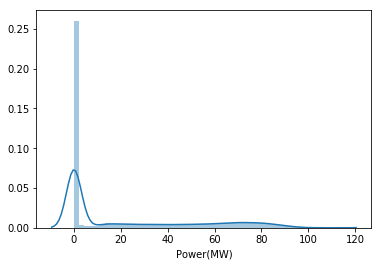

In [30]:
sns.distplot(LA["Power(MW)"])

In [15]:
X = LA[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Glo Unc (%)', 'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'SUNY Dif Unc (%)', 'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)',
       'METSTAT CSKY Dif Unc (%)', 'Meas Glo (Wh/m^2)', 'Meas Glo Flg',
       'Meas Dir (Wh/m^2)', 'Meas Dir Flg', 'Meas Dif (Wh/m^2)',
       'Meas Dif Flg', 'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)', 'Albedo Flg']]
y =LA['Power(MW)']

In [17]:
LA_model = sm.OLS(y, X).fit()
predictions= LA_model.predict(X)
LA_model.summary()

c:\users\deepe\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
c:\users\deepe\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\deepe\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\deepe\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 5.899e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        01:33:37   Log-Likelihood:            -3.6638e+05
No. Observations:              105109   AIC:                         7.328e+05
Df Residuals:                  105084   BIC:                         7.331e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.6350      0.024     26.568      0.000       0.588       0.682
Azimuth (deg)                -0.0933      0.001   -168.803      0.000      -0.094      -0.092
ETR (Wh/m^2)                 -0.0973      0.003    -35.366      0.000      -0.103      -0.092
ETRN (Wh/m^2)                 0.0084      0.000     26.411      0.000       0.008       0.009
SUNY Glo (Wh/m^2)             0.0143      0.001     14.569      0.000       0.012       0.016
SUNY Glo Flg              -3564.6045   2711.025     -1.315      0.189   -8878.178    1748.969
SUNY Glo Unc (%)           1.179e+08   1.14e+08      1.035      0.300   -1.05e+08    3.41e+08
SUNY Dir (Wh/m^2)             0.0339      0.001     54.592      0.000       0.033       0.035
SUNY Dir Flg               2729.7956   1284.860      2.125      0.034     211.487    5248.104
SUNY Dir Unc (%)          -7.184e+07   2.93e+07     -2.453      0.014   -1.29e+08   -1.44e+07
SUNY Dif (Wh/m^2)             0.0290      0.001     24.694      0.000       0.027       0.031
SUNY Dif Flg                842.7676   1722.489      0.489      0.625   -2533.288    4218.823
SUNY Dif Unc (%)           1.179e+08   1.14e+08      1.035      0.300   -1.05e+08    3.41e+08
METSTAT Glo (Wh/m^2)          0.0183      0.001     19.098      0.000       0.016       0.020
METSTAT Glo Unc (%)       -2.495e+08   1.25e+08     -1.999      0.046   -4.94e+08   -4.85e+06
METSTAT Dir (Wh/m^2)         -0.0024      0.001     -3.901      0.000      -0.004      -0.001
METSTAT Dir Unc (%)         4.99e+08    2.5e+08      1.999      0.046    9.69e+06    9.88e+08
METSTAT Dif (Wh/m^2)         -0.0053      0.001     -4.131      0.000      -0.008      -0.003
METSTAT Dif Unc (%)       -2.495e+08   1.25e+08     -1.999      0.046   -4.94e+08   -4.85e+06
METSTAT CSKY Glo (Wh/m^2)     0.1682      0.003     49.323      0.000       0.162       0.175
METSTAT CSKY Glo Unc (%)  -2.275e+08   1.31e+08     -1.732      0.083   -4.85e+08       3e+07
METSTAT CSKY Dir (Wh/m^2)     0.0138      0.001     18.037      0.000       0.012       0.015
METSTAT CSKY Dir Unc (%)   1.403e+08   7.59e+07      1.848      0.065   -8.47e+06    2.89e+08
METSTAT CSKY Dif (Wh/m^2)     0.0835      0.002     35.175      0.000       0.079       0.088
METSTAT CSKY Dif Unc (%)  -2.275e+08   1.31e+08     -1.732      0.083   -4.85e+08       3e+07
Meas Glo (Wh/m^2)          2.494e+07   1.48e+08      0.169      0.866   -2.65e+08    3.15e+08
Meas Glo Flg               -2.46e+07   1.31e+08     -0.187      0.851   -2.82e+08    2.33e+08
Meas Dir (Wh/m^2)         -1.284e+07   7.39e+07     -0.174      0.862   -1.58e+08    1.32e+08
Meas Dir Flg               -2.46e+07   1.31e+08     -0.187      0.851   -2.82e+08    2.33e+08
Meas Dif (Wh/m^2)         -1.284e+07   7.39e+07     -0.174      0.862   -1.

In [18]:
X = LA[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Glo Unc (%)', 'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'SUNY Dif Unc (%)', 'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)',
       'METSTAT CSKY Dif Unc (%)', 'Meas Glo Flg',
       'Meas Dir (Wh/m^2)', 'Meas Dir Flg', 'Meas Dif (Wh/m^2)',
       'Meas Dif Flg', 'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)']]
y =LA['Power(MW)']

In [19]:
LA_model = sm.OLS(y, X).fit()
predictions= LA_model.predict(X)
LA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 5.899e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        01:35:34   Log-Likelihood:            -3.6638e+05
No. Observations:              105109   AIC:                         7.328e+05
Df Residuals:                  105084   BIC:                         7.331e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.6381      0.017     37.099      0.000       0.604       0.672
Azimuth (deg)                -0.0933      0.001   -168.856      0.000      -0.094      -0.092
ETR (Wh/m^2)                 -0.0969      0.003    -35.346      0.000      -0.102      -0.092
ETRN (Wh/m^2)                 0.0083      0.000     27.237      0.000       0.008       0.009
SUNY Glo (Wh/m^2)             0.0144      0.001     14.805      0.000       0.012       0.016
SUNY Glo Flg              -8.282e+04   3.66e+04     -2.261      0.024   -1.55e+05    -1.1e+04
SUNY Glo Unc (%)           1.187e+08   1.15e+08      1.031      0.303   -1.07e+08    3.44e+08
SUNY Dir (Wh/m^2)             0.0339      0.001     55.400      0.000       0.033       0.035
SUNY Dir Flg               3.418e+04   1.67e+04      2.050      0.040    1493.559    6.69e+04
SUNY Dir Unc (%)          -7.194e+07   2.94e+07     -2.450      0.014    -1.3e+08   -1.44e+07
SUNY Dif (Wh/m^2)             0.0289      0.001     24.690      0.000       0.027       0.031
SUNY Dif Flg               4.865e+04   2.08e+04      2.343      0.019    7957.170    8.93e+04
SUNY Dif Unc (%)           1.187e+08   1.15e+08      1.031      0.303   -1.07e+08    3.44e+08
METSTAT Glo (Wh/m^2)          0.0182      0.001     19.100      0.000       0.016       0.020
METSTAT Glo Unc (%)       -2.496e+08   1.25e+08     -2.000      0.046   -4.94e+08   -4.94e+06
METSTAT Dir (Wh/m^2)         -0.0023      0.001     -3.870      0.000      -0.004      -0.001
METSTAT Dir Unc (%)        4.991e+08    2.5e+08      2.000      0.046    9.88e+06    9.88e+08
METSTAT Dif (Wh/m^2)         -0.0053      0.001     -4.087      0.000      -0.008      -0.003
METSTAT Dif Unc (%)       -2.495e+08   1.25e+08     -2.000      0.046   -4.94e+08   -4.94e+06
METSTAT CSKY Glo (Wh/m^2)     0.1680      0.003     52.148      0.000       0.162       0.174
METSTAT CSKY Glo Unc (%)  -2.284e+08   1.33e+08     -1.721      0.085   -4.88e+08    3.17e+07
METSTAT CSKY Dir (Wh/m^2)     0.0137      0.001     19.650      0.000       0.012       0.015
METSTAT CSKY Dir Unc (%)   1.406e+08   7.64e+07      1.840      0.066   -9.18e+06     2.9e+08
METSTAT CSKY Dif (Wh/m^2)     0.0832      0.002     35.120      0.000       0.079       0.088
METSTAT CSKY Dif Unc (%)  -2.284e+08   1.33e+08     -1.721      0.085   -4.88e+08    3.17e+07
Meas Glo Flg              -1.912e+07   1.29e+08     -0.148      0.882   -2.72e+08    2.34e+08
Meas Dir (Wh/m^2)         -2.875e+05   1.94e+06     -0.148      0.882   -4.09e+06    3.52e+06
Meas Dir Flg              -1.918e+07   1.29e+08     -0.148      0.882   -2.73e+08    2.34e+08
Meas Dif (Wh/m^2)         -2.875e+05   1.94e+06     -0.148      0.882   -4.09e+06    3.52e+06
Meas Dif Flg              -1.918e+07   1.29e+08     -0.148      0.882   -2.

In [20]:
X = LA[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Glo Unc (%)', 'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'SUNY Dif Unc (%)', 'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)',
       'METSTAT CSKY Dif Unc (%)', 'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)']]
y =LA['Power(MW)']

In [21]:
LA_model = sm.OLS(y, X).fit()
predictions= LA_model.predict(X)
LA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 5.243e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        01:36:51   Log-Likelihood:            -3.6638e+05
No. Observations:              105109   AIC:                         7.328e+05
Df Residuals:                  105081   BIC:                         7.331e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.6382      0.017     37.125      0.000       0.604       0.672
Azimuth (deg)                -0.0932      0.001   -159.121      0.000      -0.094      -0.092
ETR (Wh/m^2)                 -0.0970      0.003    -35.344      0.000      -0.102      -0.092
ETRN (Wh/m^2)                 0.0083      0.000     27.234      0.000       0.008       0.009
SUNY Glo (Wh/m^2)             0.0144      0.001     14.806      0.000       0.012       0.016
SUNY Glo Flg              -5.994e+04    2.8e+05     -0.214      0.830   -6.08e+05    4.88e+05
SUNY Glo Unc (%)           2.595e+08   7.26e+08      0.357      0.721   -1.16e+09    1.68e+09
SUNY Dir (Wh/m^2)             0.0339      0.001     55.413      0.000       0.033       0.035
SUNY Dir Flg               2.554e+04   1.21e+05      0.212      0.832   -2.11e+05    2.62e+05
SUNY Dir Unc (%)          -4.255e+08    1.7e+09     -0.250      0.803   -3.77e+09    2.92e+09
SUNY Dif (Wh/m^2)             0.0289      0.001     24.692      0.000       0.027       0.031
SUNY Dif Flg                3.44e+04   1.59e+05      0.216      0.829   -2.78e+05    3.46e+05
SUNY Dif Unc (%)            2.56e+08    7.1e+08      0.361      0.718   -1.13e+09    1.65e+09
METSTAT Glo (Wh/m^2)          0.0182      0.001     19.101      0.000       0.016       0.020
METSTAT Glo Unc (%)       -2.554e+08   1.26e+08     -2.029      0.042   -5.02e+08   -8.73e+06
METSTAT Dir (Wh/m^2)         -0.0023      0.001     -3.872      0.000      -0.004      -0.001
METSTAT Dir Unc (%)        5.106e+08   2.52e+08      2.030      0.042    1.75e+07       1e+09
METSTAT Dif (Wh/m^2)         -0.0053      0.001     -4.088      0.000      -0.008      -0.003
METSTAT Dif Unc (%)       -2.552e+08   1.26e+08     -2.030      0.042   -5.02e+08   -8.81e+06
METSTAT CSKY Glo (Wh/m^2)     0.1681      0.003     52.152      0.000       0.162       0.174
METSTAT CSKY Glo Unc (%)  -7.265e+07   7.14e+08     -0.102      0.919   -1.47e+09    1.33e+09
METSTAT CSKY Dir (Wh/m^2)     0.0137      0.001     19.652      0.000       0.012       0.015
METSTAT CSKY Dir Unc (%)   1.362e+08   7.23e+07      1.884      0.060    -5.5e+06    2.78e+08
METSTAT CSKY Dif (Wh/m^2)     0.0832      0.002     35.120      0.000       0.079       0.088
METSTAT CSKY Dif Unc (%)  -7.265e+07   7.14e+08     -0.102      0.919   -1.47e+09    1.33e+09
Precip Wat (cm)              -0.3411      0.044     -7.739      0.000      -0.427      -0.255
Precip Wat Flg                0.0041      0.002      2.605      0.009       0.001       0.007
AOD (unitless)              -53.4790      1.167    -45.810      0.000     -55.767     -51.191
AOD Flg                     153.5750    624.421      0.246      0.806   -1070.282    1377.432
AOD RAN (unitless)           11.4290      0.494     23.148      0.000      

In [24]:
X = LA[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Glo Unc (%)', 'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'SUNY Dif Unc (%)', 'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
        'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)',
       'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)']]
y =LA['Power(MW)']

In [25]:
LA_model = sm.OLS(y, X).fit()
predictions= LA_model.predict(X)
LA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 5.445e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        01:39:03   Log-Likelihood:            -3.6638e+05
No. Observations:              105109   AIC:                         7.328e+05
Df Residuals:                  105082   BIC:                         7.331e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.6382      0.017     37.126      0.000       0.604       0.672
Azimuth (deg)                -0.0932      0.001   -170.098      0.000      -0.094      -0.092
ETR (Wh/m^2)                 -0.0969      0.003    -35.352      0.000      -0.102      -0.092
ETRN (Wh/m^2)                 0.0083      0.000     27.252      0.000       0.008       0.009
SUNY Glo (Wh/m^2)             0.0144      0.001     14.812      0.000       0.012       0.016
SUNY Glo Flg              -9497.5135   4681.557     -2.029      0.042   -1.87e+04    -321.725
SUNY Glo Unc (%)           3.273e+08   2.22e+08      1.477      0.140   -1.07e+08    7.62e+08
SUNY Dir (Wh/m^2)             0.0339      0.001     55.417      0.000       0.033       0.035
SUNY Dir Flg               5070.3137   2461.448      2.060      0.039     245.908    9894.720
SUNY Dir Unc (%)           -5.96e+08   3.08e+08     -1.932      0.053    -1.2e+09    8.54e+06
SUNY Dif (Wh/m^2)             0.0289      0.001     24.691      0.000       0.027       0.031
SUNY Dif Flg               4435.1616   2221.440      1.997      0.046      81.169    8789.154
SUNY Dif Unc (%)           3.271e+08   2.21e+08      1.477      0.140   -1.07e+08    7.61e+08
METSTAT Glo (Wh/m^2)          0.0182      0.001     19.100      0.000       0.016       0.020
METSTAT Glo Unc (%)       -2.567e+08   1.25e+08     -2.052      0.040   -5.02e+08   -1.15e+07
METSTAT Dir (Wh/m^2)         -0.0023      0.001     -3.870      0.000      -0.004      -0.001
METSTAT Dir Unc (%)        5.133e+08    2.5e+08      2.052      0.040    2.31e+07       1e+09
METSTAT Dif (Wh/m^2)         -0.0053      0.001     -4.087      0.000      -0.008      -0.003
METSTAT Dif Unc (%)       -2.566e+08   1.25e+08     -2.052      0.040   -5.02e+08   -1.15e+07
METSTAT CSKY Glo (Wh/m^2)     0.1680      0.003     52.160      0.000       0.162       0.174
METSTAT CSKY Dir (Wh/m^2)     0.0137      0.001     19.651      0.000       0.012       0.015
METSTAT CSKY Dir Unc (%)   1.353e+08   7.17e+07      1.886      0.059    -5.3e+06    2.76e+08
METSTAT CSKY Dif (Wh/m^2)     0.0832      0.002     35.121      0.000       0.079       0.088
Precip Wat (cm)              -0.3413      0.044     -7.746      0.000      -0.428      -0.255
Precip Wat Flg                0.0041      0.002      2.605      0.009       0.001       0.007
AOD (unitless)              -53.4784      1.167    -45.810      0.000     -55.766     -51.190
AOD Flg                    -288.1329    124.257     -2.319      0.020    -531.674     -44.591
AOD RAN (unitless)           11.4292      0.494     23.149      0.000      10.462      12.397
 AOD RAN Flg                220.2043    124.262      1.772      0.076     -23.347     463.756
Ozone (cm)                   -3.3691      1.146     -2.941      0.003      

In [26]:
X = LA[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
        'METSTAT CSKY Dir (Wh/m^2)','METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)',
       'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)']]
y =LA['Power(MW)']

In [27]:
LA_model = sm.OLS(y, X).fit()
predictions= LA_model.predict(X)
LA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 5.663e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        01:44:06   Log-Likelihood:            -3.6639e+05
No. Observations:              105109   AIC:                         7.328e+05
Df Residuals:                  105083   BIC:                         7.331e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.6383      0.017     37.131      0.000       0.605       0.672
Azimuth (deg)                -0.0932      0.001   -170.355      0.000      -0.094      -0.092
ETR (Wh/m^2)                 -0.0970      0.003    -35.366      0.000      -0.102      -0.092
ETRN (Wh/m^2)                 0.0083      0.000     27.185      0.000       0.008       0.009
SUNY Glo (Wh/m^2)             0.0144      0.001     14.807      0.000       0.012       0.016
SUNY Glo Flg              -4842.2876   2631.158     -1.840      0.066   -9999.322     314.747
SUNY Dir (Wh/m^2)             0.0339      0.001     55.422      0.000       0.033       0.035
SUNY Dir Flg               6098.7934   3318.586      1.838      0.066    -405.590    1.26e+04
SUNY Dir Unc (%)          -1.525e+08   7.22e+07     -2.114      0.035   -2.94e+08   -1.11e+07
SUNY Dif (Wh/m^2)             0.0289      0.001     24.694      0.000       0.027       0.031
SUNY Dif Flg              -1248.5599    687.522     -1.816      0.069   -2596.095      98.975
METSTAT Glo (Wh/m^2)          0.0182      0.001     19.103      0.000       0.016       0.020
METSTAT Glo Unc (%)       -2.208e+08   1.23e+08     -1.798      0.072   -4.62e+08    1.98e+07
METSTAT Dir (Wh/m^2)         -0.0023      0.001     -3.874      0.000      -0.004      -0.001
METSTAT Dir Unc (%)        4.416e+08   2.46e+08      1.798      0.072   -3.97e+07    9.23e+08
METSTAT Dif (Wh/m^2)         -0.0053      0.001     -4.088      0.000      -0.008      -0.003
METSTAT Dif Unc (%)       -2.208e+08   1.23e+08     -1.798      0.072   -4.61e+08    1.98e+07
METSTAT CSKY Glo (Wh/m^2)     0.1681      0.003     52.179      0.000       0.162       0.174
METSTAT CSKY Dir (Wh/m^2)     0.0137      0.001     19.644      0.000       0.012       0.015
METSTAT CSKY Dir Unc (%)    6.02e+07   5.06e+07      1.189      0.234    -3.9e+07    1.59e+08
METSTAT CSKY Dif (Wh/m^2)     0.0832      0.002     35.126      0.000       0.079       0.088
Precip Wat (cm)              -0.3411      0.044     -7.741      0.000      -0.427      -0.255
Precip Wat Flg                0.0041      0.002      2.606      0.009       0.001       0.007
AOD (unitless)              -53.4832      1.167    -45.814      0.000     -55.771     -51.195
AOD Flg                     -27.4472      3.655     -7.510      0.000     -34.611     -20.284
AOD RAN (unitless)           11.4283      0.494     23.147      0.000      10.461      12.396
 AOD RAN Flg                -40.4913      3.661    -11.061      0.000     -47.666     -33.317
Ozone (cm)                   -3.3673      1.146     -2.939      0.003      -5.613      -1.122
Ozone Flg                    -0.0060      0.003     -1.763      0.078      -0.013       0.001
Albedo (unitless)            21.3326      1.156     18.456      0.000      

In [28]:
X = LA[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
        'METSTAT CSKY Dir (Wh/m^2)','METSTAT CSKY Dif (Wh/m^2)',
       'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)']]
y =LA['Power(MW)']

In [29]:
LA_model = sm.OLS(y, X).fit()
predictions= LA_model.predict(X)
LA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 5.899e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        01:44:58   Log-Likelihood:            -3.6639e+05
No. Observations:              105109   AIC:                         7.328e+05
Df Residuals:                  105084   BIC:                         7.331e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.6385      0.017     37.146      0.000       0.605       0.672
Azimuth (deg)                -0.0932      0.001   -170.377      0.000      -0.094      -0.092
ETR (Wh/m^2)                 -0.0970      0.003    -35.395      0.000      -0.102      -0.092
ETRN (Wh/m^2)                 0.0083      0.000     27.172      0.000       0.008       0.009
SUNY Glo (Wh/m^2)             0.0143      0.001     14.801      0.000       0.012       0.016
SUNY Glo Flg              -1790.0052    981.609     -1.824      0.068   -3713.946     133.935
SUNY Dir (Wh/m^2)             0.0339      0.001     55.429      0.000       0.033       0.035
SUNY Dir Flg                -12.1917      8.129     -1.500      0.134     -28.124       3.740
SUNY Dir Unc (%)          -8.967e+07   4.91e+07     -1.826      0.068   -1.86e+08    6.57e+06
SUNY Dif (Wh/m^2)             0.0289      0.001     24.699      0.000       0.027       0.031
SUNY Dif Flg               1810.1449    989.732      1.829      0.067    -129.717    3750.007
METSTAT Glo (Wh/m^2)          0.0183      0.001     19.108      0.000       0.016       0.020
METSTAT Glo Unc (%)       -2.242e+08   1.23e+08     -1.826      0.068   -4.65e+08    1.64e+07
METSTAT Dir (Wh/m^2)         -0.0023      0.001     -3.878      0.000      -0.004      -0.001
METSTAT Dir Unc (%)        4.484e+08   2.46e+08      1.826      0.068   -3.28e+07     9.3e+08
METSTAT Dif (Wh/m^2)         -0.0053      0.001     -4.091      0.000      -0.008      -0.003
METSTAT Dif Unc (%)       -2.242e+08   1.23e+08     -1.826      0.068   -4.65e+08    1.64e+07
METSTAT CSKY Glo (Wh/m^2)     0.1682      0.003     52.221      0.000       0.162       0.174
METSTAT CSKY Dir (Wh/m^2)     0.0137      0.001     19.633      0.000       0.012       0.015
METSTAT CSKY Dif (Wh/m^2)     0.0832      0.002     35.133      0.000       0.079       0.088
Precip Wat (cm)              -0.3407      0.044     -7.733      0.000      -0.427      -0.254
Precip Wat Flg                0.0041      0.002      2.605      0.009       0.001       0.007
AOD (unitless)              -53.4911      1.167    -45.822      0.000     -55.779     -51.203
AOD Flg                     -37.4770      2.112    -17.743      0.000     -41.617     -33.337
AOD RAN (unitless)           11.4288      0.494     23.148      0.000      10.461      12.397
 AOD RAN Flg                -30.4818      2.107    -14.468      0.000     -34.611     -26.352
Ozone (cm)                   -3.3692      1.146     -2.941      0.003      -5.615      -1.124
Ozone Flg                    -0.0060      0.003     -1.761      0.078      -0.013       0.001
Albedo (unitless)            21.3282      1.156     18.452      0.000      19.063      23.594
===========================================================================

In [30]:
X = LA[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Dir (Wh/m^2)',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
        'METSTAT CSKY Dir (Wh/m^2)','METSTAT CSKY Dif (Wh/m^2)',
       'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)']]
y =LA['Power(MW)']

In [31]:
LA_model = sm.OLS(y, X).fit()
predictions= LA_model.predict(X)
LA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 5.899e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        01:45:59   Log-Likelihood:            -3.6639e+05
No. Observations:              105109   AIC:                         7.328e+05
Df Residuals:                  105084   BIC:                         7.331e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.6385      0.017     37.146      0.000       0.605       0.672
Azimuth (deg)                -0.0932      0.001   -170.351      0.000      -0.094      -0.092
ETR (Wh/m^2)                 -0.0970      0.003    -35.395      0.000      -0.102      -0.092
ETRN (Wh/m^2)                 0.0083      0.000     27.153      0.000       0.008       0.009
SUNY Glo (Wh/m^2)             0.0143      0.001     14.800      0.000       0.012       0.016
SUNY Glo Flg              -6288.1460   3446.419     -1.825      0.068    -1.3e+04     466.788
SUNY Dir (Wh/m^2)             0.0339      0.001     55.429      0.000       0.033       0.035
SUNY Dir Unc (%)          -8.961e+07   4.91e+07     -1.826      0.068   -1.86e+08    6.59e+06
SUNY Dif (Wh/m^2)             0.0289      0.001     24.698      0.000       0.027       0.031
SUNY Dif Flg               6296.0908   3446.412      1.827      0.068    -458.830    1.31e+04
METSTAT Glo (Wh/m^2)          0.0183      0.001     19.108      0.000       0.016       0.020
METSTAT Glo Unc (%)        -2.24e+08   1.23e+08     -1.826      0.068   -4.65e+08    1.65e+07
METSTAT Dir (Wh/m^2)         -0.0023      0.001     -3.878      0.000      -0.004      -0.001
METSTAT Dir Unc (%)         4.48e+08   2.45e+08      1.826      0.068    -3.3e+07    9.29e+08
METSTAT Dif (Wh/m^2)         -0.0053      0.001     -4.091      0.000      -0.008      -0.003
METSTAT Dif Unc (%)        -2.24e+08   1.23e+08     -1.826      0.068   -4.64e+08    1.65e+07
METSTAT CSKY Glo (Wh/m^2)     0.1682      0.003     52.221      0.000       0.162       0.174
METSTAT CSKY Dir (Wh/m^2)     0.0137      0.001     19.633      0.000       0.012       0.015
METSTAT CSKY Dif (Wh/m^2)     0.0832      0.002     35.133      0.000       0.079       0.088
Precip Wat (cm)              -0.3407      0.044     -7.733      0.000      -0.427      -0.254
Precip Wat Flg                0.0041      0.002      2.605      0.009       0.001       0.007
AOD (unitless)              -53.4910      1.167    -45.821      0.000     -55.779     -51.203
AOD Flg                    -254.9848    121.059     -2.106      0.035    -492.258     -17.711
AOD RAN (unitless)           11.4288      0.494     23.148      0.000      10.461      12.397
 AOD RAN Flg                187.0261    121.053      1.545      0.122     -50.236     424.288
Ozone (cm)                   -3.3692      1.146     -2.941      0.003      -5.615      -1.124
Ozone Flg                    -0.0060      0.003     -1.761      0.078      -0.013       0.001
Albedo (unitless)            21.3283      1.156     18.452      0.000      19.063      23.594
==============================================================================
Omnibus:                    12914.195   Durbin-Watson:                   0.038
Prob(Omnibu

In [32]:
X = LA[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Dir (Wh/m^2)',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
        'METSTAT CSKY Dir (Wh/m^2)','METSTAT CSKY Dif (Wh/m^2)',
       'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)']]
y =LA['Power(MW)']

In [33]:
LA_model = sm.OLS(y, X).fit()
predictions= LA_model.predict(X)
LA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 5.899e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        01:46:40   Log-Likelihood:            -3.6639e+05
No. Observations:              105109   AIC:                         7.328e+05
Df Residuals:                  105084   BIC:                         7.331e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.6385      0.017     37.146      0.000       0.605       0.672
Azimuth (deg)                -0.0932      0.001   -170.351      0.000      -0.094      -0.092
ETR (Wh/m^2)                 -0.0970      0.003    -35.395      0.000      -0.102      -0.092
ETRN (Wh/m^2)                 0.0083      0.000     27.153      0.000       0.008       0.009
SUNY Glo (Wh/m^2)             0.0143      0.001     14.800      0.000       0.012       0.016
SUNY Glo Flg               -957.1957    526.469     -1.818      0.069   -1989.067      74.676
SUNY Dir (Wh/m^2)             0.0339      0.001     55.429      0.000       0.033       0.035
SUNY Dir Unc (%)          -8.961e+07   4.91e+07     -1.826      0.068   -1.86e+08    6.59e+06
SUNY Dif (Wh/m^2)             0.0289      0.001     24.698      0.000       0.027       0.031
SUNY Dif Flg                965.1406    526.462      1.833      0.067     -66.718    1996.999
METSTAT Glo (Wh/m^2)          0.0183      0.001     19.108      0.000       0.016       0.020
METSTAT Glo Unc (%)        -2.24e+08   1.23e+08     -1.826      0.068   -4.65e+08    1.65e+07
METSTAT Dir (Wh/m^2)         -0.0023      0.001     -3.878      0.000      -0.004      -0.001
METSTAT Dir Unc (%)         4.48e+08   2.45e+08      1.826      0.068    -3.3e+07    9.29e+08
METSTAT Dif (Wh/m^2)         -0.0053      0.001     -4.091      0.000      -0.008      -0.003
METSTAT Dif Unc (%)        -2.24e+08   1.23e+08     -1.826      0.068   -4.64e+08    1.65e+07
METSTAT CSKY Glo (Wh/m^2)     0.1682      0.003     52.221      0.000       0.162       0.174
METSTAT CSKY Dir (Wh/m^2)     0.0137      0.001     19.633      0.000       0.012       0.015
METSTAT CSKY Dif (Wh/m^2)     0.0832      0.002     35.133      0.000       0.079       0.088
Precip Wat (cm)              -0.3407      0.044     -7.733      0.000      -0.427      -0.254
Precip Wat Flg                0.0041      0.002      2.605      0.009       0.001       0.007
AOD (unitless)              -53.4910      1.167    -45.821      0.000     -55.779     -51.203
AOD Flg                     -67.9587      1.769    -38.419      0.000     -71.426     -64.492
AOD RAN (unitless)           11.4288      0.494     23.148      0.000      10.461      12.397
Ozone (cm)                   -3.3692      1.146     -2.941      0.003      -5.615      -1.124
Ozone Flg                    -0.0060      0.003     -1.761      0.078      -0.013       0.001
Albedo (unitless)            21.3283      1.156     18.452      0.000      19.063      23.594
==============================================================================
Omnibus:                    12914.337   Durbin-Watson:                   0.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           148559.657
Skew:                     

In [34]:
X = LA[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Dir (Wh/m^2)',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
        'METSTAT CSKY Dir (Wh/m^2)','METSTAT CSKY Dif (Wh/m^2)',
       'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', 'Ozone (cm)',
        'Albedo (unitless)']]
y =LA['Power(MW)']

In [35]:
LA_model = sm.OLS(y, X).fit()
predictions= LA_model.predict(X)
LA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 6.155e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        01:47:28   Log-Likelihood:            -3.6639e+05
No. Observations:              105109   AIC:                         7.328e+05
Df Residuals:                  105085   BIC:                         7.331e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.6389      0.017     37.171      0.000       0.605       0.673
Azimuth (deg)                -0.0933      0.001   -170.367      0.000      -0.094      -0.092
ETR (Wh/m^2)                 -0.0971      0.003    -35.416      0.000      -0.102      -0.092
ETRN (Wh/m^2)                 0.0083      0.000     27.178      0.000       0.008       0.009
SUNY Glo (Wh/m^2)             0.0143      0.001     14.791      0.000       0.012       0.016
SUNY Glo Flg                366.6446    196.012      1.871      0.061     -17.537     750.826
SUNY Dir (Wh/m^2)             0.0339      0.001     55.441      0.000       0.033       0.035
SUNY Dir Unc (%)           -9.08e+07   4.91e+07     -1.850      0.064   -1.87e+08    5.39e+06
SUNY Dif (Wh/m^2)             0.0289      0.001     24.703      0.000       0.027       0.031
SUNY Dif Flg               -358.7035    196.019     -1.830      0.067    -742.898      25.491
METSTAT Glo (Wh/m^2)          0.0182      0.001     19.104      0.000       0.016       0.020
METSTAT Glo Unc (%)        -2.27e+08   1.23e+08     -1.850      0.064   -4.68e+08    1.35e+07
METSTAT Dir (Wh/m^2)         -0.0023      0.001     -3.875      0.000      -0.004      -0.001
METSTAT Dir Unc (%)         4.54e+08   2.45e+08      1.850      0.064   -2.69e+07    9.35e+08
METSTAT Dif (Wh/m^2)         -0.0053      0.001     -4.087      0.000      -0.008      -0.003
METSTAT Dif Unc (%)        -2.27e+08   1.23e+08     -1.850      0.064   -4.67e+08    1.35e+07
METSTAT CSKY Glo (Wh/m^2)     0.1683      0.003     52.250      0.000       0.162       0.175
METSTAT CSKY Dir (Wh/m^2)     0.0137      0.001     19.642      0.000       0.012       0.015
METSTAT CSKY Dif (Wh/m^2)     0.0832      0.002     35.144      0.000       0.079       0.088
Precip Wat (cm)              -0.3393      0.044     -7.702      0.000      -0.426      -0.253
Precip Wat Flg                0.0034      0.002      2.214      0.027       0.000       0.006
AOD (unitless)              -53.4267      1.167    -45.788      0.000     -55.714     -51.140
AOD Flg                     -68.2637      1.760    -38.777      0.000     -71.714     -64.813
AOD RAN (unitless)           11.4369      0.494     23.165      0.000      10.469      12.405
Ozone (cm)                   -3.3527      1.146     -2.927      0.003      -5.598      -1.107
Albedo (unitless)            21.3116      1.156     18.438      0.000      19.046      23.577
==============================================================================
Omnibus:                    12913.692   Durbin-Watson:                   0.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           148536.928
Skew:                          -0.031   Prob(JB):                         0.00
Kurtosis:                       8.823   C

In [36]:
X = LA[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Dir (Wh/m^2)',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 
       'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
        'METSTAT CSKY Dir (Wh/m^2)','METSTAT CSKY Dif (Wh/m^2)',
       'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', 'Ozone (cm)',
        'Albedo (unitless)']]
y =LA['Power(MW)']

In [37]:
LA_model = sm.OLS(y, X).fit()
predictions= LA_model.predict(X)
LA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 6.155e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        01:48:46   Log-Likelihood:            -3.6639e+05
No. Observations:              105109   AIC:                         7.328e+05
Df Residuals:                  105085   BIC:                         7.331e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.6389      0.017     37.171      0.000       0.605       0.673
Azimuth (deg)                -0.0933      0.001   -170.376      0.000      -0.094      -0.092
ETR (Wh/m^2)                 -0.0971      0.003    -35.416      0.000      -0.102      -0.092
ETRN (Wh/m^2)                 0.0083      0.000     27.178      0.000       0.008       0.009
SUNY Glo (Wh/m^2)             0.0143      0.001     14.792      0.000       0.012       0.016
SUNY Glo Flg                  7.9411      0.242     32.827      0.000       7.467       8.415
SUNY Dir (Wh/m^2)             0.0339      0.001     55.441      0.000       0.033       0.035
SUNY Dir Unc (%)          -9.076e+07   4.91e+07     -1.849      0.064   -1.87e+08    5.43e+06
SUNY Dif (Wh/m^2)             0.0289      0.001     24.703      0.000       0.027       0.031
METSTAT Glo (Wh/m^2)          0.0182      0.001     19.103      0.000       0.016       0.020
METSTAT Glo Unc (%)       -2.269e+08   1.23e+08     -1.849      0.064   -4.67e+08    1.36e+07
METSTAT Dir (Wh/m^2)         -0.0023      0.001     -3.874      0.000      -0.004      -0.001
METSTAT Dir Unc (%)        4.538e+08   2.45e+08      1.849      0.064   -2.71e+07    9.35e+08
METSTAT Dif (Wh/m^2)         -0.0053      0.001     -4.087      0.000      -0.008      -0.003
METSTAT Dif Unc (%)       -2.269e+08   1.23e+08     -1.849      0.064   -4.67e+08    1.36e+07
METSTAT CSKY Glo (Wh/m^2)     0.1683      0.003     52.250      0.000       0.162       0.175
METSTAT CSKY Dir (Wh/m^2)     0.0137      0.001     19.642      0.000       0.012       0.015
METSTAT CSKY Dif (Wh/m^2)     0.0832      0.002     35.144      0.000       0.079       0.088
Precip Wat (cm)              -0.3393      0.044     -7.702      0.000      -0.426      -0.253
Precip Wat Flg                0.0034      0.002      2.214      0.027       0.000       0.006
AOD (unitless)              -53.4266      1.167    -45.788      0.000     -55.714     -51.140
AOD Flg                     -68.2637      1.760    -38.777      0.000     -71.714     -64.813
AOD RAN (unitless)           11.4369      0.494     23.165      0.000      10.469      12.405
Ozone (cm)                   -3.3526      1.146     -2.927      0.003      -5.598      -1.107
Albedo (unitless)            21.3116      1.156     18.438      0.000      19.046      23.577
==============================================================================
Omnibus:                    12913.564   Durbin-Watson:                   0.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           148534.053
Skew:                          -0.031   Prob(JB):                         0.00
Kurtosis:                       8.823   Cond. No.                     6.81e+15
========================================================

In [38]:
X = LA[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)','ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Dir (Wh/m^2)','SUNY Dif (Wh/m^2)', 'METSTAT Glo (Wh/m^2)', 'METSTAT Dir (Wh/m^2)',  'METSTAT Dif (Wh/m^2)',
        'METSTAT CSKY Glo (Wh/m^2)','METSTAT CSKY Dir (Wh/m^2)','METSTAT CSKY Dif (Wh/m^2)',
       'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)', 'AOD Flg', 'AOD RAN (unitless)', 'Ozone (cm)',
        'Albedo (unitless)']]
y =LA['Power(MW)']

In [39]:
LA_model = sm.OLS(y, X).fit()
predictions= LA_model.predict(X)
LA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 6.690e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        01:50:26   Log-Likelihood:            -3.6914e+05
No. Observations:              105109   AIC:                         7.383e+05
Df Residuals:                  105088   BIC:                         7.385e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.1649      0.016     10.504      0.000       0.134       0.196
Azimuth (deg)                -0.0970      0.001   -177.362      0.000      -0.098      -0.096
ETR (Wh/m^2)                 -0.0862      0.003    -30.673      0.000      -0.092      -0.081
ETRN (Wh/m^2)                 0.0161      0.000     57.349      0.000       0.016       0.017
SUNY Glo (Wh/m^2)             0.0189      0.001     19.006      0.000       0.017       0.021
SUNY Glo Flg                 16.8969      0.196     86.011      0.000      16.512      17.282
SUNY Dir (Wh/m^2)             0.0299      0.001     47.967      0.000       0.029       0.031
SUNY Dif (Wh/m^2)             0.0231      0.001     19.289      0.000       0.021       0.025
METSTAT Glo (Wh/m^2)          0.0200      0.001     20.401      0.000       0.018       0.022
METSTAT Dir (Wh/m^2)         -0.0027      0.001     -4.296      0.000      -0.004      -0.001
METSTAT Dif (Wh/m^2)          0.0035      0.001      2.667      0.008       0.001       0.006
METSTAT CSKY Glo (Wh/m^2)     0.1158      0.003     35.994      0.000       0.109       0.122
METSTAT CSKY Dir (Wh/m^2)     0.0248      0.001     35.813      0.000       0.023       0.026
METSTAT CSKY Dif (Wh/m^2)     0.0761      0.002     31.340      0.000       0.071       0.081
Precip Wat (cm)              -0.5768      0.045    -12.788      0.000      -0.665      -0.488
Precip Wat Flg                0.0042      0.002      2.681      0.007       0.001       0.007
AOD (unitless)              -48.0817      1.191    -40.378      0.000     -50.416     -45.748
AOD Flg                     -19.7708      1.620    -12.201      0.000     -22.947     -16.595
AOD RAN (unitless)           13.2270      0.506     26.165      0.000      12.236      14.218
Ozone (cm)                  -11.1077      1.162     -9.556      0.000     -13.386      -8.829
Albedo (unitless)            20.7728      1.185     17.533      0.000      18.451      23.095
==============================================================================
Omnibus:                    12345.085   Durbin-Watson:                   0.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           131770.778
Skew:                          -0.007   Prob(JB):                         0.00
Kurtosis:                       8.485   Cond. No.                     9.86e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Test and Train of LA

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [41]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_predicted = reg.predict(X_test)
mean_square = mean_squared_error(y_test, y_predicted)
rsquare = r2_score(y_test, y_predicted)
print("Mean squared error:", mean_square)
print('R²:' ,rsquare)

Mean squared error: 66.49112489619517
R²: 0.9265109114971646


### Linear Regression For MD 

In [42]:
MD = pd.read_csv("../Dataset/Merge/Merge_MD_new.csv")

In [43]:
MD.shape

(105109, 43)

In [45]:
MD.corr()

,Zenith (deg),Azimuth (deg),ETR (Wh/m^2),ETRN (Wh/m^2),SUNY Glo (Wh/m^2),SUNY Glo Flg,SUNY Glo Unc (%),SUNY Dir (Wh/m^2),SUNY Dir Flg,SUNY Dir Unc (%),...,Precip Wat Flg,AOD (unitless),AOD Flg,AOD RAN (unitless),AOD RAN Flg,Ozone (cm),Ozone Flg,Albedo (unitless),Albedo Flg,Power(MW)
Zenith (deg),1.000000,-0.752319,-0.992901,-0.845920,-0.947305,0.135524,-0.803106,-0.843207,0.135524,-0.803106,...,-0.000205,-0.194156,NaN,-0.025149,NaN,-0.113303,-0.220521,0.048574,NaN,-0.880840
Azimuth (deg),-0.752319,1.000000,0.711885,0.902541,0.626354,0.259451,0.936211,0.639148,0.259451,0.936211,...,-0.001315,0.111121,NaN,0.013773,NaN,0.061245,0.268782,-0.026885,NaN,0.572662
ETR (Wh/m^2),-0.992901,0.711885,1.000000,0.824576,0.950080,-0.211933,0.760799,0.843910,-0.211933,0.760799,...,-0.000055,0.169658,NaN,0.022692,NaN,0.107777,0.205983,-0.049118,NaN,0.892508
ETRN (Wh/m^2),-0.845920,0.902541,0.824576,1.000000,0.727381,-0.009321,0.963716,0.742056,-0.009321,0.963716,...,-0.001418,0.085839,NaN,0.012560,NaN,0.054010,0.268269,-0.027356,NaN,0.698551
SUNY Glo (Wh/m^2),-0.947305,0.626354,0.950080,0.727381,1.000000,-0.206257,0.671722,0.932987,-0.206257,0.671722,...,-0.000317,0.239990,NaN,0.025958,NaN,0.071744,0.181431,0.004742,NaN,0.903280
SUNY Glo Flg,0.135524,0.259451,-0.211933,-0.009321,-0.206257,1.000000,0.206491,-0.158578,1.000000,0.206491,...,0.000034,0.049785,NaN,-0.000336,NaN,0.017712,0.083284,-0.019031,NaN,-0.221005
SUNY Glo Unc (%),-0.803106,0.936211,0.760799,0.963716,0.671722,0.206491,1.000000,0.689979,0.206491,1.000000,...,0.002841,0.117749,NaN,0.015163,NaN,0.064402,0.285592,-0.027289,NaN,0.636561
SUNY Dir (Wh/m^2),-0.843207,0.639148,0.843910,0.742056,0.932987,-0.158578,0.689979,1.000000,-0.158578,0.689979,...,-0.000982,0.245200,NaN,0.020989,NaN,0.006025,0.187195,0.077410,NaN,0.838912
SUNY Dir Flg,0.135524,0.259451,-0.211933,-0.009321,-0.206257,1.000000,0.206491,-0.158578,1.000000,0.206491,...,0.000034,0.049785,NaN,-0.000336,NaN,0.017712,0.083284,-0.019031,NaN,-0.221005
SUNY Dir Unc (%),-0.803106,0.936211,0.760799,0.963716,0.671722,0.206491,1.000000,0.689979,0.206491,1.000000,...,0.002841,0.117749,NaN,0.015163,NaN,0.064402,0.285592,-0.027289,NaN,0.636561


In [46]:
MD.columns

Index(['HH:MM (LST)', 'Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Glo Unc (%)', 'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'SUNY Dif Unc (%)', 'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)',
       'METSTAT CSKY Dif Unc (%)', 'Meas Glo (Wh/m^2)', 'Meas Glo Flg',
       'Meas Dir (Wh/m^2)', 'Meas Dir Flg', 'Meas Dif (Wh/m^2)',
       'Meas Dif Flg', 'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)', 'Albedo Flg', 'Power(MW)'],
      dtype='object')

In [47]:
X = MD[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Glo Unc (%)', 'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'SUNY Dif Unc (%)', 'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)',
       'METSTAT CSKY Dif Unc (%)', 'Meas Glo (Wh/m^2)', 'Meas Glo Flg',
       'Meas Dir (Wh/m^2)', 'Meas Dir Flg', 'Meas Dif (Wh/m^2)',
       'Meas Dif Flg', 'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)', 'Albedo Flg',]]
y = MD['Power(MW)']

In [48]:
MD_model = sm.OLS(y, X).fit()
MD_predictions= MD_model.predict(X)
MD_model.summary()

c:\users\deepe\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
c:\users\deepe\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\deepe\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\deepe\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 2.575e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        02:04:26   Log-Likelihood:                -86824.
No. Observations:              105109   AIC:                         1.737e+05
Df Residuals:                  105084   BIC:                         1.739e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.0390      0.001     27.112      0.000       0.036       0.042
Azimuth (deg)                -0.0016   4.11e-05    -38.581      0.000      -0.002      -0.002
ETR (Wh/m^2)                 -0.0036      0.000    -15.936      0.000      -0.004      -0.003
ETRN (Wh/m^2)                 0.0002    2.3e-05      9.169      0.000       0.000       0.000
SUNY Glo (Wh/m^2)             0.0023   7.54e-05     30.491      0.000       0.002       0.002
SUNY Glo Flg              -5.068e+04   1.41e+04     -3.590      0.000   -7.83e+04    -2.3e+04
SUNY Glo Unc (%)           4.925e+06   7.34e+06      0.671      0.502   -9.45e+06    1.93e+07
SUNY Dir (Wh/m^2)             0.0001   4.25e-05      2.883      0.004    3.92e-05       0.000
SUNY Dir Flg                3.25e+04   9164.442      3.546      0.000    1.45e+04    5.05e+04
SUNY Dir Unc (%)          -7.379e+06   2.32e+06     -3.180      0.001   -1.19e+07   -2.83e+06
SUNY Dif (Wh/m^2)            -0.0017   7.69e-05    -21.978      0.000      -0.002      -0.002
SUNY Dif Flg               1.818e+04   4995.220      3.639      0.000    8386.098     2.8e+04
SUNY Dif Unc (%)           4.919e+06   7.34e+06      0.671      0.502   -9.46e+06    1.93e+07
METSTAT Glo (Wh/m^2)       5.821e-05   8.06e-05      0.723      0.470   -9.97e-05       0.000
METSTAT Glo Unc (%)       -3.268e+07   9.15e+06     -3.572      0.000   -5.06e+07   -1.47e+07
METSTAT Dir (Wh/m^2)         -0.0003   4.38e-05     -6.778      0.000      -0.000      -0.000
METSTAT Dir Unc (%)        6.535e+07   1.83e+07      3.572      0.000    2.95e+07    1.01e+08
METSTAT Dif (Wh/m^2)         -0.0022      0.000    -20.870      0.000      -0.002      -0.002
METSTAT Dif Unc (%)       -3.267e+07   9.15e+06     -3.572      0.000   -5.06e+07   -1.47e+07
METSTAT CSKY Glo (Wh/m^2)     0.0081      0.000     32.791      0.000       0.008       0.009
METSTAT CSKY Glo Unc (%)  -1.377e+07   8.47e+06     -1.625      0.104   -3.04e+07    2.84e+06
METSTAT CSKY Dir (Wh/m^2)     0.0013    5.4e-05     23.516      0.000       0.001       0.001
METSTAT CSKY Dir Unc (%)    6.95e+06   5.05e+06      1.376      0.169   -2.95e+06    1.69e+07
METSTAT CSKY Dif (Wh/m^2)     0.0049      0.000     24.314      0.000       0.005       0.005
METSTAT CSKY Dif Unc (%)  -1.377e+07   8.47e+06     -1.625      0.104   -3.04e+07    2.84e+06
Meas Glo (Wh/m^2)          2.956e+05   3.52e+05      0.839      0.402   -3.95e+05    9.86e+05
Meas Glo Flg               1.272e+07   1.76e+07      0.723      0.470   -2.18e+07    4.72e+07
Meas Dir (Wh/m^2)          4.297e+04    8.8e+04      0.488      0.625    -1.3e+05    2.15e+05
Meas Dir Flg               1.272e+07   1.76e+07      0.723      0.470   -2.18e+07    4.72e+07
Meas Dif (Wh/m^2)          4.297e+04    8.8e+04      0.488      0.625    -1

In [49]:
X = MD[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Glo Unc (%)', 'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'SUNY Dif Unc (%)', 'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)',
       'METSTAT CSKY Dif Unc (%)', 'Meas Glo (Wh/m^2)', 'Meas Glo Flg',
       'Meas Dir (Wh/m^2)', 'Meas Dir Flg', 'Meas Dif (Wh/m^2)',
       'Meas Dif Flg', 'Precip Wat (cm)', 'Precip Wat Flg',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)']]
y = MD['Power(MW)']

In [50]:
MD_model = sm.OLS(y, X).fit()
MD_predictions= MD_model.predict(X)
MD_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 2.687e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        02:05:36   Log-Likelihood:                -86824.
No. Observations:              105109   AIC:                         1.737e+05
Df Residuals:                  105085   BIC:                         1.739e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.0389      0.001     27.332      0.000       0.036       0.042
Azimuth (deg)                -0.0016   4.11e-05    -38.589      0.000      -0.002      -0.002
ETR (Wh/m^2)                 -0.0036      0.000    -16.028      0.000      -0.004      -0.003
ETRN (Wh/m^2)                 0.0002   2.29e-05      9.193      0.000       0.000       0.000
SUNY Glo (Wh/m^2)             0.0023   7.54e-05     30.471      0.000       0.002       0.002
SUNY Glo Flg              -5.909e+04   1.62e+04     -3.639      0.000   -9.09e+04   -2.73e+04
SUNY Glo Unc (%)           4.904e+06   7.33e+06      0.669      0.504   -9.47e+06    1.93e+07
SUNY Dir (Wh/m^2)             0.0001   4.24e-05      2.926      0.003     4.1e-05       0.000
SUNY Dir Flg                3.15e+04   8676.624      3.630      0.000    1.45e+04    4.85e+04
SUNY Dir Unc (%)          -7.377e+06   2.32e+06     -3.181      0.001   -1.19e+07   -2.83e+06
SUNY Dif (Wh/m^2)            -0.0017   7.69e-05    -21.969      0.000      -0.002      -0.002
SUNY Dif Flg               2.759e+04   7569.749      3.645      0.000    1.28e+04    4.24e+04
SUNY Dif Unc (%)           4.933e+06   7.34e+06      0.672      0.501   -9.45e+06    1.93e+07
METSTAT Glo (Wh/m^2)        5.88e-05   8.05e-05      0.730      0.465   -9.91e-05       0.000
METSTAT Glo Unc (%)       -3.272e+07   9.15e+06     -3.578      0.000   -5.07e+07   -1.48e+07
METSTAT Dir (Wh/m^2)         -0.0003   4.37e-05     -6.786      0.000      -0.000      -0.000
METSTAT Dir Unc (%)        6.544e+07   1.83e+07      3.578      0.000    2.96e+07    1.01e+08
METSTAT Dif (Wh/m^2)         -0.0022      0.000    -20.898      0.000      -0.002      -0.002
METSTAT Dif Unc (%)       -3.271e+07   9.14e+06     -3.578      0.000   -5.06e+07   -1.48e+07
METSTAT CSKY Glo (Wh/m^2)     0.0081      0.000     32.851      0.000       0.008       0.009
METSTAT CSKY Glo Unc (%)  -1.377e+07   8.47e+06     -1.625      0.104   -3.04e+07    2.84e+06
METSTAT CSKY Dir (Wh/m^2)     0.0013    5.4e-05     23.557      0.000       0.001       0.001
METSTAT CSKY Dir Unc (%)    6.94e+06   5.05e+06      1.374      0.170   -2.96e+06    1.68e+07
METSTAT CSKY Dif (Wh/m^2)     0.0049      0.000     24.399      0.000       0.005       0.005
METSTAT CSKY Dif Unc (%)  -1.377e+07   8.47e+06     -1.625      0.104   -3.04e+07    2.84e+06
Meas Glo (Wh/m^2)          2.954e+05   3.53e+05      0.838      0.402   -3.96e+05    9.86e+05
Meas Glo Flg                1.27e+07   1.76e+07      0.722      0.470   -2.18e+07    4.72e+07
Meas Dir (Wh/m^2)           4.28e+04   8.79e+04      0.487      0.626   -1.29e+05    2.15e+05
Meas Dir Flg                1.27e+07   1.76e+07      0.722      0.470   -2.18e+07    4.72e+07
Meas Dif (Wh/m^2)           4.28e+04   8.79e+04      0.487      0.626   -1.

In [51]:
X = MD[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Glo Unc (%)', 'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'SUNY Dif Unc (%)', 'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)',
       'METSTAT CSKY Dif Unc (%)', 'Meas Glo (Wh/m^2)', 'Meas Glo Flg',
       'Meas Dir Flg', 'Meas Dif Flg', 'Precip Wat (cm)', 'Precip Wat Flg',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)']]
y = MD['Power(MW)']

In [52]:
MD_model = sm.OLS(y, X).fit()
MD_predictions= MD_model.predict(X)
MD_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 2.575e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        02:07:09   Log-Likelihood:                -86824.
No. Observations:              105109   AIC:                         1.737e+05
Df Residuals:                  105084   BIC:                         1.739e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.0389      0.001     27.330      0.000       0.036       0.042
Azimuth (deg)                -0.0016   4.11e-05    -38.589      0.000      -0.002      -0.002
ETR (Wh/m^2)                 -0.0036      0.000    -16.058      0.000      -0.004      -0.003
ETRN (Wh/m^2)                 0.0002   2.29e-05      9.192      0.000       0.000       0.000
SUNY Glo (Wh/m^2)             0.0023   7.54e-05     30.480      0.000       0.002       0.002
SUNY Glo Flg               5469.8104   4377.815      1.249      0.212   -3110.649    1.41e+04
SUNY Glo Unc (%)           4.912e+06   7.33e+06      0.670      0.503   -9.46e+06    1.93e+07
SUNY Dir (Wh/m^2)             0.0001   4.24e-05      2.928      0.003    4.11e-05       0.000
SUNY Dir Flg              -2999.8007   2260.822     -1.327      0.185   -7430.982    1431.381
SUNY Dir Unc (%)          -7.362e+06   2.32e+06     -3.178      0.001   -1.19e+07   -2.82e+06
SUNY Dif (Wh/m^2)            -0.0017   7.69e-05    -21.975      0.000      -0.002      -0.002
SUNY Dif Flg              -2469.8963   2127.646     -1.161      0.246   -6640.054    1700.261
SUNY Dif Unc (%)           4.913e+06   7.34e+06      0.670      0.503   -9.46e+06    1.93e+07
METSTAT Glo (Wh/m^2)       5.886e-05   8.05e-05      0.731      0.465    -9.9e-05       0.000
METSTAT Glo Unc (%)       -3.272e+07   9.15e+06     -3.578      0.000   -5.06e+07   -1.48e+07
METSTAT Dir (Wh/m^2)         -0.0003   4.37e-05     -6.788      0.000      -0.000      -0.000
METSTAT Dir Unc (%)        6.544e+07   1.83e+07      3.578      0.000    2.96e+07    1.01e+08
METSTAT Dif (Wh/m^2)         -0.0022      0.000    -20.905      0.000      -0.002      -0.002
METSTAT Dif Unc (%)       -3.272e+07   9.15e+06     -3.578      0.000   -5.06e+07   -1.48e+07
METSTAT CSKY Glo (Wh/m^2)     0.0081      0.000     32.908      0.000       0.008       0.009
METSTAT CSKY Glo Unc (%)  -1.378e+07   8.47e+06     -1.626      0.104   -3.04e+07    2.83e+06
METSTAT CSKY Dir (Wh/m^2)     0.0013    5.4e-05     23.558      0.000       0.001       0.001
METSTAT CSKY Dir Unc (%)    6.94e+06   5.05e+06      1.374      0.170   -2.96e+06    1.68e+07
METSTAT CSKY Dif (Wh/m^2)     0.0049      0.000     24.431      0.000       0.005       0.005
METSTAT CSKY Dif Unc (%)  -1.378e+07   8.47e+06     -1.626      0.104   -3.04e+07    2.83e+06
Meas Glo (Wh/m^2)          3.808e+05   5.28e+05      0.722      0.470   -6.53e+05    1.42e+06
Meas Glo Flg               1.269e+07   1.76e+07      0.722      0.470   -2.18e+07    4.72e+07
Meas Dir Flg               1.269e+07   1.76e+07      0.722      0.470   -2.18e+07    4.72e+07
Meas Dif Flg               1.269e+07   1.76e+07      0.722      0.470   -2.18e+07    4.72e+07
Precip Wat (cm)              -0.1255      0.003    -41.959      0.000      

In [55]:
X = MD[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
        'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)',
       'METSTAT CSKY Dif Unc (%)', 'Meas Glo (Wh/m^2)', 'Meas Glo Flg',
       'Meas Dir Flg', 'Meas Dif Flg', 'Precip Wat (cm)', 'Precip Wat Flg',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)']]
y = MD['Power(MW)']

In [56]:
MD_model = sm.OLS(y, X).fit()
MD_predictions= MD_model.predict(X)
MD_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 2.575e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        02:12:29   Log-Likelihood:                -86824.
No. Observations:              105109   AIC:                         1.737e+05
Df Residuals:                  105084   BIC:                         1.739e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.0389      0.001     27.314      0.000       0.036       0.042
Azimuth (deg)                -0.0016   4.04e-05    -39.343      0.000      -0.002      -0.002
ETR (Wh/m^2)                 -0.0036      0.000    -16.132      0.000      -0.004      -0.003
ETRN (Wh/m^2)                 0.0002    2.3e-05      9.141      0.000       0.000       0.000
SUNY Glo (Wh/m^2)             0.0023   7.54e-05     30.460      0.000       0.002       0.002
SUNY Glo Flg               5409.5174   3991.236      1.355      0.175   -2413.251    1.32e+04
SUNY Dir (Wh/m^2)             0.0001   4.24e-05      2.939      0.003    4.15e-05       0.000
SUNY Dir Flg              -2171.4554   2017.060     -1.077      0.282   -6124.865    1781.954
SUNY Dir Unc (%)           6.304e+06   1.89e+07      0.334      0.738   -3.06e+07    4.33e+07
SUNY Dif (Wh/m^2)            -0.0017   7.69e-05    -21.947      0.000      -0.002      -0.002
SUNY Dif Flg              -3237.9500   1995.313     -1.623      0.105   -7148.737     672.837
METSTAT Glo (Wh/m^2)       5.901e-05   8.05e-05      0.733      0.464   -9.89e-05       0.000
METSTAT Glo Unc (%)       -3.255e+07   9.11e+06     -3.572      0.000   -5.04e+07   -1.47e+07
METSTAT Dir (Wh/m^2)         -0.0003   4.37e-05     -6.795      0.000      -0.000      -0.000
METSTAT Dir Unc (%)        6.509e+07   1.82e+07      3.572      0.000    2.94e+07    1.01e+08
METSTAT Dif (Wh/m^2)         -0.0022      0.000    -20.925      0.000      -0.002      -0.002
METSTAT Dif Unc (%)       -3.255e+07   9.11e+06     -3.573      0.000   -5.04e+07   -1.47e+07
METSTAT CSKY Glo (Wh/m^2)     0.0081      0.000     32.977      0.000       0.008       0.009
METSTAT CSKY Glo Unc (%)  -2.033e+07   1.72e+07     -1.181      0.238   -5.41e+07    1.34e+07
METSTAT CSKY Dir (Wh/m^2)     0.0013    5.4e-05     23.577      0.000       0.001       0.001
METSTAT CSKY Dir Unc (%)   7.297e+06   5.29e+06      1.379      0.168   -3.07e+06    1.77e+07
METSTAT CSKY Dif (Wh/m^2)     0.0049      0.000     24.506      0.000       0.005       0.005
METSTAT CSKY Dif Unc (%)  -2.033e+07   1.72e+07     -1.181      0.238   -5.41e+07    1.34e+07
Meas Glo (Wh/m^2)          3.024e+05   4.78e+05      0.633      0.527   -6.34e+05    1.24e+06
Meas Glo Flg               1.008e+07   1.59e+07      0.633      0.527   -2.11e+07    4.13e+07
Meas Dir Flg               1.008e+07   1.59e+07      0.633      0.527   -2.11e+07    4.13e+07
Meas Dif Flg               1.008e+07   1.59e+07      0.633      0.527   -2.11e+07    4.13e+07
Precip Wat (cm)              -0.1255      0.003    -41.961      0.000      -0.131      -0.120
Precip Wat Flg                0.0003      0.000      2.431      0.015    5.19e-05       0.000
AOD Flg                    9.329e+04   1.25e+05      0.745      0.457   -1.

In [57]:
X = MD[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
        'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg',
        'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)',
       'METSTAT CSKY Dif Unc (%)', 'Meas Glo (Wh/m^2)', 'Meas Glo Flg',
       'Meas Dir Flg', 'Meas Dif Flg', 'Precip Wat (cm)', 'Precip Wat Flg',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)']]
y = MD['Power(MW)']

In [58]:
MD_model = sm.OLS(y, X).fit()
MD_predictions= MD_model.predict(X)
MD_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 2.575e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        02:13:43   Log-Likelihood:                -86824.
No. Observations:              105109   AIC:                         1.737e+05
Df Residuals:                  105084   BIC:                         1.739e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.0387      0.001     27.243      0.000       0.036       0.042
Azimuth (deg)                -0.0016    4.1e-05    -38.631      0.000      -0.002      -0.002
ETR (Wh/m^2)                 -0.0036      0.000    -16.347      0.000      -0.004      -0.003
ETRN (Wh/m^2)                 0.0002    2.3e-05      9.298      0.000       0.000       0.000
SUNY Glo (Wh/m^2)             0.0023   7.54e-05     30.494      0.000       0.002       0.002
SUNY Glo Flg               5898.2909   4627.531      1.275      0.202   -3171.608     1.5e+04
SUNY Dir (Wh/m^2)             0.0001   4.24e-05      2.900      0.004    3.99e-05       0.000
SUNY Dir Flg              -2782.1417   2234.988     -1.245      0.213   -7162.689    1598.405
SUNY Dif (Wh/m^2)            -0.0017   7.69e-05    -21.982      0.000      -0.002      -0.002
SUNY Dif Flg              -3116.0358   2392.706     -1.302      0.193   -7805.707    1573.635
METSTAT Glo (Wh/m^2)       5.593e-05   8.06e-05      0.694      0.488      -0.000       0.000
METSTAT Glo Unc (%)       -3.283e+07   9.13e+06     -3.594      0.000   -5.07e+07   -1.49e+07
METSTAT Dir (Wh/m^2)         -0.0003   4.37e-05     -6.775      0.000      -0.000      -0.000
METSTAT Dir Unc (%)        6.565e+07   1.83e+07      3.594      0.000    2.99e+07    1.01e+08
METSTAT Dif (Wh/m^2)         -0.0022      0.000    -20.959      0.000      -0.002      -0.002
METSTAT Dif Unc (%)       -3.283e+07   9.13e+06     -3.594      0.000   -5.07e+07   -1.49e+07
METSTAT CSKY Glo (Wh/m^2)     0.0082      0.000     33.155      0.000       0.008       0.009
METSTAT CSKY Glo Unc (%)  -1.485e+07   4.69e+06     -3.169      0.002    -2.4e+07   -5.67e+06
METSTAT CSKY Dir (Wh/m^2)     0.0013   5.39e-05     23.725      0.000       0.001       0.001
METSTAT CSKY Dir Unc (%)   6.253e+06   4.29e+06      1.459      0.145   -2.15e+06    1.47e+07
METSTAT CSKY Dif (Wh/m^2)     0.0050      0.000     24.747      0.000       0.005       0.005
METSTAT CSKY Dif Unc (%)  -1.485e+07   4.69e+06     -3.169      0.002    -2.4e+07   -5.67e+06
Meas Glo (Wh/m^2)          3.716e+05   5.28e+05      0.704      0.481   -6.63e+05    1.41e+06
Meas Glo Flg               1.239e+07   1.76e+07      0.704      0.481   -2.21e+07    4.69e+07
Meas Dir Flg               1.239e+07   1.76e+07      0.704      0.481   -2.21e+07    4.69e+07
Meas Dif Flg               1.239e+07   1.76e+07      0.704      0.481   -2.21e+07    4.69e+07
Precip Wat (cm)              -0.1255      0.003    -41.968      0.000      -0.131      -0.120
Precip Wat Flg                0.0003      0.000      2.419      0.016    5.06e-05       0.000
AOD Flg                    1.105e+05   1.39e+05      0.795      0.426   -1.62e+05    3.83e+05
AOD RAN (unitless)            0.4787      0.041     11.649      0.000      

In [59]:
X = MD[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
        'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg',
        'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)',
       'METSTAT CSKY Dif Unc (%)', 'Meas Glo (Wh/m^2)', 'Meas Glo Flg',
       'Meas Dir Flg', 'Meas Dif Flg', 'Precip Wat (cm)', 'Precip Wat Flg',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)']]
y = MD['Power(MW)']

In [60]:
MD_model = sm.OLS(y, X).fit()
MD_predictions= MD_model.predict(X)
MD_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 2.687e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        02:14:44   Log-Likelihood:                -86824.
No. Observations:              105109   AIC:                         1.737e+05
Df Residuals:                  105085   BIC:                         1.739e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.0389      0.001     27.334      0.000       0.036       0.042
Azimuth (deg)                -0.0016    4.1e-05    -38.671      0.000      -0.002      -0.002
ETR (Wh/m^2)                 -0.0036      0.000    -16.300      0.000      -0.004      -0.003
ETRN (Wh/m^2)                 0.0002    2.3e-05      9.246      0.000       0.000       0.000
SUNY Glo (Wh/m^2)             0.0023    6.4e-05     36.371      0.000       0.002       0.002
SUNY Glo Flg               5608.0516   4417.027      1.270      0.204   -3049.263    1.43e+04
SUNY Dir (Wh/m^2)             0.0001   3.68e-05      2.954      0.003    3.66e-05       0.000
SUNY Dir Flg              -2347.1913   1889.219     -1.242      0.214   -6050.036    1355.653
SUNY Dif (Wh/m^2)            -0.0017    6.9e-05    -24.822      0.000      -0.002      -0.002
SUNY Dif Flg              -3260.7453   2527.912     -1.290      0.197   -8215.419    1693.929
METSTAT Glo Unc (%)       -3.287e+07   9.14e+06     -3.595      0.000   -5.08e+07    -1.5e+07
METSTAT Dir (Wh/m^2)         -0.0003   1.84e-05    -14.553      0.000      -0.000      -0.000
METSTAT Dir Unc (%)        6.567e+07   1.83e+07      3.595      0.000    2.99e+07    1.01e+08
METSTAT Dif (Wh/m^2)         -0.0022   9.87e-05    -22.038      0.000      -0.002      -0.002
METSTAT Dif Unc (%)        -3.28e+07   9.13e+06     -3.594      0.000   -5.07e+07   -1.49e+07
METSTAT CSKY Glo (Wh/m^2)     0.0081      0.000     33.026      0.000       0.008       0.009
METSTAT CSKY Glo Unc (%)  -1.486e+07   4.68e+06     -3.172      0.002    -2.4e+07   -5.68e+06
METSTAT CSKY Dir (Wh/m^2)     0.0013   4.79e-05     26.221      0.000       0.001       0.001
METSTAT CSKY Dir Unc (%)   6.265e+06   4.29e+06      1.462      0.144   -2.14e+06    1.47e+07
METSTAT CSKY Dif (Wh/m^2)     0.0049      0.000     24.962      0.000       0.005       0.005
METSTAT CSKY Dif Unc (%)  -1.486e+07   4.68e+06     -3.172      0.002    -2.4e+07   -5.68e+06
Meas Glo (Wh/m^2)          3.703e+05   5.28e+05      0.702      0.483   -6.64e+05    1.41e+06
Meas Glo Flg               1.234e+07   1.76e+07      0.702      0.483   -2.21e+07    4.68e+07
Meas Dir Flg               1.234e+07   1.76e+07      0.702      0.483   -2.21e+07    4.68e+07
Meas Dif Flg               1.234e+07   1.76e+07      0.702      0.483   -2.21e+07    4.68e+07
Precip Wat (cm)              -0.1256      0.003    -42.023      0.000      -0.131      -0.120
Precip Wat Flg                0.0003      0.000      2.608      0.009    7.15e-05       0.001
AOD Flg                    1.098e+05   1.39e+05      0.790      0.430   -1.63e+05    3.82e+05
AOD RAN (unitless)            0.4793      0.041     11.665      0.000       0.399       0.560
 AOD RAN Flg               1.098e+05   1.39e+05      0.790      0.430   -1.

In [61]:
X = MD[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
        'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg','SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'METSTAT Glo Unc (%)','METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)','METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)', 'METSTAT CSKY Dif Unc (%)','Precip Wat (cm)', 'Precip Wat Flg',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)', 'Ozone Flg', 'Albedo (unitless)']]
y = MD['Power(MW)']

In [62]:
MD_model = sm.OLS(y, X).fit()
MD_predictions= MD_model.predict(X)
MD_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 2.687e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        02:16:17   Log-Likelihood:                -86824.
No. Observations:              105109   AIC:                         1.737e+05
Df Residuals:                  105085   BIC:                         1.739e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.0388      0.001     27.307      0.000       0.036       0.042
Azimuth (deg)                -0.0016    3.7e-05    -43.197      0.000      -0.002      -0.002
ETR (Wh/m^2)                 -0.0036      0.000    -16.378      0.000      -0.004      -0.003
ETRN (Wh/m^2)                 0.0002   2.77e-05      7.764      0.000       0.000       0.000
SUNY Glo (Wh/m^2)             0.0023    6.4e-05     36.261      0.000       0.002       0.002
SUNY Glo Flg               -1.29e+04   1.45e+05     -0.089      0.929   -2.98e+05    2.72e+05
SUNY Dir (Wh/m^2)             0.0001   3.68e-05      3.025      0.002    3.93e-05       0.000
SUNY Dir Flg               1.299e+04   1.39e+05      0.094      0.925   -2.59e+05    2.85e+05
SUNY Dif (Wh/m^2)            -0.0017    6.9e-05    -24.734      0.000      -0.002      -0.002
SUNY Dif Flg                -87.7558   6762.664     -0.013      0.990   -1.33e+04    1.32e+04
METSTAT Glo Unc (%)       -1.009e+08   6.93e+08     -0.146      0.884   -1.46e+09    1.26e+09
METSTAT Dir (Wh/m^2)         -0.0003   1.84e-05    -14.585      0.000      -0.000      -0.000
METSTAT Dir Unc (%)          6.4e+07   1.81e+07      3.533      0.000    2.85e+07    9.95e+07
METSTAT Dif (Wh/m^2)         -0.0022   9.89e-05    -22.047      0.000      -0.002      -0.002
METSTAT Dif Unc (%)        3.694e+07   6.93e+08      0.053      0.957   -1.32e+09    1.39e+09
METSTAT CSKY Glo (Wh/m^2)     0.0082      0.000     33.056      0.000       0.008       0.009
METSTAT CSKY Glo Unc (%)  -1.455e+07   4.66e+06     -3.120      0.002   -2.37e+07   -5.41e+06
METSTAT CSKY Dir (Wh/m^2)     0.0013    4.8e-05     26.213      0.000       0.001       0.001
METSTAT CSKY Dir Unc (%)   6.188e+06   4.29e+06      1.444      0.149   -2.21e+06    1.46e+07
METSTAT CSKY Dif (Wh/m^2)     0.0049      0.000     24.886      0.000       0.005       0.005
METSTAT CSKY Dif Unc (%)  -1.455e+07   4.66e+06     -3.119      0.002   -2.37e+07   -5.41e+06
Precip Wat (cm)              -0.1256      0.003    -41.933      0.000      -0.131      -0.120
Precip Wat Flg                0.0003      0.000      2.475      0.013    5.68e-05       0.000
AOD Flg                    3589.5432   3.61e+04      0.099      0.921   -6.72e+04    7.44e+04
AOD RAN (unitless)            0.4792      0.041     11.662      0.000       0.399       0.560
 AOD RAN Flg              -3592.8183   3.61e+04     -0.099      0.921   -7.44e+04    6.72e+04
Ozone (cm)                   -1.7629      0.069    -25.583      0.000      -1.898      -1.628
Ozone Flg                    -0.0004      0.000     -1.858      0.063      -0.001    2.42e-05
Albedo (unitless)            -0.1482      0.099     -1.496      0.135      -0.342       0.046
===========================================================================

In [63]:
X = MD[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)','SUNY Dir (Wh/m^2)', 'SUNY Dir Flg','SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'METSTAT Glo Unc (%)','METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)','METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)', 'METSTAT CSKY Dif Unc (%)','Precip Wat (cm)', 'Precip Wat Flg',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)', 'Ozone Flg', 'Albedo (unitless)']]
y = MD['Power(MW)']

In [64]:
MD_model = sm.OLS(y, X).fit()
MD_predictions= MD_model.predict(X)
MD_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 2.687e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        02:17:25   Log-Likelihood:                -86824.
No. Observations:              105109   AIC:                         1.737e+05
Df Residuals:                  105085   BIC:                         1.739e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.0388      0.001     27.305      0.000       0.036       0.042
Azimuth (deg)                -0.0016   3.68e-05    -43.551      0.000      -0.002      -0.002
ETR (Wh/m^2)                 -0.0036      0.000    -16.445      0.000      -0.004      -0.003
ETRN (Wh/m^2)                 0.0002   2.29e-05      9.326      0.000       0.000       0.000
SUNY Glo (Wh/m^2)             0.0023   6.39e-05     36.331      0.000       0.002       0.002
SUNY Dir (Wh/m^2)             0.0001   3.68e-05      3.030      0.002    3.94e-05       0.000
SUNY Dir Flg                341.5099     95.539      3.575      0.000     154.255     528.765
SUNY Dif (Wh/m^2)            -0.0017   6.89e-05    -24.778      0.000      -0.002      -0.002
SUNY Dif Flg               -341.3933     95.539     -3.573      0.000    -528.648    -154.138
METSTAT Glo Unc (%)       -3.202e+07   9.06e+06     -3.535      0.000   -4.98e+07   -1.43e+07
METSTAT Dir (Wh/m^2)         -0.0003   1.84e-05    -14.595      0.000      -0.000      -0.000
METSTAT Dir Unc (%)        6.404e+07   1.81e+07      3.535      0.000    2.85e+07    9.95e+07
METSTAT Dif (Wh/m^2)         -0.0022   9.87e-05    -22.093      0.000      -0.002      -0.002
METSTAT Dif Unc (%)       -3.202e+07   9.06e+06     -3.535      0.000   -4.98e+07   -1.43e+07
METSTAT CSKY Glo (Wh/m^2)     0.0082      0.000     33.171      0.000       0.008       0.009
METSTAT CSKY Glo Unc (%)  -1.456e+07   4.66e+06     -3.121      0.002   -2.37e+07   -5.41e+06
METSTAT CSKY Dir (Wh/m^2)     0.0013   4.79e-05     26.291      0.000       0.001       0.001
METSTAT CSKY Dir Unc (%)   6.187e+06   4.29e+06      1.444      0.149   -2.21e+06    1.46e+07
METSTAT CSKY Dif (Wh/m^2)     0.0049      0.000     25.119      0.000       0.005       0.005
METSTAT CSKY Dif Unc (%)  -1.456e+07   4.66e+06     -3.121      0.002   -2.37e+07   -5.41e+06
Precip Wat (cm)              -0.1256      0.003    -42.025      0.000      -0.131      -0.120
Precip Wat Flg                0.0003      0.000      2.476      0.013    5.68e-05       0.000
AOD Flg                     -32.0362      8.498     -3.770      0.000     -48.691     -15.381
AOD RAN (unitless)            0.4792      0.041     11.662      0.000       0.399       0.560
 AOD RAN Flg                 28.7611      8.498      3.384      0.001      12.105      45.417
Ozone (cm)                   -1.7629      0.069    -25.583      0.000      -1.898      -1.628
Ozone Flg                    -0.0004      0.000     -1.857      0.063      -0.001    2.44e-05
Albedo (unitless)            -0.1482      0.099     -1.495      0.135      -0.342       0.046
==============================================================================
Omnibus:                    17065.059   Durbin-Watson:                   0.029
Prob(Omnibu

In [65]:
X = MD[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)','SUNY Dir (Wh/m^2)', 'SUNY Dir Flg','SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'METSTAT Glo Unc (%)','METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)','METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)', 'METSTAT CSKY Dif Unc (%)','Precip Wat (cm)', 'Precip Wat Flg',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)', 'Ozone Flg']]
y = MD['Power(MW)']

In [66]:
MD_model = sm.OLS(y, X).fit()
MD_predictions= MD_model.predict(X)
MD_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 2.809e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        02:18:21   Log-Likelihood:                -86825.
No. Observations:              105109   AIC:                         1.737e+05
Df Residuals:                  105086   BIC:                         1.739e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.0388      0.001     27.288      0.000       0.036       0.042
Azimuth (deg)                -0.0016   3.68e-05    -43.593      0.000      -0.002      -0.002
ETR (Wh/m^2)                 -0.0036      0.000    -16.383      0.000      -0.004      -0.003
ETRN (Wh/m^2)                 0.0002   2.29e-05      9.327      0.000       0.000       0.000
SUNY Glo (Wh/m^2)             0.0023   6.38e-05     36.461      0.000       0.002       0.002
SUNY Dir (Wh/m^2)             0.0001   3.67e-05      2.922      0.003    3.53e-05       0.000
SUNY Dir Flg                260.4528     72.890      3.573      0.000     117.590     403.315
SUNY Dif (Wh/m^2)            -0.0017   6.89e-05    -24.752      0.000      -0.002      -0.002
SUNY Dif Flg               -260.3347     72.890     -3.572      0.000    -403.197    -117.472
METSTAT Glo Unc (%)       -3.199e+07   9.06e+06     -3.532      0.000   -4.97e+07   -1.42e+07
METSTAT Dir (Wh/m^2)         -0.0003   1.84e-05    -14.639      0.000      -0.000      -0.000
METSTAT Dir Unc (%)        6.398e+07   1.81e+07      3.532      0.000    2.85e+07    9.95e+07
METSTAT Dif (Wh/m^2)         -0.0022   9.87e-05    -22.069      0.000      -0.002      -0.002
METSTAT Dif Unc (%)       -3.199e+07   9.06e+06     -3.532      0.000   -4.97e+07   -1.42e+07
METSTAT CSKY Glo (Wh/m^2)     0.0081      0.000     33.148      0.000       0.008       0.009
METSTAT CSKY Glo Unc (%)  -1.455e+07   4.66e+06     -3.119      0.002   -2.37e+07   -5.41e+06
METSTAT CSKY Dir (Wh/m^2)     0.0013   4.79e-05     26.298      0.000       0.001       0.001
METSTAT CSKY Dir Unc (%)   6.192e+06   4.29e+06      1.445      0.148   -2.21e+06    1.46e+07
METSTAT CSKY Dif (Wh/m^2)     0.0049      0.000     25.074      0.000       0.005       0.005
METSTAT CSKY Dif Unc (%)  -1.455e+07   4.66e+06     -3.120      0.002   -2.37e+07   -5.41e+06
Precip Wat (cm)              -0.1262      0.003    -42.528      0.000      -0.132      -0.120
Precip Wat Flg                0.0003      0.000      2.478      0.013    5.71e-05       0.000
AOD Flg                      72.6324     20.866      3.481      0.000      31.735     113.529
AOD RAN (unitless)            0.4812      0.041     11.718      0.000       0.401       0.562
 AOD RAN Flg                -75.9425     20.866     -3.640      0.000    -116.839     -35.046
Ozone (cm)                   -1.7200      0.063    -27.446      0.000      -1.843      -1.597
Ozone Flg                    -0.0004      0.000     -1.861      0.063      -0.001    2.35e-05
==============================================================================
Omnibus:                    17076.272   Durbin-Watson:                   0.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            94507.030
Skew:                     

In [67]:
X = MD[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)','SUNY Dir (Wh/m^2)', 'SUNY Dir Flg','SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'METSTAT Glo Unc (%)','METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)','METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
      'METSTAT CSKY Dif (Wh/m^2)', 'METSTAT CSKY Dif Unc (%)','Precip Wat (cm)', 'Precip Wat Flg',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)', 'Ozone Flg']]
y = MD['Power(MW)']

In [68]:
MD_model = sm.OLS(y, X).fit()
MD_predictions= MD_model.predict(X)
MD_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 2.943e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        02:19:19   Log-Likelihood:                -86827.
No. Observations:              105109   AIC:                         1.737e+05
Df Residuals:                  105087   BIC:                         1.739e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.0388      0.001     27.310      0.000       0.036       0.042
Azimuth (deg)                -0.0016   3.68e-05    -43.573      0.000      -0.002      -0.002
ETR (Wh/m^2)                 -0.0036      0.000    -16.410      0.000      -0.004      -0.003
ETRN (Wh/m^2)                 0.0002   2.29e-05      9.305      0.000       0.000       0.000
SUNY Glo (Wh/m^2)             0.0023   6.38e-05     36.457      0.000       0.002       0.002
SUNY Dir (Wh/m^2)             0.0001   3.67e-05      2.926      0.003    3.54e-05       0.000
SUNY Dir Flg                271.4590     80.727      3.363      0.001     113.236     429.682
SUNY Dif (Wh/m^2)            -0.0017   6.89e-05    -24.751      0.000      -0.002      -0.002
SUNY Dif Flg               -271.3406     80.727     -3.361      0.001    -429.564    -113.118
METSTAT Glo Unc (%)       -3.015e+07   8.97e+06     -3.362      0.001   -4.77e+07   -1.26e+07
METSTAT Dir (Wh/m^2)         -0.0003   1.84e-05    -14.644      0.000      -0.000      -0.000
METSTAT Dir Unc (%)         6.03e+07   1.79e+07      3.362      0.001    2.51e+07    9.54e+07
METSTAT Dif (Wh/m^2)         -0.0022   9.87e-05    -22.071      0.000      -0.002      -0.002
METSTAT Dif Unc (%)       -3.015e+07   8.97e+06     -3.362      0.001   -4.77e+07   -1.26e+07
METSTAT CSKY Glo (Wh/m^2)     0.0082      0.000     33.194      0.000       0.008       0.009
METSTAT CSKY Glo Unc (%)  -9.045e+06   2.69e+06     -3.362      0.001   -1.43e+07   -3.77e+06
METSTAT CSKY Dir (Wh/m^2)     0.0013   4.79e-05     26.282      0.000       0.001       0.001
METSTAT CSKY Dif (Wh/m^2)     0.0049      0.000     25.082      0.000       0.005       0.005
METSTAT CSKY Dif Unc (%)  -9.044e+06   2.69e+06     -3.362      0.001   -1.43e+07   -3.77e+06
Precip Wat (cm)              -0.1261      0.003    -42.523      0.000      -0.132      -0.120
Precip Wat Flg                0.0003      0.000      2.482      0.013    5.75e-05       0.000
AOD Flg                      -8.2828      1.972     -4.200      0.000     -12.148      -4.417
AOD RAN (unitless)            0.4812      0.041     11.718      0.000       0.401       0.562
 AOD RAN Flg                  4.9699      1.972      2.520      0.012       1.104       8.836
Ozone (cm)                   -1.7199      0.063    -27.445      0.000      -1.843      -1.597
Ozone Flg                    -0.0004      0.000     -1.858      0.063      -0.001    2.41e-05
==============================================================================
Omnibus:                    17082.015   Durbin-Watson:                   0.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            94529.321
Skew:                          -0.673   Prob(JB):                         0.00
Kurtosis:                       7.447   C

In [69]:
X = MD[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)','SUNY Dir (Wh/m^2)', 'SUNY Dir Flg','SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'METSTAT Glo Unc (%)','METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)','METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
      'METSTAT CSKY Dif (Wh/m^2)', 'METSTAT CSKY Dif Unc (%)','Precip Wat (cm)', 'Precip Wat Flg',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)']]
y = MD['Power(MW)']

In [70]:
MD_model = sm.OLS(y, X).fit()
MD_predictions= MD_model.predict(X)
MD_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 3.090e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        02:20:38   Log-Likelihood:                -86828.
No. Observations:              105109   AIC:                         1.737e+05
Df Residuals:                  105088   BIC:                         1.739e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.0388      0.001     27.327      0.000       0.036       0.042
Azimuth (deg)                -0.0016   3.68e-05    -43.580      0.000      -0.002      -0.002
ETR (Wh/m^2)                 -0.0036      0.000    -16.425      0.000      -0.004      -0.003
ETRN (Wh/m^2)                 0.0002   2.29e-05      9.319      0.000       0.000       0.000
SUNY Glo (Wh/m^2)             0.0023   6.38e-05     36.455      0.000       0.002       0.002
SUNY Dir (Wh/m^2)             0.0001   3.67e-05      2.931      0.003    3.56e-05       0.000
SUNY Dir Flg                244.8397     72.356      3.384      0.001     103.022     386.657
SUNY Dif (Wh/m^2)            -0.0017   6.89e-05    -24.747      0.000      -0.002      -0.002
SUNY Dif Flg               -244.7215     72.356     -3.382      0.001    -386.539    -102.904
METSTAT Glo Unc (%)       -3.034e+07   8.97e+06     -3.383      0.001   -4.79e+07   -1.28e+07
METSTAT Dir (Wh/m^2)         -0.0003   1.84e-05    -14.645      0.000      -0.000      -0.000
METSTAT Dir Unc (%)        6.067e+07   1.79e+07      3.383      0.001    2.55e+07    9.58e+07
METSTAT Dif (Wh/m^2)         -0.0022   9.87e-05    -22.075      0.000      -0.002      -0.002
METSTAT Dif Unc (%)       -3.033e+07   8.97e+06     -3.383      0.001   -4.79e+07   -1.28e+07
METSTAT CSKY Glo (Wh/m^2)     0.0082      0.000     33.214      0.000       0.008       0.009
METSTAT CSKY Glo Unc (%)  -9.101e+06   2.69e+06     -3.383      0.001   -1.44e+07   -3.83e+06
METSTAT CSKY Dir (Wh/m^2)     0.0013   4.79e-05     26.294      0.000       0.001       0.001
METSTAT CSKY Dif (Wh/m^2)     0.0049      0.000     25.092      0.000       0.005       0.005
METSTAT CSKY Dif Unc (%)  -9.101e+06   2.69e+06     -3.383      0.001   -1.44e+07   -3.83e+06
Precip Wat (cm)              -0.1260      0.003    -42.484      0.000      -0.132      -0.120
Precip Wat Flg                0.0002      0.000      2.065      0.039    1.11e-05       0.000
AOD Flg                      -1.8429      0.088    -20.866      0.000      -2.016      -1.670
AOD RAN (unitless)            0.4821      0.041     11.740      0.000       0.402       0.563
 AOD RAN Flg                 -1.4922      0.088    -16.874      0.000      -1.665      -1.319
Ozone (cm)                   -1.7168      0.063    -27.404      0.000      -1.840      -1.594
==============================================================================
Omnibus:                    17081.356   Durbin-Watson:                   0.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            94533.741
Skew:                          -0.673   Prob(JB):                         0.00
Kurtosis:                       7.447   Cond. No.                     4.66e+21
========================================================

### Test and Train of MD

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [72]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_predicted = reg.predict(X_test)
mean_square = mean_squared_error(y_test, y_predicted)
rsquare = r2_score(y_test, y_predicted)
print("Mean squared error:", mean_square)
print('R²:' ,rsquare)

Mean squared error: 0.30334545192490436
R²: 0.8552697383619302


### Linear regression for PS

In [2]:
PS = pd.read_csv("../Dataset/Merge/Merge_PS_new.csv")

In [3]:
PS.columns

Index(['HH:MM (LST)', 'Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Glo Unc (%)', 'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'SUNY Dif Unc (%)', 'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)',
       'METSTAT CSKY Dif Unc (%)', 'Meas Glo (Wh/m^2)', 'Meas Glo Flg',
       'Meas Dir (Wh/m^2)', 'Meas Dir Flg', 'Meas Dif (Wh/m^2)',
       'Meas Dif Flg', 'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)', 'Albedo Flg', 'Power(MW)'],
      dtype='object')

In [4]:
X = PS[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Glo Unc (%)', 'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'SUNY Dif Unc (%)', 'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)',
       'METSTAT CSKY Dif Unc (%)', 'Meas Glo (Wh/m^2)', 'Meas Glo Flg',
       'Meas Dir (Wh/m^2)', 'Meas Dir Flg', 'Meas Dif (Wh/m^2)',
       'Meas Dif Flg', 'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)', 'Albedo Flg']]
y = PS["Power(MW)"]

In [5]:
PS_model = sm.OLS(y, X).fit()
PS_predictions= PS_model.predict(X)
PS_model.summary()

c:\users\deepe\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
c:\users\deepe\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\deepe\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\deepe\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 6.671e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:45:20   Log-Likelihood:            -1.0711e+05
No. Observations:              105109   AIC:                         2.143e+05
Df Residuals:                  105084   BIC:                         2.145e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.1017      0.001     73.857      0.000       0.099       0.104
Azimuth (deg)                -0.0083   4.61e-05   -179.638      0.000      -0.008      -0.008
ETR (Wh/m^2)                 -0.0072      0.000    -30.608      0.000      -0.008      -0.007
ETRN (Wh/m^2)                 0.0009   3.07e-05     30.546      0.000       0.001       0.001
SUNY Glo (Wh/m^2)             0.0010   8.34e-05     12.445      0.000       0.001       0.001
SUNY Glo Flg              -1.146e+05   7.34e+04     -1.561      0.118   -2.59e+05    2.93e+04
SUNY Glo Unc (%)           7.581e+06   9.07e+06      0.836      0.403   -1.02e+07    2.54e+07
SUNY Dir (Wh/m^2)             0.0015    4.3e-05     34.320      0.000       0.001       0.002
SUNY Dir Flg               6.789e+04   4.35e+04      1.560      0.119   -1.74e+04    1.53e+05
SUNY Dir Unc (%)          -1.343e+07   5.51e+06     -2.437      0.015   -2.42e+07   -2.63e+06
SUNY Dif (Wh/m^2)            -0.0021   9.43e-05    -22.308      0.000      -0.002      -0.002
SUNY Dif Flg               4.675e+04   2.99e+04      1.563      0.118   -1.19e+04    1.05e+05
SUNY Dif Unc (%)            7.54e+06   9.07e+06      0.831      0.406   -1.02e+07    2.53e+07
METSTAT Glo (Wh/m^2)         -0.0016      0.000     -8.422      0.000      -0.002      -0.001
METSTAT Glo Unc (%)       -4.138e+07   2.58e+07     -1.602      0.109    -9.2e+07    9.24e+06
METSTAT Dir (Wh/m^2)          0.0016      0.000     15.370      0.000       0.001       0.002
METSTAT Dir Unc (%)        8.277e+07   5.17e+07      1.602      0.109   -1.85e+07    1.84e+08
METSTAT Dif (Wh/m^2)         -0.0011      0.000     -4.788      0.000      -0.002      -0.001
METSTAT Dif Unc (%)       -4.139e+07   2.58e+07     -1.602      0.109    -9.2e+07    9.24e+06
METSTAT CSKY Glo (Wh/m^2)     0.0214      0.000     64.491      0.000       0.021       0.022
METSTAT CSKY Glo Unc (%)   -2.04e+07   1.03e+07     -1.981      0.048   -4.06e+07    -2.2e+05
METSTAT CSKY Dir (Wh/m^2)    -0.0002      0.000     -1.593      0.111      -0.000    4.09e-05
METSTAT CSKY Dir Unc (%)   1.501e+07   6.11e+06      2.457      0.014    3.04e+06     2.7e+07
METSTAT CSKY Dif (Wh/m^2)     0.0056      0.000     17.911      0.000       0.005       0.006
METSTAT CSKY Dif Unc (%)   -2.04e+07   1.03e+07     -1.981      0.048   -4.06e+07    -2.2e+05
Meas Glo (Wh/m^2)         -3.771e+04   4.41e+05     -0.086      0.932   -9.02e+05    8.27e+05
Meas Glo Flg               5.067e+06   2.56e+07      0.198      0.843   -4.51e+07    5.53e+07
Meas Dir (Wh/m^2)          9.496e+04   1.72e+05      0.553      0.581   -2.42e+05    4.32e+05
Meas Dir Flg               5.067e+06   2.56e+07      0.198      0.843   -4.51e+07    5.53e+07
Meas Dif (Wh/m^2)          9.496e+04   1.72e+05      0.553      0.581   -2.

In [6]:
X = PS[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Glo Unc (%)', 'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'SUNY Dif Unc (%)', 'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)',
       'METSTAT CSKY Dif Unc (%)', 'Meas Glo Flg',
       'Meas Dir (Wh/m^2)', 'Meas Dir Flg', 'Meas Dif (Wh/m^2)',
       'Meas Dif Flg', 'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)']]
y = PS["Power(MW)"]

In [7]:
PS_model = sm.OLS(y, X).fit()
PS_predictions= PS_model.predict(X)
PS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 6.671e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:50:22   Log-Likelihood:            -1.0711e+05
No. Observations:              105109   AIC:                         2.143e+05
Df Residuals:                  105084   BIC:                         2.145e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.1016      0.001     73.871      0.000       0.099       0.104
Azimuth (deg)                -0.0083   4.61e-05   -179.647      0.000      -0.008      -0.008
ETR (Wh/m^2)                 -0.0072      0.000    -30.752      0.000      -0.008      -0.007
ETRN (Wh/m^2)                 0.0009   3.07e-05     30.627      0.000       0.001       0.001
SUNY Glo (Wh/m^2)             0.0010   8.34e-05     12.438      0.000       0.001       0.001
SUNY Glo Flg               1447.9745   2768.685      0.523      0.601   -3978.611    6874.560
SUNY Glo Unc (%)           7.642e+06   9.06e+06      0.843      0.399   -1.01e+07    2.54e+07
SUNY Dir (Wh/m^2)             0.0015    4.3e-05     34.349      0.000       0.001       0.002
SUNY Dir Flg               -953.8830   1526.320     -0.625      0.532   -3945.449    2037.683
SUNY Dir Unc (%)          -1.356e+07   5.59e+06     -2.427      0.015   -2.45e+07   -2.61e+06
SUNY Dif (Wh/m^2)            -0.0021   9.42e-05    -22.308      0.000      -0.002      -0.002
SUNY Dif Flg               -493.1845   1246.321     -0.396      0.692   -2935.957    1949.589
SUNY Dif Unc (%)           7.594e+06   9.07e+06      0.838      0.402   -1.02e+07    2.54e+07
METSTAT Glo (Wh/m^2)         -0.0016      0.000     -8.435      0.000      -0.002      -0.001
METSTAT Glo Unc (%)       -4.137e+07   2.58e+07     -1.602      0.109    -9.2e+07    9.26e+06
METSTAT Dir (Wh/m^2)          0.0016      0.000     15.404      0.000       0.001       0.002
METSTAT Dir Unc (%)        8.274e+07   5.17e+07      1.602      0.109   -1.85e+07    1.84e+08
METSTAT Dif (Wh/m^2)         -0.0011      0.000     -4.771      0.000      -0.002      -0.001
METSTAT Dif Unc (%)       -4.137e+07   2.58e+07     -1.602      0.109    -9.2e+07    9.26e+06
METSTAT CSKY Glo (Wh/m^2)     0.0214      0.000     64.751      0.000       0.021       0.022
METSTAT CSKY Glo Unc (%)  -2.034e+07   1.03e+07     -1.978      0.048   -4.05e+07   -1.81e+05
METSTAT CSKY Dir (Wh/m^2)    -0.0002      0.000     -1.612      0.107      -0.000    3.87e-05
METSTAT CSKY Dir Unc (%)   1.501e+07   6.11e+06      2.457      0.014    3.04e+06     2.7e+07
METSTAT CSKY Dif (Wh/m^2)     0.0056      0.000     17.907      0.000       0.005       0.006
METSTAT CSKY Dif Unc (%)  -2.034e+07   1.03e+07     -1.978      0.048   -4.05e+07   -1.81e+05
Meas Glo Flg               5.124e+06   2.56e+07      0.200      0.841   -4.51e+07    5.53e+07
Meas Dir (Wh/m^2)          7.698e+04   3.85e+05      0.200      0.841   -6.77e+05    8.31e+05
Meas Dir Flg               5.126e+06   2.56e+07      0.200      0.841   -4.51e+07    5.54e+07
Meas Dif (Wh/m^2)          7.698e+04   3.85e+05      0.200      0.841   -6.77e+05    8.31e+05
Meas Dif Flg               5.126e+06   2.56e+07      0.200      0.841   -4.

In [8]:
X = PS[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Glo Unc (%)', 'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'SUNY Dif Unc (%)', 'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)', 'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)', 'METSTAT CSKY Dif Unc (%)', 'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)', 'Ozone Flg', 'Albedo (unitless)']]
y = PS["Power(MW)"]

In [9]:
PS_model = sm.OLS(y, X).fit()
PS_predictions= PS_model.predict(X)
PS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 6.158e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:52:57   Log-Likelihood:            -1.0711e+05
No. Observations:              105109   AIC:                         2.143e+05
Df Residuals:                  105082   BIC:                         2.145e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.1016      0.001     73.907      0.000       0.099       0.104
Azimuth (deg)                -0.0083   4.65e-05   -177.782      0.000      -0.008      -0.008
ETR (Wh/m^2)                 -0.0072      0.000    -31.211      0.000      -0.008      -0.007
ETRN (Wh/m^2)                 0.0009   3.12e-05     30.049      0.000       0.001       0.001
SUNY Glo (Wh/m^2)             0.0010   8.33e-05     12.368      0.000       0.001       0.001
SUNY Glo Flg              -2.233e+06   4.04e+06     -0.552      0.581   -1.02e+07    5.69e+06
SUNY Glo Unc (%)          -1.188e+08   2.29e+08     -0.519      0.604   -5.68e+08     3.3e+08
SUNY Dir (Wh/m^2)             0.0015   4.29e-05     34.484      0.000       0.001       0.002
SUNY Dir Flg               1.105e+06      2e+06      0.552      0.581   -2.82e+06    5.03e+06
SUNY Dir Unc (%)           2.943e+08   5.58e+08      0.528      0.598   -7.99e+08    1.39e+09
SUNY Dif (Wh/m^2)            -0.0021    9.4e-05    -22.271      0.000      -0.002      -0.002
SUNY Dif Flg               1.127e+06   2.04e+06      0.552      0.581   -2.87e+06    5.13e+06
SUNY Dif Unc (%)           -1.24e+08   2.38e+08     -0.520      0.603   -5.91e+08    3.43e+08
METSTAT Glo (Wh/m^2)         -0.0016      0.000     -8.480      0.000      -0.002      -0.001
METSTAT Glo Unc (%)       -4.616e+07   2.63e+07     -1.756      0.079   -9.77e+07    5.37e+06
METSTAT Dir (Wh/m^2)          0.0016      0.000     15.543      0.000       0.001       0.002
METSTAT Dir Unc (%)        9.233e+07   5.26e+07      1.756      0.079   -1.07e+07    1.95e+08
METSTAT Dif (Wh/m^2)         -0.0011      0.000     -4.659      0.000      -0.002      -0.001
METSTAT Dif Unc (%)       -4.616e+07   2.63e+07     -1.756      0.079   -9.77e+07    5.37e+06
METSTAT CSKY Glo (Wh/m^2)     0.0214      0.000     65.591      0.000       0.021       0.022
METSTAT CSKY Glo Unc (%)  -1.495e+08   2.34e+08     -0.639      0.523   -6.08e+08    3.09e+08
METSTAT CSKY Dir (Wh/m^2)    -0.0002      0.000     -1.688      0.091      -0.000    3.02e-05
METSTAT CSKY Dir Unc (%)   1.507e+07   6.11e+06      2.468      0.014     3.1e+06     2.7e+07
METSTAT CSKY Dif (Wh/m^2)     0.0056      0.000     17.890      0.000       0.005       0.006
METSTAT CSKY Dif Unc (%)  -1.495e+08   2.34e+08     -0.639      0.523   -6.08e+08    3.09e+08
Precip Wat (cm)              -0.0182      0.003     -5.708      0.000      -0.024      -0.012
Precip Wat Flg            -9.746e-05      0.000     -0.728      0.467      -0.000       0.000
AOD (unitless)               -4.5577      0.131    -34.736      0.000      -4.815      -4.301
AOD Flg                    -231.3677    402.585     -0.575      0.565   -1020.429     557.693
AOD RAN (unitless)            2.5086      0.067     37.548      0.000      

In [10]:
X = PS[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'SUNY Dif Unc (%)', 'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)', 'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)', 'METSTAT CSKY Dif Unc (%)', 'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)', 'Ozone Flg', 'Albedo (unitless)']]
y = PS["Power(MW)"]

In [11]:
PS_model = sm.OLS(y, X).fit()
PS_predictions= PS_model.predict(X)
PS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 6.158e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:55:28   Log-Likelihood:            -1.0711e+05
No. Observations:              105109   AIC:                         2.143e+05
Df Residuals:                  105082   BIC:                         2.145e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.1016      0.001     73.907      0.000       0.099       0.104
Azimuth (deg)                -0.0083   4.65e-05   -177.693      0.000      -0.008      -0.008
ETR (Wh/m^2)                 -0.0073      0.000    -31.246      0.000      -0.008      -0.007
ETRN (Wh/m^2)                 0.0009   3.11e-05     30.241      0.000       0.001       0.001
SUNY Glo (Wh/m^2)             0.0010   8.33e-05     12.365      0.000       0.001       0.001
SUNY Glo Flg              -2.788e+06   5.05e+06     -0.552      0.581   -1.27e+07     7.1e+06
SUNY Dir (Wh/m^2)             0.0015   4.29e-05     34.484      0.000       0.001       0.002
SUNY Dir Flg               1.469e+06   2.66e+06      0.552      0.581   -3.74e+06    6.68e+06
SUNY Dir Unc (%)           2.973e+08   5.58e+08      0.533      0.594   -7.96e+08    1.39e+09
SUNY Dif (Wh/m^2)            -0.0021    9.4e-05    -22.269      0.000      -0.002      -0.002
SUNY Dif Flg               1.319e+06   2.39e+06      0.552      0.581   -3.36e+06       6e+06
SUNY Dif Unc (%)          -2.454e+08   4.67e+08     -0.525      0.600   -1.16e+09    6.71e+08
METSTAT Glo (Wh/m^2)         -0.0016      0.000     -8.520      0.000      -0.002      -0.001
METSTAT Glo Unc (%)       -4.635e+07   2.63e+07     -1.762      0.078   -9.79e+07     5.2e+06
METSTAT Dir (Wh/m^2)          0.0016      0.000     15.585      0.000       0.001       0.002
METSTAT Dir Unc (%)        9.269e+07   5.26e+07      1.762      0.078   -1.04e+07    1.96e+08
METSTAT Dif (Wh/m^2)         -0.0011      0.000     -4.636      0.000      -0.002      -0.001
METSTAT Dif Unc (%)       -4.634e+07   2.63e+07     -1.762      0.078   -9.79e+07     5.2e+06
METSTAT CSKY Glo (Wh/m^2)     0.0215      0.000     65.620      0.000       0.021       0.022
METSTAT CSKY Glo Unc (%)  -1.508e+08   2.34e+08     -0.645      0.519   -6.09e+08    3.08e+08
METSTAT CSKY Dir (Wh/m^2)    -0.0002      0.000     -1.727      0.084      -0.000    2.58e-05
METSTAT CSKY Dir Unc (%)   1.508e+07   6.11e+06      2.470      0.014    3.11e+06    2.71e+07
METSTAT CSKY Dif (Wh/m^2)     0.0056      0.000     17.883      0.000       0.005       0.006
METSTAT CSKY Dif Unc (%)  -1.508e+08   2.34e+08     -0.645      0.519   -6.09e+08    3.08e+08
Precip Wat (cm)              -0.0182      0.003     -5.706      0.000      -0.024      -0.012
Precip Wat Flg            -9.783e-05      0.000     -0.730      0.465      -0.000       0.000
AOD (unitless)               -4.5577      0.131    -34.736      0.000      -4.815      -4.301
AOD Flg                   -6602.6942   1.19e+04     -0.554      0.580      -3e+04    1.68e+04
AOD RAN (unitless)            2.5086      0.067     37.548      0.000       2.378       2.640
 AOD RAN Flg               6598.3050   1.19e+04      0.554      0.580   -1.

In [12]:
X = PS[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
        'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)', 'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)', 'METSTAT CSKY Dif Unc (%)', 'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)', 'Ozone Flg', 'Albedo (unitless)']]
y = PS["Power(MW)"]

In [13]:
PS_model = sm.OLS(y, X).fit()
PS_predictions= PS_model.predict(X)
PS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 6.158e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:58:36   Log-Likelihood:            -1.0711e+05
No. Observations:              105109   AIC:                         2.143e+05
Df Residuals:                  105082   BIC:                         2.145e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.1016      0.001     73.907      0.000       0.099       0.104
Azimuth (deg)                -0.0083   4.59e-05   -180.420      0.000      -0.008      -0.008
ETR (Wh/m^2)                 -0.0073      0.000    -31.279      0.000      -0.008      -0.007
ETRN (Wh/m^2)                 0.0009   3.05e-05     30.978      0.000       0.001       0.001
SUNY Glo (Wh/m^2)             0.0010   8.33e-05     12.394      0.000       0.001       0.001
SUNY Glo Flg                953.6597    736.970      1.294      0.196    -490.791    2398.110
SUNY Dir (Wh/m^2)             0.0015   4.29e-05     34.483      0.000       0.001       0.002
SUNY Dir Flg               -139.3911    192.828     -0.723      0.470    -517.331     238.549
SUNY Dir Unc (%)           4.717e+06   2.26e+07      0.209      0.835   -3.96e+07     4.9e+07
SUNY Dif (Wh/m^2)            -0.0021    9.4e-05    -22.270      0.000      -0.002      -0.002
SUNY Dif Flg               -813.3613    556.590     -1.461      0.144   -1904.270     277.547
METSTAT Glo (Wh/m^2)         -0.0016      0.000     -8.515      0.000      -0.002      -0.001
METSTAT Glo Unc (%)       -4.258e+07   2.53e+07     -1.681      0.093   -9.22e+07    7.05e+06
METSTAT Dir (Wh/m^2)          0.0016      0.000     15.581      0.000       0.001       0.002
METSTAT Dir Unc (%)        8.516e+07   5.07e+07      1.681      0.093   -1.41e+07    1.84e+08
METSTAT Dif (Wh/m^2)         -0.0011      0.000     -4.638      0.000      -0.002      -0.001
METSTAT Dif Unc (%)       -4.258e+07   2.53e+07     -1.681      0.093   -9.22e+07    7.05e+06
METSTAT CSKY Glo (Wh/m^2)     0.0215      0.000     65.617      0.000       0.021       0.022
METSTAT CSKY Glo Unc (%)   -2.84e+07   1.87e+07     -1.517      0.129   -6.51e+07    8.29e+06
METSTAT CSKY Dir (Wh/m^2)    -0.0002      0.000     -1.725      0.085      -0.000    2.61e-05
METSTAT CSKY Dir Unc (%)   1.512e+07   6.11e+06      2.475      0.013    3.15e+06    2.71e+07
METSTAT CSKY Dif (Wh/m^2)     0.0056      0.000     17.881      0.000       0.005       0.006
METSTAT CSKY Dif Unc (%)   -2.84e+07   1.87e+07     -1.517      0.129   -6.51e+07    8.29e+06
Precip Wat (cm)              -0.0182      0.003     -5.713      0.000      -0.024      -0.012
Precip Wat Flg            -9.796e-05      0.000     -0.731      0.465      -0.000       0.000
AOD (unitless)               -4.5576      0.131    -34.735      0.000      -4.815      -4.300
AOD Flg                      79.3978     45.179      1.757      0.079      -9.152     167.948
AOD RAN (unitless)            2.5085      0.067     37.547      0.000       2.378       2.639
 AOD RAN Flg                -83.7872     45.178     -1.855      0.064    -172.336       4.762
Ozone (cm)                   -3.8720      0.106    -36.561      0.000      

In [16]:
X = PS[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg',
        'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
        'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)', 'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)', 'METSTAT CSKY Dif Unc (%)', 'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)', 'Ozone Flg', 'Albedo (unitless)']]
y = PS["Power(MW)"]

In [17]:
PS_model = sm.OLS(y, X).fit()
PS_predictions= PS_model.predict(X)
PS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 6.404e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        20:03:45   Log-Likelihood:            -1.0711e+05
No. Observations:              105109   AIC:                         2.143e+05
Df Residuals:                  105083   BIC:                         2.145e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.1016      0.001     73.911      0.000       0.099       0.104
Azimuth (deg)                -0.0083   4.58e-05   -180.682      0.000      -0.008      -0.008
ETR (Wh/m^2)                 -0.0073      0.000    -31.276      0.000      -0.008      -0.007
ETRN (Wh/m^2)                 0.0009   3.05e-05     30.988      0.000       0.001       0.001
SUNY Glo (Wh/m^2)             0.0010   8.33e-05     12.396      0.000       0.001       0.001
SUNY Glo Flg                137.1849     66.038      2.077      0.038       7.750     266.619
SUNY Dir (Wh/m^2)             0.0015   4.29e-05     34.482      0.000       0.001       0.002
SUNY Dir Flg                -73.5359     34.879     -2.108      0.035    -141.899      -5.173
SUNY Dif (Wh/m^2)            -0.0021    9.4e-05    -22.270      0.000      -0.002      -0.002
SUNY Dif Flg                -62.7416     31.175     -2.013      0.044    -123.845      -1.638
METSTAT Glo (Wh/m^2)         -0.0016      0.000     -8.507      0.000      -0.002      -0.001
METSTAT Glo Unc (%)       -4.483e+07   2.33e+07     -1.922      0.055   -9.05e+07    8.86e+05
METSTAT Dir (Wh/m^2)          0.0016      0.000     15.573      0.000       0.001       0.002
METSTAT Dir Unc (%)        8.965e+07   4.66e+07      1.922      0.055   -1.77e+06    1.81e+08
METSTAT Dif (Wh/m^2)         -0.0011      0.000     -4.642      0.000      -0.002      -0.001
METSTAT Dif Unc (%)       -4.482e+07   2.33e+07     -1.922      0.055   -9.05e+07    8.86e+05
METSTAT CSKY Glo (Wh/m^2)     0.0215      0.000     65.619      0.000       0.021       0.022
METSTAT CSKY Glo Unc (%)  -2.505e+07   9.12e+06     -2.748      0.006   -4.29e+07   -7.18e+06
METSTAT CSKY Dir (Wh/m^2)    -0.0002      0.000     -1.720      0.085      -0.000    2.66e-05
METSTAT CSKY Dir Unc (%)    1.45e+07   5.34e+06      2.716      0.007    4.03e+06     2.5e+07
METSTAT CSKY Dif (Wh/m^2)     0.0056      0.000     17.878      0.000       0.005       0.006
METSTAT CSKY Dif Unc (%)  -2.505e+07   9.12e+06     -2.748      0.006   -4.29e+07   -7.18e+06
Precip Wat (cm)              -0.0182      0.003     -5.726      0.000      -0.024      -0.012
Precip Wat Flg            -9.792e-05      0.000     -0.731      0.465      -0.000       0.000
AOD (unitless)               -4.5577      0.131    -34.736      0.000      -4.815      -4.300
AOD Flg                      -6.8563      2.154     -3.183      0.001     -11.078      -2.635
AOD RAN (unitless)            2.5085      0.067     37.548      0.000       2.378       2.639
 AOD RAN Flg                  2.4668      2.154      1.145      0.252      -1.756       6.689
Ozone (cm)                   -3.8720      0.106    -36.562      0.000      -4.080      -3.664
Ozone Flg                    -0.0003      0.000     -0.930      0.352      

In [18]:
X = PS[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg','SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
        'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)','METSTAT Dir (Wh/m^2)', 
        'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)','METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)', 
        'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)', 
    'METSTAT CSKY Dif Unc (%)', 'Precip Wat (cm)', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)', 'Ozone Flg', 'Albedo (unitless)']]
y = PS["Power(MW)"]

In [19]:
PS_model = sm.OLS(y, X).fit()
PS_predictions= PS_model.predict(X)
PS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 6.671e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        20:06:03   Log-Likelihood:            -1.0711e+05
No. Observations:              105109   AIC:                         2.143e+05
Df Residuals:                  105084   BIC:                         2.145e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.1016      0.001     73.914      0.000       0.099       0.104
Azimuth (deg)                -0.0083   4.58e-05   -180.728      0.000      -0.008      -0.008
ETR (Wh/m^2)                 -0.0073      0.000    -31.276      0.000      -0.008      -0.007
ETRN (Wh/m^2)                 0.0009   3.05e-05     30.979      0.000       0.001       0.001
SUNY Glo (Wh/m^2)             0.0010   8.33e-05     12.391      0.000       0.001       0.001
SUNY Glo Flg                203.0329     97.669      2.079      0.038      11.603     394.462
SUNY Dir (Wh/m^2)             0.0015   4.29e-05     34.491      0.000       0.001       0.002
SUNY Dir Flg                -90.9533     43.666     -2.083      0.037    -176.538      -5.368
SUNY Dif (Wh/m^2)            -0.0021    9.4e-05    -22.264      0.000      -0.002      -0.002
SUNY Dif Flg               -111.1725     54.005     -2.059      0.040    -217.021      -5.324
METSTAT Glo (Wh/m^2)         -0.0016      0.000     -8.504      0.000      -0.002      -0.001
METSTAT Glo Unc (%)       -4.491e+07   2.33e+07     -1.925      0.054   -9.06e+07    8.05e+05
METSTAT Dir (Wh/m^2)          0.0016      0.000     15.567      0.000       0.001       0.002
METSTAT Dir Unc (%)        8.981e+07   4.66e+07      1.925      0.054   -1.61e+06    1.81e+08
METSTAT Dif (Wh/m^2)         -0.0011      0.000     -4.656      0.000      -0.002      -0.001
METSTAT Dif Unc (%)        -4.49e+07   2.33e+07     -1.925      0.054   -9.06e+07    8.05e+05
METSTAT CSKY Glo (Wh/m^2)     0.0215      0.000     65.620      0.000       0.021       0.022
METSTAT CSKY Glo Unc (%)  -2.509e+07   9.11e+06     -2.752      0.006    -4.3e+07   -7.22e+06
METSTAT CSKY Dir (Wh/m^2)    -0.0002      0.000     -1.720      0.085      -0.000    2.66e-05
METSTAT CSKY Dir Unc (%)   1.452e+07   5.34e+06      2.720      0.007    4.06e+06     2.5e+07
METSTAT CSKY Dif (Wh/m^2)     0.0056      0.000     17.888      0.000       0.005       0.006
METSTAT CSKY Dif Unc (%)  -2.509e+07   9.12e+06     -2.752      0.006    -4.3e+07   -7.22e+06
Precip Wat (cm)              -0.0182      0.003     -5.727      0.000      -0.024      -0.012
AOD (unitless)               -4.5587      0.131    -34.746      0.000      -4.816      -4.302
AOD Flg                      -6.2156      2.311     -2.690      0.007     -10.744      -1.687
AOD RAN (unitless)            2.5083      0.067     37.545      0.000       2.377       2.639
 AOD RAN Flg                  1.8257      2.311      0.790      0.430      -2.704       6.355
Ozone (cm)                   -3.8720      0.106    -36.562      0.000      -4.080      -3.664
Ozone Flg                    -0.0003      0.000     -1.171      0.242      -0.001       0.000
Albedo (unitless)            -3.9001      0.228    -17.109      0.000      

In [20]:
X = PS[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg','SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
        'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)','METSTAT Dir (Wh/m^2)', 
        'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)','METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)', 
        'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)', 
    'METSTAT CSKY Dif Unc (%)', 'Precip Wat (cm)', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', 'Ozone (cm)', 'Ozone Flg', 'Albedo (unitless)']]
y = PS["Power(MW)"]

In [21]:
PS_model = sm.OLS(y, X).fit()
PS_predictions= PS_model.predict(X)
PS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 6.671e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        20:07:50   Log-Likelihood:            -1.0711e+05
No. Observations:              105109   AIC:                         2.143e+05
Df Residuals:                  105084   BIC:                         2.145e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.1016      0.001     73.914      0.000       0.099       0.104
Azimuth (deg)                -0.0083   4.58e-05   -180.735      0.000      -0.008      -0.008
ETR (Wh/m^2)                 -0.0073      0.000    -31.282      0.000      -0.008      -0.007
ETRN (Wh/m^2)                 0.0009   3.05e-05     30.983      0.000       0.001       0.001
SUNY Glo (Wh/m^2)             0.0010   8.33e-05     12.389      0.000       0.001       0.001
SUNY Glo Flg                 59.6770     26.619      2.242      0.025       7.504     111.850
SUNY Dir (Wh/m^2)             0.0015   4.29e-05     34.492      0.000       0.001       0.002
SUNY Dir Flg                -36.9140     17.136     -2.154      0.031     -70.499      -3.329
SUNY Dif (Wh/m^2)            -0.0021    9.4e-05    -22.262      0.000      -0.002      -0.002
SUNY Dif Flg                -21.8558      9.504     -2.300      0.021     -40.483      -3.228
METSTAT Glo (Wh/m^2)         -0.0016      0.000     -8.507      0.000      -0.002      -0.001
METSTAT Glo Unc (%)       -4.491e+07   2.33e+07     -1.925      0.054   -9.06e+07    8.05e+05
METSTAT Dir (Wh/m^2)          0.0016      0.000     15.570      0.000       0.001       0.002
METSTAT Dir Unc (%)        8.981e+07   4.66e+07      1.925      0.054   -1.61e+06    1.81e+08
METSTAT Dif (Wh/m^2)         -0.0011      0.000     -4.655      0.000      -0.002      -0.001
METSTAT Dif Unc (%)        -4.49e+07   2.33e+07     -1.925      0.054   -9.06e+07    8.05e+05
METSTAT CSKY Glo (Wh/m^2)     0.0215      0.000     65.625      0.000       0.021       0.022
METSTAT CSKY Glo Unc (%)  -2.509e+07   9.11e+06     -2.752      0.006    -4.3e+07   -7.22e+06
METSTAT CSKY Dir (Wh/m^2)    -0.0002      0.000     -1.722      0.085      -0.000    2.64e-05
METSTAT CSKY Dir Unc (%)   1.452e+07   5.34e+06      2.720      0.007    4.06e+06     2.5e+07
METSTAT CSKY Dif (Wh/m^2)     0.0056      0.000     17.889      0.000       0.005       0.006
METSTAT CSKY Dif Unc (%)  -2.509e+07   9.12e+06     -2.752      0.006    -4.3e+07   -7.22e+06
Precip Wat (cm)              -0.0182      0.003     -5.718      0.000      -0.024      -0.012
AOD (unitless)               -4.5587      0.131    -34.746      0.000      -4.816      -4.302
AOD Flg                      -4.3900      0.076    -57.729      0.000      -4.539      -4.241
AOD RAN (unitless)            2.5083      0.067     37.545      0.000       2.377       2.639
Ozone (cm)                   -3.8719      0.106    -36.562      0.000      -4.080      -3.664
Ozone Flg                    -0.0003      0.000     -1.171      0.242      -0.001       0.000
Albedo (unitless)            -3.9001      0.228    -17.109      0.000      -4.347      -3.453
===========================================================================

In [22]:
X = PS[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg','SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
        'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)','METSTAT Dir (Wh/m^2)', 
        'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)','METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)', 
        'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)', 
    'METSTAT CSKY Dif Unc (%)', 'Precip Wat (cm)', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', 'Ozone (cm)','Albedo (unitless)']]
y = PS["Power(MW)"]

In [23]:
PS_model = sm.OLS(y, X).fit()
PS_predictions= PS_model.predict(X)
PS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 6.961e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        20:12:15   Log-Likelihood:            -1.0711e+05
No. Observations:              105109   AIC:                         2.143e+05
Df Residuals:                  105085   BIC:                         2.145e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.1016      0.001     73.917      0.000       0.099       0.104
Azimuth (deg)                -0.0083   4.58e-05   -180.727      0.000      -0.008      -0.008
ETR (Wh/m^2)                 -0.0073      0.000    -31.291      0.000      -0.008      -0.007
ETRN (Wh/m^2)                 0.0009   3.04e-05     30.986      0.000       0.001       0.001
SUNY Glo (Wh/m^2)             0.0010   8.33e-05     12.387      0.000       0.001       0.001
SUNY Glo Flg                115.7521     54.854      2.110      0.035       8.239     223.265
SUNY Dir (Wh/m^2)             0.0015   4.29e-05     34.496      0.000       0.001       0.002
SUNY Dir Flg                -36.7606     16.976     -2.165      0.030     -70.033      -3.489
SUNY Dif (Wh/m^2)            -0.0021    9.4e-05    -22.261      0.000      -0.002      -0.002
SUNY Dif Flg                -78.0843     37.896     -2.060      0.039    -152.360      -3.809
METSTAT Glo (Wh/m^2)         -0.0016      0.000     -8.503      0.000      -0.002      -0.001
METSTAT Glo Unc (%)       -4.487e+07   2.33e+07     -1.924      0.054   -9.06e+07    8.49e+05
METSTAT Dir (Wh/m^2)          0.0016      0.000     15.566      0.000       0.001       0.002
METSTAT Dir Unc (%)        8.973e+07   4.66e+07      1.924      0.054    -1.7e+06    1.81e+08
METSTAT Dif (Wh/m^2)         -0.0011      0.000     -4.656      0.000      -0.002      -0.001
METSTAT Dif Unc (%)       -4.486e+07   2.33e+07     -1.924      0.054   -9.06e+07     8.5e+05
METSTAT CSKY Glo (Wh/m^2)     0.0215      0.000     65.632      0.000       0.021       0.022
METSTAT CSKY Glo Unc (%)  -2.505e+07   9.11e+06     -2.749      0.006   -4.29e+07   -7.19e+06
METSTAT CSKY Dir (Wh/m^2)    -0.0002      0.000     -1.711      0.087      -0.000    2.76e-05
METSTAT CSKY Dir Unc (%)   1.449e+07   5.34e+06      2.715      0.007    4.03e+06     2.5e+07
METSTAT CSKY Dif (Wh/m^2)     0.0056      0.000     17.890      0.000       0.005       0.006
METSTAT CSKY Dif Unc (%)  -2.505e+07   9.11e+06     -2.749      0.006   -4.29e+07   -7.19e+06
Precip Wat (cm)              -0.0181      0.003     -5.703      0.000      -0.024      -0.012
AOD (unitless)               -4.5550      0.131    -34.728      0.000      -4.812      -4.298
AOD Flg                      -4.3983      0.076    -58.091      0.000      -4.547      -4.250
AOD RAN (unitless)            2.5093      0.067     37.563      0.000       2.378       2.640
Ozone (cm)                   -3.8713      0.106    -36.556      0.000      -4.079      -3.664
Albedo (unitless)            -3.8978      0.228    -17.099      0.000      -4.345      -3.451
==============================================================================
Omnibus:                    22344.661   Durbin-Watson:                   0.045
Prob(Omnibu

In [24]:
X = PS[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg','SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
        'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)','METSTAT Dir (Wh/m^2)', 
        'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)','METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)', 
        'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)', 
    'METSTAT CSKY Dif Unc (%)', 'Precip Wat (cm)', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', 'Ozone (cm)','Albedo (unitless)']]
y = PS["Power(MW)"]

In [25]:
PS_model = sm.OLS(y, X).fit()
PS_predictions= PS_model.predict(X)
PS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 7.278e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        20:14:35   Log-Likelihood:            -1.0711e+05
No. Observations:              105109   AIC:                         2.143e+05
Df Residuals:                  105086   BIC:                         2.145e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.1010      0.001     76.471      0.000       0.098       0.104
Azimuth (deg)                -0.0083   4.56e-05   -181.434      0.000      -0.008      -0.008
ETR (Wh/m^2)                 -0.0073      0.000    -31.655      0.000      -0.008      -0.007
ETRN (Wh/m^2)                 0.0009   2.97e-05     31.382      0.000       0.001       0.001
SUNY Glo (Wh/m^2)             0.0010   8.31e-05     12.531      0.000       0.001       0.001
SUNY Glo Flg                 89.6124     41.632      2.152      0.031       8.014     171.211
SUNY Dir (Wh/m^2)             0.0015   4.28e-05     34.451      0.000       0.001       0.002
SUNY Dir Flg                -45.8518     21.532     -2.130      0.033     -88.053      -3.650
SUNY Dif (Wh/m^2)            -0.0021   9.38e-05    -22.408      0.000      -0.002      -0.002
SUNY Dif Flg                -42.8480     20.101     -2.132      0.033     -82.245      -3.451
METSTAT Glo (Wh/m^2)         -0.0014      0.000    -10.165      0.000      -0.002      -0.001
METSTAT Glo Unc (%)       -4.479e+07   2.33e+07     -1.920      0.055   -9.05e+07    9.31e+05
METSTAT Dir (Wh/m^2)          0.0014   5.42e-05     26.652      0.000       0.001       0.002
METSTAT Dir Unc (%)        8.956e+07   4.66e+07      1.920      0.055   -1.86e+06    1.81e+08
METSTAT Dif (Wh/m^2)         -0.0013      0.000     -6.270      0.000      -0.002      -0.001
METSTAT Dif Unc (%)       -4.478e+07   2.33e+07     -1.920      0.055   -9.05e+07    9.31e+05
METSTAT CSKY Glo (Wh/m^2)     0.0212      0.000     72.474      0.000       0.021       0.022
METSTAT CSKY Glo Unc (%)  -2.508e+07   9.12e+06     -2.751      0.006   -4.29e+07   -7.21e+06
METSTAT CSKY Dir Unc (%)   1.455e+07   5.34e+06      2.726      0.006    4.09e+06     2.5e+07
METSTAT CSKY Dif (Wh/m^2)     0.0058      0.000     21.321      0.000       0.005       0.006
METSTAT CSKY Dif Unc (%)  -2.508e+07   9.12e+06     -2.751      0.006   -4.29e+07   -7.21e+06
Precip Wat (cm)              -0.0181      0.003     -5.694      0.000      -0.024      -0.012
AOD (unitless)               -4.5412      0.131    -34.688      0.000      -4.798      -4.285
AOD Flg                      -4.3643      0.073    -59.746      0.000      -4.508      -4.221
AOD RAN (unitless)            2.5243      0.066     38.118      0.000       2.395       2.654
Ozone (cm)                   -3.8837      0.106    -36.757      0.000      -4.091      -3.677
Albedo (unitless)            -3.9123      0.228    -17.175      0.000      -4.359      -3.466
==============================================================================
Omnibus:                    22350.942   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           172692.746
Skew:                     

### Train and Test for PS

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [27]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_predicted = reg.predict(X_test)
mean_square = mean_squared_error(y_test, y_predicted)
rsquare = r2_score(y_test, y_predicted)
print("Mean squared error:", mean_square)
print('R²:' ,rsquare)

Mean squared error: 0.445404664990122
R²: 0.9391893716338711


### Linear Regression for SM 

In [28]:
SM = pd.read_csv("../Dataset/Merge/Merge_SM_new.csv")

In [29]:
SM.columns

Index(['HH:MM (LST)', 'Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Glo Unc (%)', 'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'SUNY Dif Unc (%)', 'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)',
       'METSTAT CSKY Dif Unc (%)', 'Meas Glo (Wh/m^2)', 'Meas Glo Flg',
       'Meas Dir (Wh/m^2)', 'Meas Dir Flg', 'Meas Dif (Wh/m^2)',
       'Meas Dif Flg', 'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)', 'Albedo Flg', 'Power(MW)'],
      dtype='object')

In [30]:
X = SM[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Glo Unc (%)', 'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'SUNY Dif Unc (%)', 'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)',
       'METSTAT CSKY Dif Unc (%)', 'Meas Glo (Wh/m^2)', 'Meas Glo Flg',
       'Meas Dir (Wh/m^2)', 'Meas Dir Flg', 'Meas Dif (Wh/m^2)',
       'Meas Dif Flg', 'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)', 'Albedo Flg']]
y = SM['Power(MW)']

In [31]:
SM_model = sm.OLS(y, X).fit()
SM_predictions= SM_model.predict(X)
SM_model.summary()

c:\users\deepe\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
c:\users\deepe\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\deepe\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\deepe\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 6.763e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:12:18   Log-Likelihood:            -1.3093e+05
No. Observations:              105109   AIC:                         2.619e+05
Df Residuals:                  105083   BIC:                         2.622e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.1322      0.003     40.818      0.000       0.126       0.139
Azimuth (deg)                -0.0108    5.6e-05   -193.297      0.000      -0.011      -0.011
ETR (Wh/m^2)                 -0.0093      0.000    -28.077      0.000      -0.010      -0.009
ETRN (Wh/m^2)                 0.0011   3.64e-05     30.793      0.000       0.001       0.001
SUNY Glo (Wh/m^2)             0.0041      0.000     35.680      0.000       0.004       0.004
SUNY Glo Flg               2031.5451   1159.971      1.751      0.080    -241.982    4305.072
SUNY Glo Unc (%)           6.175e+06   1.11e+07      0.555      0.579   -1.56e+07     2.8e+07
SUNY Dir (Wh/m^2)             0.0032   6.88e-05     46.937      0.000       0.003       0.003
SUNY Dir Flg               -769.8941    445.475     -1.728      0.084   -1643.019     103.230
SUNY Dir Unc (%)          -6.105e+06   3.52e+06     -1.737      0.082    -1.3e+07    7.85e+05
SUNY Dif (Wh/m^2)             0.0051      0.000     40.536      0.000       0.005       0.005
SUNY Dif Flg              -1260.9063    715.088     -1.763      0.078   -2662.469     140.656
SUNY Dif Unc (%)            6.17e+06   1.11e+07      0.555      0.579   -1.56e+07     2.8e+07
METSTAT Glo (Wh/m^2)          0.0030      0.000     27.142      0.000       0.003       0.003
METSTAT Glo Unc (%)       -2.802e+07   1.68e+07     -1.672      0.095   -6.09e+07    4.83e+06
METSTAT Dir (Wh/m^2)         -0.0008   6.18e-05    -13.280      0.000      -0.001      -0.001
METSTAT Dir Unc (%)        5.603e+07   3.35e+07      1.672      0.095   -9.66e+06    1.22e+08
METSTAT Dif (Wh/m^2)         -0.0018      0.000    -12.630      0.000      -0.002      -0.002
METSTAT Dif Unc (%)       -2.802e+07   1.68e+07     -1.672      0.095   -6.09e+07    4.83e+06
METSTAT CSKY Glo (Wh/m^2)     0.0203      0.000     54.861      0.000       0.020       0.021
METSTAT CSKY Glo Unc (%)  -1.499e+07   1.28e+07     -1.167      0.243   -4.02e+07    1.02e+07
METSTAT CSKY Dir (Wh/m^2)  8.135e-05   8.23e-05      0.989      0.323   -7.99e-05       0.000
METSTAT CSKY Dir Unc (%)   7.786e+06   7.66e+06      1.016      0.309   -7.23e+06    2.28e+07
METSTAT CSKY Dif (Wh/m^2)     0.0083      0.000     28.761      0.000       0.008       0.009
METSTAT CSKY Dif Unc (%)  -1.499e+07   1.28e+07     -1.167      0.243   -4.02e+07    1.02e+07
Meas Glo (Wh/m^2)         -1.043e+07   4.25e+07     -0.245      0.806   -9.37e+07    7.28e+07
Meas Glo Flg              -4.375e+05   4.81e+06     -0.091      0.927   -9.86e+06    8.99e+06
Meas Dir (Wh/m^2)          5.208e+06   2.12e+07      0.245      0.806   -3.64e+07    4.68e+07
Meas Dir Flg              -4.375e+05   4.81e+06     -0.091      0.927   -9.86e+06    8.99e+06
Meas Dif (Wh/m^2)          5.208e+06   2.12e+07      0.245      0.806   -3.

In [32]:
X = SM[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Glo Unc (%)', 'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'SUNY Dif Unc (%)', 'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)',
       'METSTAT CSKY Dif Unc (%)', 'Meas Glo (Wh/m^2)', 
       'Meas Dir (Wh/m^2)', 'Meas Dif (Wh/m^2)',
        'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)']]
y = SM['Power(MW)']

In [33]:
SM_model = sm.OLS(y, X).fit()
SM_predictions= SM_model.predict(X)
SM_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 7.045e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:14:24   Log-Likelihood:            -1.3093e+05
No. Observations:              105109   AIC:                         2.619e+05
Df Residuals:                  105084   BIC:                         2.622e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.1322      0.003     40.822      0.000       0.126       0.139
Azimuth (deg)                -0.0108   5.59e-05   -193.739      0.000      -0.011      -0.011
ETR (Wh/m^2)                 -0.0093      0.000    -28.097      0.000      -0.010      -0.009
ETRN (Wh/m^2)                 0.0011   3.64e-05     30.801      0.000       0.001       0.001
SUNY Glo (Wh/m^2)             0.0041      0.000     35.679      0.000       0.004       0.004
SUNY Glo Flg              -7961.5734   4615.622     -1.725      0.085    -1.7e+04    1084.984
SUNY Glo Unc (%)           6.188e+06   1.11e+07      0.556      0.578   -1.56e+07     2.8e+07
SUNY Dir (Wh/m^2)             0.0032   6.87e-05     47.019      0.000       0.003       0.003
SUNY Dir Flg               1.911e+04   1.11e+04      1.721      0.085   -2654.357    4.09e+04
SUNY Dir Unc (%)          -6.125e+06   3.52e+06     -1.738      0.082    -1.3e+07    7.81e+05
SUNY Dif (Wh/m^2)             0.0051      0.000     40.601      0.000       0.005       0.005
SUNY Dif Flg              -1.115e+04   6489.935     -1.718      0.086   -2.39e+04    1570.361
SUNY Dif Unc (%)            6.17e+06   1.11e+07      0.555      0.579   -1.56e+07     2.8e+07
METSTAT Glo (Wh/m^2)          0.0030      0.000     27.192      0.000       0.003       0.003
METSTAT Glo Unc (%)       -2.802e+07   1.68e+07     -1.672      0.095   -6.09e+07    4.83e+06
METSTAT Dir (Wh/m^2)         -0.0008   6.18e-05    -13.324      0.000      -0.001      -0.001
METSTAT Dir Unc (%)        5.603e+07   3.35e+07      1.672      0.095   -9.66e+06    1.22e+08
METSTAT Dif (Wh/m^2)         -0.0018      0.000    -12.652      0.000      -0.002      -0.002
METSTAT Dif Unc (%)       -2.801e+07   1.68e+07     -1.672      0.095   -6.09e+07    4.83e+06
METSTAT CSKY Glo (Wh/m^2)     0.0203      0.000     54.893      0.000       0.020       0.021
METSTAT CSKY Glo Unc (%)  -1.498e+07   1.28e+07     -1.166      0.243   -4.02e+07    1.02e+07
METSTAT CSKY Dir (Wh/m^2)  8.128e-05   8.23e-05      0.988      0.323      -8e-05       0.000
METSTAT CSKY Dir Unc (%)   7.785e+06   7.66e+06      1.016      0.310   -7.23e+06    2.28e+07
METSTAT CSKY Dif (Wh/m^2)     0.0083      0.000     28.756      0.000       0.008       0.009
METSTAT CSKY Dif Unc (%)  -1.498e+07   1.28e+07     -1.166      0.243   -4.02e+07    1.02e+07
Meas Glo (Wh/m^2)         -1.039e+07   4.25e+07     -0.245      0.807   -9.37e+07    7.29e+07
Meas Dir (Wh/m^2)          5.194e+06   2.12e+07      0.245      0.807   -3.64e+07    4.68e+07
Meas Dif (Wh/m^2)          5.194e+06   2.12e+07      0.245      0.807   -3.64e+07    4.68e+07
Precip Wat (cm)              -0.1447      0.005    -29.845      0.000      -0.154      -0.135
Precip Wat Flg                0.0005      0.000      2.748      0.006      

In [34]:
X = SM[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Glo Unc (%)', 'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'SUNY Dif Unc (%)', 'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)',
       'METSTAT CSKY Dif Unc (%)', 'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)']]
y = SM['Power(MW)']

In [35]:
SM_model = sm.OLS(y, X).fit()
SM_predictions= SM_model.predict(X)
SM_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 6.503e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:15:29   Log-Likelihood:            -1.3093e+05
No. Observations:              105109   AIC:                         2.619e+05
Df Residuals:                  105082   BIC:                         2.622e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.1327      0.002     56.879      0.000       0.128       0.137
Azimuth (deg)                -0.0108   6.01e-05   -179.869      0.000      -0.011      -0.011
ETR (Wh/m^2)                 -0.0093      0.000    -28.775      0.000      -0.010      -0.009
ETRN (Wh/m^2)                 0.0011   3.62e-05     30.919      0.000       0.001       0.001
SUNY Glo (Wh/m^2)             0.0041      0.000     36.805      0.000       0.004       0.004
SUNY Glo Flg              -9.834e+05    2.7e+06     -0.364      0.716   -6.28e+06    4.31e+06
SUNY Glo Unc (%)           8.693e+07   2.22e+08      0.392      0.695   -3.48e+08    5.22e+08
SUNY Dir (Wh/m^2)             0.0032   6.68e-05     48.318      0.000       0.003       0.003
SUNY Dir Flg               4.924e+05   1.35e+06      0.364      0.716   -2.16e+06    3.14e+06
SUNY Dir Unc (%)          -1.976e+08   5.25e+08     -0.376      0.707   -1.23e+09    8.32e+08
SUNY Dif (Wh/m^2)             0.0051      0.000     41.287      0.000       0.005       0.005
SUNY Dif Flg                4.91e+05   1.35e+06      0.364      0.716   -2.15e+06    3.13e+06
SUNY Dif Unc (%)           8.523e+07   2.17e+08      0.392      0.695    -3.4e+08    5.11e+08
METSTAT Glo (Wh/m^2)          0.0030      0.000     27.212      0.000       0.003       0.003
METSTAT Glo Unc (%)       -2.933e+07   1.71e+07     -1.711      0.087   -6.29e+07    4.26e+06
METSTAT Dir (Wh/m^2)         -0.0008   6.17e-05    -13.336      0.000      -0.001      -0.001
METSTAT Dir Unc (%)        5.863e+07   3.43e+07      1.711      0.087   -8.52e+06    1.26e+08
METSTAT Dif (Wh/m^2)         -0.0018      0.000    -12.679      0.000      -0.002      -0.002
METSTAT Dif Unc (%)        -2.93e+07   1.71e+07     -1.711      0.087   -6.29e+07    4.26e+06
METSTAT CSKY Glo (Wh/m^2)     0.0203      0.000     56.157      0.000       0.020       0.021
METSTAT CSKY Glo Unc (%)   6.421e+07   2.18e+08      0.295      0.768   -3.62e+08    4.91e+08
METSTAT CSKY Dir (Wh/m^2)  7.546e-05   7.56e-05      0.998      0.318   -7.28e-05       0.000
METSTAT CSKY Dir Unc (%)    7.93e+06   7.67e+06      1.033      0.301   -7.11e+06     2.3e+07
METSTAT CSKY Dif (Wh/m^2)     0.0083      0.000     29.045      0.000       0.008       0.009
METSTAT CSKY Dif Unc (%)   6.421e+07   2.18e+08      0.295      0.768   -3.62e+08    4.91e+08
Precip Wat (cm)              -0.1445      0.005    -29.747      0.000      -0.154      -0.135
Precip Wat Flg                0.0005      0.000      2.768      0.006       0.000       0.001
AOD (unitless)              -20.6602      0.739    -27.950      0.000     -22.109     -19.211
AOD Flg                    2048.7344   5774.501      0.355      0.723   -9269.211    1.34e+04
AOD RAN (unitless)            0.5176      0.056      9.214      0.000      

In [36]:
X = SM[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Glo Unc (%)', 'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'SUNY Dif Unc (%)', 'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Glo Unc (%)', 'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)',
       'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)']]
y = SM['Power(MW)']

In [37]:
SM_model = sm.OLS(y, X).fit()
SM_predictions= SM_model.predict(X)
SM_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 6.503e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:16:17   Log-Likelihood:            -1.3093e+05
No. Observations:              105109   AIC:                         2.619e+05
Df Residuals:                  105082   BIC:                         2.622e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.1327      0.002     56.880      0.000       0.128       0.137
Azimuth (deg)                -0.0108   6.01e-05   -179.931      0.000      -0.011      -0.011
ETR (Wh/m^2)                 -0.0093      0.000    -28.765      0.000      -0.010      -0.009
ETRN (Wh/m^2)                 0.0011   3.62e-05     30.921      0.000       0.001       0.001
SUNY Glo (Wh/m^2)             0.0041      0.000     36.809      0.000       0.004       0.004
SUNY Glo Flg              -1.176e+06   3.33e+06     -0.353      0.724   -7.71e+06    5.36e+06
SUNY Glo Unc (%)           8.714e+07   2.22e+08      0.392      0.695   -3.49e+08    5.23e+08
SUNY Dir (Wh/m^2)             0.0032   6.68e-05     48.314      0.000       0.003       0.003
SUNY Dir Flg               5.756e+05   1.63e+06      0.353      0.724   -2.62e+06    3.78e+06
SUNY Dir Unc (%)          -1.977e+08   5.25e+08     -0.376      0.707   -1.23e+09    8.32e+08
SUNY Dif (Wh/m^2)             0.0051      0.000     41.284      0.000       0.005       0.005
SUNY Dif Flg               6.004e+05    1.7e+06      0.353      0.724   -2.74e+06    3.94e+06
SUNY Dif Unc (%)           8.514e+07   2.17e+08      0.393      0.694    -3.4e+08     5.1e+08
METSTAT Glo (Wh/m^2)          0.0030      0.000     27.211      0.000       0.003       0.003
METSTAT Glo Unc (%)       -2.932e+07   1.71e+07     -1.711      0.087   -6.29e+07    4.26e+06
METSTAT Dir (Wh/m^2)         -0.0008   6.18e-05    -13.334      0.000      -0.001      -0.001
METSTAT Dir Unc (%)        5.863e+07   3.43e+07      1.711      0.087   -8.52e+06    1.26e+08
METSTAT Dif (Wh/m^2)         -0.0018      0.000    -12.676      0.000      -0.002      -0.002
METSTAT Dif Unc (%)       -2.931e+07   1.71e+07     -1.711      0.087   -6.29e+07    4.26e+06
METSTAT CSKY Glo (Wh/m^2)     0.0203      0.000     56.148      0.000       0.020       0.021
METSTAT CSKY Glo Unc (%)   1.285e+08   4.35e+08      0.295      0.768   -7.24e+08    9.81e+08
METSTAT CSKY Dir (Wh/m^2)  7.507e-05   7.56e-05      0.993      0.321   -7.31e-05       0.000
METSTAT CSKY Dir Unc (%)   7.931e+06   7.67e+06      1.033      0.301   -7.11e+06     2.3e+07
METSTAT CSKY Dif (Wh/m^2)     0.0083      0.000     29.034      0.000       0.008       0.009
Precip Wat (cm)              -0.1446      0.005    -29.764      0.000      -0.154      -0.135
Precip Wat Flg                0.0005      0.000      2.767      0.006       0.000       0.001
AOD (unitless)              -20.6602      0.739    -27.950      0.000     -22.109     -19.211
AOD Flg                    -135.9840    357.795     -0.380      0.704    -837.258     565.290
AOD RAN (unitless)            0.5176      0.056      9.214      0.000       0.407       0.628
 AOD RAN Flg                124.2245    357.796      0.347      0.728    -5

In [38]:
X = SM[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Glo Unc (%)', 'SUNY Dir (Wh/m^2)', 'SUNY Dir Flg',
       'SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'SUNY Dif Unc (%)', 'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)',
       'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)']]
y = SM['Power(MW)']

In [39]:
SM_model = sm.OLS(y, X).fit()
SM_predictions= SM_model.predict(X)
SM_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 6.503e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:18:30   Log-Likelihood:            -1.3093e+05
No. Observations:              105109   AIC:                         2.619e+05
Df Residuals:                  105082   BIC:                         2.622e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.1327      0.002     56.879      0.000       0.128       0.137
Azimuth (deg)                -0.0108   5.58e-05   -193.906      0.000      -0.011      -0.011
ETR (Wh/m^2)                 -0.0093      0.000    -28.771      0.000      -0.010      -0.009
ETRN (Wh/m^2)                 0.0011   3.57e-05     31.488      0.000       0.001       0.001
SUNY Glo (Wh/m^2)             0.0041      0.000     36.825      0.000       0.004       0.004
SUNY Glo Flg               1043.0598    811.384      1.286      0.199    -547.242    2633.362
SUNY Glo Unc (%)           2.168e+07   2.36e+07      0.918      0.358   -2.46e+07     6.8e+07
SUNY Dir (Wh/m^2)             0.0032   6.68e-05     48.320      0.000       0.003       0.003
SUNY Dir Flg               -392.8844    521.212     -0.754      0.451   -1414.453     628.685
SUNY Dir Unc (%)          -4.289e+07    3.3e+07     -1.300      0.194   -1.08e+08    2.18e+07
SUNY Dif (Wh/m^2)             0.0051      0.000     41.287      0.000       0.005       0.005
SUNY Dif Flg               -649.4307    367.748     -1.766      0.077   -1370.211      71.350
SUNY Dif Unc (%)           2.168e+07   2.36e+07      0.918      0.359   -2.46e+07     6.8e+07
METSTAT Glo (Wh/m^2)          0.0030      0.000     27.210      0.000       0.003       0.003
METSTAT Glo Unc (%)       -2.834e+07   1.68e+07     -1.686      0.092   -6.13e+07     4.6e+06
METSTAT Dir (Wh/m^2)         -0.0008   6.17e-05    -13.333      0.000      -0.001      -0.001
METSTAT Dir Unc (%)        5.668e+07   3.36e+07      1.686      0.092   -9.21e+06    1.23e+08
METSTAT Dif (Wh/m^2)         -0.0018      0.000    -12.674      0.000      -0.002      -0.002
METSTAT Dif Unc (%)       -2.834e+07   1.68e+07     -1.686      0.092   -6.13e+07     4.6e+06
METSTAT CSKY Glo (Wh/m^2)     0.0203      0.000     56.188      0.000       0.020       0.021
METSTAT CSKY Dir (Wh/m^2)  7.475e-05   7.56e-05      0.989      0.323   -7.34e-05       0.000
METSTAT CSKY Dir Unc (%)   7.899e+06   7.67e+06      1.029      0.303   -7.14e+06    2.29e+07
METSTAT CSKY Dif (Wh/m^2)     0.0083      0.000     29.057      0.000       0.008       0.009
Precip Wat (cm)              -0.1447      0.005    -29.846      0.000      -0.154      -0.135
Precip Wat Flg                0.0005      0.000      2.768      0.006       0.000       0.001
AOD (unitless)              -20.6597      0.739    -27.950      0.000     -22.109     -19.211
AOD Flg                      70.1569     57.048      1.230      0.219     -41.656     181.970
AOD RAN (unitless)            0.5176      0.056      9.214      0.000       0.407       0.628
 AOD RAN Flg                -81.9165     57.046     -1.436      0.151    -193.726      29.893
Ozone (cm)                   -0.8518      0.094     -9.082      0.000      

In [40]:
X = SM[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)', 'SUNY Glo Flg',
       'SUNY Glo Unc (%)', 'SUNY Dir (Wh/m^2)','SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)', 'SUNY Dif Flg',
       'SUNY Dif Unc (%)', 'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)',
       'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)']]
y = SM['Power(MW)']

In [41]:
SM_model = sm.OLS(y, X).fit()
SM_predictions= SM_model.predict(X)
SM_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 6.503e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:21:59   Log-Likelihood:            -1.3093e+05
No. Observations:              105109   AIC:                         2.619e+05
Df Residuals:                  105082   BIC:                         2.622e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.1327      0.002     56.879      0.000       0.128       0.137
Azimuth (deg)                -0.0108   5.58e-05   -193.909      0.000      -0.011      -0.011
ETR (Wh/m^2)                 -0.0093      0.000    -28.771      0.000      -0.010      -0.009
ETRN (Wh/m^2)                 0.0011   3.57e-05     31.488      0.000       0.001       0.001
SUNY Glo (Wh/m^2)             0.0041      0.000     36.826      0.000       0.004       0.004
SUNY Glo Flg                260.6833    977.954      0.267      0.790   -1656.093    2177.460
SUNY Glo Unc (%)           2.168e+07   2.36e+07      0.918      0.358   -2.46e+07     6.8e+07
SUNY Dir (Wh/m^2)             0.0032   6.68e-05     48.319      0.000       0.003       0.003
SUNY Dir Unc (%)          -4.289e+07    3.3e+07     -1.300      0.194   -1.08e+08    2.18e+07
SUNY Dif (Wh/m^2)             0.0051      0.000     41.284      0.000       0.005       0.005
SUNY Dif Flg               -259.9387    977.954     -0.266      0.790   -2176.716    1656.839
SUNY Dif Unc (%)           2.168e+07   2.36e+07      0.918      0.359   -2.46e+07     6.8e+07
METSTAT Glo (Wh/m^2)          0.0030      0.000     27.210      0.000       0.003       0.003
METSTAT Glo Unc (%)       -2.835e+07   1.68e+07     -1.686      0.092   -6.13e+07     4.6e+06
METSTAT Dir (Wh/m^2)         -0.0008   6.17e-05    -13.333      0.000      -0.001      -0.001
METSTAT Dir Unc (%)        5.669e+07   3.36e+07      1.686      0.092    -9.2e+06    1.23e+08
METSTAT Dif (Wh/m^2)         -0.0018      0.000    -12.674      0.000      -0.002      -0.002
METSTAT Dif Unc (%)       -2.835e+07   1.68e+07     -1.686      0.092   -6.13e+07     4.6e+06
METSTAT CSKY Glo (Wh/m^2)     0.0203      0.000     56.188      0.000       0.020       0.021
METSTAT CSKY Dir (Wh/m^2)  7.476e-05   7.56e-05      0.989      0.323   -7.34e-05       0.000
METSTAT CSKY Dir Unc (%)   7.899e+06   7.67e+06      1.029      0.303   -7.14e+06    2.29e+07
METSTAT CSKY Dif (Wh/m^2)     0.0083      0.000     29.057      0.000       0.008       0.009
Precip Wat (cm)              -0.1447      0.005    -29.846      0.000      -0.154      -0.135
Precip Wat Flg                0.0005      0.000      2.768      0.006       0.000       0.001
AOD (unitless)              -20.6597      0.739    -27.950      0.000     -22.109     -19.211
AOD Flg                      37.4700     35.275      1.062      0.288     -31.668     106.608
AOD RAN (unitless)            0.5176      0.056      9.214      0.000       0.407       0.628
 AOD RAN Flg                -49.2296     35.273     -1.396      0.163    -118.365      19.906
Ozone (cm)                   -0.8518      0.094     -9.082      0.000      -1.036      -0.668
Ozone Flg                    -0.0013      0.000     -3.654      0.000      

In [42]:
X = SM[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)',
       'SUNY Glo Unc (%)', 'SUNY Dir (Wh/m^2)','SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)',
       'SUNY Dif Unc (%)', 'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)',
       'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)']]
y = SM['Power(MW)']

In [43]:
SM_model = sm.OLS(y, X).fit()
SM_predictions= SM_model.predict(X)
SM_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 6.699e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:35:56   Log-Likelihood:            -1.3141e+05
No. Observations:              105109   AIC:                         2.629e+05
Df Residuals:                  105083   BIC:                         2.631e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.1368      0.002     58.463      0.000       0.132       0.141
Azimuth (deg)                -0.0102   5.28e-05   -194.036      0.000      -0.010      -0.010
ETR (Wh/m^2)                 -0.0113      0.000    -35.620      0.000      -0.012      -0.011
ETRN (Wh/m^2)                 0.0008   3.41e-05     22.988      0.000       0.001       0.001
SUNY Glo (Wh/m^2)             0.0036      0.000     32.024      0.000       0.003       0.004
SUNY Glo Unc (%)           2.392e+07   2.37e+07      1.009      0.313   -2.26e+07    7.04e+07
SUNY Dir (Wh/m^2)             0.0036   6.61e-05     54.240      0.000       0.003       0.004
SUNY Dir Unc (%)          -4.805e+07   3.31e+07     -1.450      0.147   -1.13e+08    1.69e+07
SUNY Dif (Wh/m^2)             0.0055      0.000     44.478      0.000       0.005       0.006
SUNY Dif Unc (%)           2.393e+07   2.37e+07      1.009      0.313   -2.26e+07    7.04e+07
METSTAT Glo (Wh/m^2)          0.0033      0.000     29.729      0.000       0.003       0.004
METSTAT Glo Unc (%)       -3.278e+07   1.69e+07     -1.942      0.052   -6.59e+07    3.06e+05
METSTAT Dir (Wh/m^2)         -0.0010   6.16e-05    -16.768      0.000      -0.001      -0.001
METSTAT Dir Unc (%)        6.556e+07   3.38e+07      1.942      0.052   -6.11e+05    1.32e+08
METSTAT Dif (Wh/m^2)         -0.0021      0.000    -14.997      0.000      -0.002      -0.002
METSTAT Dif Unc (%)       -3.278e+07   1.69e+07     -1.942      0.052   -6.59e+07    3.06e+05
METSTAT CSKY Glo (Wh/m^2)     0.0231      0.000     65.362      0.000       0.022       0.024
METSTAT CSKY Dir (Wh/m^2)    -0.0001   7.57e-05     -1.629      0.103      -0.000    2.51e-05
METSTAT CSKY Dir Unc (%)   8.826e+06   7.71e+06      1.145      0.252   -6.28e+06    2.39e+07
METSTAT CSKY Dif (Wh/m^2)     0.0090      0.000     31.382      0.000       0.008       0.010
Precip Wat (cm)              -0.1357      0.005    -27.909      0.000      -0.145      -0.126
Precip Wat Flg                0.0005      0.000      2.870      0.004       0.000       0.001
AOD (unitless)              -20.9758      0.742    -28.252      0.000     -22.431     -19.521
AOD Flg                     501.7561    251.674      1.994      0.046       8.479     995.033
AOD RAN (unitless)            0.5058      0.056      8.964      0.000       0.395       0.616
 AOD RAN Flg               -513.8894    251.672     -2.042      0.041   -1007.164     -20.615
Ozone (cm)                   -0.7620      0.094     -8.091      0.000      -0.947      -0.577
Ozone Flg                    -0.0013      0.000     -3.596      0.000      -0.002      -0.001
Albedo (unitless)             5.8083      0.251     23.104      0.000       5.316       6.301
===========================================================================

In [44]:
X = SM[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)',
        'SUNY Dir (Wh/m^2)','SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)',
        'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Dir (Wh/m^2)',
       'METSTAT CSKY Dir Unc (%)', 'METSTAT CSKY Dif (Wh/m^2)',
       'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)']]
y = SM['Power(MW)']

In [45]:
SM_model = sm.OLS(y, X).fit()
SM_predictions= SM_model.predict(X)
SM_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 6.978e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:39:31   Log-Likelihood:            -1.3141e+05
No. Observations:              105109   AIC:                         2.629e+05
Df Residuals:                  105084   BIC:                         2.631e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.1368      0.002     58.468      0.000       0.132       0.141
Azimuth (deg)                -0.0102    5.3e-05   -193.493      0.000      -0.010      -0.010
ETR (Wh/m^2)                 -0.0113      0.000    -35.644      0.000      -0.012      -0.011
ETRN (Wh/m^2)                 0.0008   3.41e-05     22.944      0.000       0.001       0.001
SUNY Glo (Wh/m^2)             0.0035      0.000     32.000      0.000       0.003       0.004
SUNY Dir (Wh/m^2)             0.0036   6.61e-05     54.253      0.000       0.003       0.004
SUNY Dir Unc (%)          -1.575e+07   8.76e+06     -1.798      0.072   -3.29e+07    1.42e+06
SUNY Dif (Wh/m^2)             0.0055      0.000     44.489      0.000       0.005       0.006
METSTAT Glo (Wh/m^2)          0.0033      0.000     29.740      0.000       0.003       0.004
METSTAT Glo Unc (%)       -3.057e+07   1.68e+07     -1.824      0.068   -6.34e+07    2.28e+06
METSTAT Dir (Wh/m^2)         -0.0010   6.16e-05    -16.782      0.000      -0.001      -0.001
METSTAT Dir Unc (%)        6.113e+07   3.35e+07      1.824      0.068   -4.57e+06    1.27e+08
METSTAT Dif (Wh/m^2)         -0.0021      0.000    -15.007      0.000      -0.002      -0.002
METSTAT Dif Unc (%)       -3.057e+07   1.68e+07     -1.824      0.068   -6.34e+07    2.29e+06
METSTAT CSKY Glo (Wh/m^2)     0.0231      0.000     65.391      0.000       0.022       0.024
METSTAT CSKY Dir (Wh/m^2)    -0.0001   7.57e-05     -1.630      0.103      -0.000    2.49e-05
METSTAT CSKY Dir Unc (%)     3.3e+06   5.42e+06      0.609      0.542   -7.32e+06    1.39e+07
METSTAT CSKY Dif (Wh/m^2)     0.0090      0.000     31.394      0.000       0.008       0.010
Precip Wat (cm)              -0.1357      0.005    -27.916      0.000      -0.145      -0.126
Precip Wat Flg                0.0005      0.000      2.867      0.004       0.000       0.001
AOD (unitless)              -20.9752      0.742    -28.251      0.000     -22.430     -19.520
AOD Flg                      -8.7675      1.528     -5.736      0.000     -11.763      -5.772
AOD RAN (unitless)            0.5059      0.056      8.966      0.000       0.395       0.617
 AOD RAN Flg                 -3.3672      1.529     -2.202      0.028      -6.364      -0.370
Ozone (cm)                   -0.7621      0.094     -8.092      0.000      -0.947      -0.577
Ozone Flg                    -0.0013      0.000     -3.587      0.000      -0.002      -0.001
Albedo (unitless)             5.8078      0.251     23.102      0.000       5.315       6.301
==============================================================================
Omnibus:                    12227.398   Durbin-Watson:                   0.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           106268.738
Skew:                     

In [46]:
X = SM[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)',
        'SUNY Dir (Wh/m^2)','SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)',
        'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
       'METSTAT Dir (Wh/m^2)', 'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Dir (Wh/m^2)', 'METSTAT CSKY Dif (Wh/m^2)',
       'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)']]
y = SM['Power(MW)']

In [47]:
SM_model = sm.OLS(y, X).fit()
SM_predictions= SM_model.predict(X)
SM_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 7.281e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:46:16   Log-Likelihood:            -1.3141e+05
No. Observations:              105109   AIC:                         2.629e+05
Df Residuals:                  105085   BIC:                         2.631e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.1368      0.002     58.477      0.000       0.132       0.141
Azimuth (deg)                -0.0102   5.29e-05   -193.547      0.000      -0.010      -0.010
ETR (Wh/m^2)                 -0.0113      0.000    -35.654      0.000      -0.012      -0.011
ETRN (Wh/m^2)                 0.0008   3.41e-05     22.935      0.000       0.001       0.001
SUNY Glo (Wh/m^2)             0.0035      0.000     32.012      0.000       0.003       0.004
SUNY Dir (Wh/m^2)             0.0036   6.61e-05     54.251      0.000       0.003       0.004
SUNY Dir Unc (%)          -1.231e+07    6.7e+06     -1.837      0.066   -2.54e+07    8.25e+05
SUNY Dif (Wh/m^2)             0.0055      0.000     44.483      0.000       0.005       0.006
METSTAT Glo (Wh/m^2)          0.0033      0.000     29.734      0.000       0.003       0.004
METSTAT Glo Unc (%)       -3.078e+07   1.68e+07     -1.837      0.066   -6.36e+07    2.06e+06
METSTAT Dir (Wh/m^2)         -0.0010   6.16e-05    -16.775      0.000      -0.001      -0.001
METSTAT Dir Unc (%)        6.156e+07   3.35e+07      1.837      0.066   -4.13e+06    1.27e+08
METSTAT Dif (Wh/m^2)         -0.0021      0.000    -15.002      0.000      -0.002      -0.002
METSTAT Dif Unc (%)       -3.078e+07   1.68e+07     -1.837      0.066   -6.36e+07    2.06e+06
METSTAT CSKY Glo (Wh/m^2)     0.0231      0.000     65.424      0.000       0.022       0.024
METSTAT CSKY Dir (Wh/m^2)    -0.0001   7.57e-05     -1.641      0.101      -0.000    2.42e-05
METSTAT CSKY Dif (Wh/m^2)     0.0090      0.000     31.391      0.000       0.008       0.010
Precip Wat (cm)              -0.1356      0.005    -27.908      0.000      -0.145      -0.126
Precip Wat Flg                0.0005      0.000      2.870      0.004       0.000       0.001
AOD (unitless)              -20.9761      0.742    -28.254      0.000     -22.431     -19.521
AOD Flg                      -4.5309      0.849     -5.336      0.000      -6.195      -2.867
AOD RAN (unitless)            0.5059      0.056      8.966      0.000       0.395       0.617
 AOD RAN Flg                 -7.6052      0.848     -8.963      0.000      -9.268      -5.942
Ozone (cm)                   -0.7622      0.094     -8.093      0.000      -0.947      -0.578
Ozone Flg                    -0.0013      0.000     -3.584      0.000      -0.002      -0.001
Albedo (unitless)             5.8080      0.251     23.103      0.000       5.315       6.301
==============================================================================
Omnibus:                    12227.920   Durbin-Watson:                   0.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           106271.018
Skew:                           0.228   Prob(JB):                         0.00
Kurtosis:                       7.905   C

In [48]:
X = SM[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)',
        'SUNY Dir (Wh/m^2)','SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)',
        'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
        'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Dir (Wh/m^2)', 'METSTAT CSKY Dif (Wh/m^2)',
       'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
       'AOD Flg', 'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)']]
y = SM['Power(MW)']

In [49]:
SM_model = sm.OLS(y, X).fit()
SM_predictions= SM_model.predict(X)
SM_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 7.591e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:47:11   Log-Likelihood:            -1.3155e+05
No. Observations:              105109   AIC:                         2.631e+05
Df Residuals:                  105086   BIC:                         2.634e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.1371      0.002     58.513      0.000       0.132       0.142
Azimuth (deg)                -0.0103    5.3e-05   -194.274      0.000      -0.010      -0.010
ETR (Wh/m^2)                 -0.0102      0.000    -32.860      0.000      -0.011      -0.010
ETRN (Wh/m^2)                 0.0008   3.41e-05     22.085      0.000       0.001       0.001
SUNY Glo (Wh/m^2)             0.0045   9.43e-05     48.064      0.000       0.004       0.005
SUNY Dir (Wh/m^2)             0.0029   5.42e-05     54.390      0.000       0.003       0.003
SUNY Dir Unc (%)          -1.249e+07   6.71e+06     -1.861      0.063   -2.56e+07    6.61e+05
SUNY Dif (Wh/m^2)             0.0045      0.000     41.481      0.000       0.004       0.005
METSTAT Glo (Wh/m^2)          0.0016   4.78e-05     33.745      0.000       0.002       0.002
METSTAT Glo Unc (%)       -3.124e+07   1.68e+07     -1.861      0.063   -6.41e+07    1.65e+06
METSTAT Dir Unc (%)        6.247e+07   3.36e+07      1.861      0.063   -3.31e+06    1.28e+08
METSTAT Dif (Wh/m^2)         -0.0008      0.000     -6.641      0.000      -0.001      -0.001
METSTAT Dif Unc (%)       -3.124e+07   1.68e+07     -1.861      0.063   -6.41e+07    1.65e+06
METSTAT CSKY Glo (Wh/m^2)     0.0227      0.000     64.409      0.000       0.022       0.023
METSTAT CSKY Dir (Wh/m^2)    -0.0007    6.8e-05    -10.050      0.000      -0.001      -0.001
METSTAT CSKY Dif (Wh/m^2)     0.0077      0.000     27.892      0.000       0.007       0.008
Precip Wat (cm)              -0.1360      0.005    -27.951      0.000      -0.146      -0.126
Precip Wat Flg                0.0005      0.000      3.127      0.002       0.000       0.001
AOD (unitless)              -21.7679      0.742    -29.340      0.000     -23.222     -20.314
AOD Flg                      65.8883     38.648      1.705      0.088      -9.862     141.639
AOD RAN (unitless)            0.5260      0.056      9.313      0.000       0.415       0.637
 AOD RAN Flg                -77.9968     38.648     -2.018      0.044    -153.746      -2.248
Ozone (cm)                   -0.6820      0.094     -7.241      0.000      -0.867      -0.497
Ozone Flg                    -0.0013      0.000     -3.704      0.000      -0.002      -0.001
Albedo (unitless)             5.9738      0.252     23.749      0.000       5.481       6.467
==============================================================================
Omnibus:                    12149.621   Durbin-Watson:                   0.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           104364.014
Skew:                           0.229   Prob(JB):                         0.00
Kurtosis:                       7.860   Cond. No.                     4.79e+18
========================================================

In [50]:
X = SM[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)',
        'SUNY Dir (Wh/m^2)','SUNY Dir Unc (%)', 'SUNY Dif (Wh/m^2)',
        'METSTAT Glo (Wh/m^2)', 'METSTAT Glo Unc (%)',
        'METSTAT Dir Unc (%)', 'METSTAT Dif (Wh/m^2)',
       'METSTAT Dif Unc (%)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Dir (Wh/m^2)', 'METSTAT CSKY Dif (Wh/m^2)',
       'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
        'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)']]
y = SM['Power(MW)']

In [51]:
SM_model = sm.OLS(y, X).fit()
SM_predictions= SM_model.predict(X)
SM_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 7.591e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:47:54   Log-Likelihood:            -1.3155e+05
No. Observations:              105109   AIC:                         2.631e+05
Df Residuals:                  105086   BIC:                         2.634e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                  0.1371      0.002     58.513      0.000       0.132       0.142
Azimuth (deg)                -0.0103    5.3e-05   -194.274      0.000      -0.010      -0.010
ETR (Wh/m^2)                 -0.0102      0.000    -32.860      0.000      -0.011      -0.010
ETRN (Wh/m^2)                 0.0008   3.41e-05     22.085      0.000       0.001       0.001
SUNY Glo (Wh/m^2)             0.0045   9.43e-05     48.063      0.000       0.004       0.005
SUNY Dir (Wh/m^2)             0.0029   5.42e-05     54.390      0.000       0.003       0.003
SUNY Dir Unc (%)          -1.249e+07   6.71e+06     -1.861      0.063   -2.56e+07    6.61e+05
SUNY Dif (Wh/m^2)             0.0045      0.000     41.481      0.000       0.004       0.005
METSTAT Glo (Wh/m^2)          0.0016   4.78e-05     33.745      0.000       0.002       0.002
METSTAT Glo Unc (%)       -3.124e+07   1.68e+07     -1.861      0.063   -6.41e+07    1.65e+06
METSTAT Dir Unc (%)        6.247e+07   3.36e+07      1.861      0.063   -3.31e+06    1.28e+08
METSTAT Dif (Wh/m^2)         -0.0008      0.000     -6.641      0.000      -0.001      -0.001
METSTAT Dif Unc (%)       -3.123e+07   1.68e+07     -1.861      0.063   -6.41e+07    1.65e+06
METSTAT CSKY Glo (Wh/m^2)     0.0227      0.000     64.409      0.000       0.022       0.023
METSTAT CSKY Dir (Wh/m^2)    -0.0007    6.8e-05    -10.050      0.000      -0.001      -0.001
METSTAT CSKY Dif (Wh/m^2)     0.0077      0.000     27.892      0.000       0.007       0.008
Precip Wat (cm)              -0.1360      0.005    -27.951      0.000      -0.146      -0.126
Precip Wat Flg                0.0005      0.000      3.127      0.002       0.000       0.001
AOD (unitless)              -21.7679      0.742    -29.340      0.000     -23.222     -20.314
AOD RAN (unitless)            0.5260      0.056      9.313      0.000       0.415       0.637
 AOD RAN Flg                -12.1085      0.284    -42.628      0.000     -12.665     -11.552
Ozone (cm)                   -0.6820      0.094     -7.241      0.000      -0.867      -0.497
Ozone Flg                    -0.0013      0.000     -3.704      0.000      -0.002      -0.001
Albedo (unitless)             5.9738      0.252     23.749      0.000       5.481       6.467
==============================================================================
Omnibus:                    12149.805   Durbin-Watson:                   0.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           104364.331
Skew:                           0.229   Prob(JB):                         0.00
Kurtosis:                       7.860   Cond. No.                     9.02e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the

In [52]:
X = SM[['Zenith (deg)', 'Azimuth (deg)', 'ETR (Wh/m^2)',
       'ETRN (Wh/m^2)', 'SUNY Glo (Wh/m^2)',
        'SUNY Dir (Wh/m^2)', 'SUNY Dif (Wh/m^2)',
        'METSTAT Glo (Wh/m^2)', 'METSTAT Dif (Wh/m^2)', 'METSTAT CSKY Glo (Wh/m^2)',
       'METSTAT CSKY Dir (Wh/m^2)', 'METSTAT CSKY Dif (Wh/m^2)',
       'Precip Wat (cm)', 'Precip Wat Flg', 'AOD (unitless)',
        'AOD RAN (unitless)', ' AOD RAN Flg', 'Ozone (cm)',
       'Ozone Flg', 'Albedo (unitless)']]
y = SM['Power(MW)']

In [53]:
SM_model = sm.OLS(y, X).fit()
SM_predictions= SM_model.predict(X)
SM_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Power(MW)   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                 7.797e+04
Date:                Sat, 06 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:49:45   Log-Likelihood:            -1.3745e+05
No. Observations:              105109   AIC:                         2.749e+05
Df Residuals:                  105089   BIC:                         2.751e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Zenith (deg)                 -0.0111      0.002     -5.417      0.000      -0.015      -0.007
Azimuth (deg)                -0.0079   5.09e-05   -155.790      0.000      -0.008      -0.008
ETR (Wh/m^2)                 -0.0207      0.000    -66.112      0.000      -0.021      -0.020
ETRN (Wh/m^2)                 0.0023   3.29e-05     70.351      0.000       0.002       0.002
SUNY Glo (Wh/m^2)             0.0025   9.69e-05     25.434      0.000       0.002       0.003
SUNY Dir (Wh/m^2)             0.0042   5.45e-05     76.316      0.000       0.004       0.004
SUNY Dif (Wh/m^2)             0.0060      0.000     54.133      0.000       0.006       0.006
METSTAT Glo (Wh/m^2)          0.0012   5.03e-05     23.404      0.000       0.001       0.001
METSTAT Dif (Wh/m^2)         -0.0007      0.000     -5.806      0.000      -0.001      -0.000
METSTAT CSKY Glo (Wh/m^2)     0.0253      0.000     67.979      0.000       0.025       0.026
METSTAT CSKY Dir (Wh/m^2)     0.0006   7.04e-05      8.626      0.000       0.000       0.001
METSTAT CSKY Dif (Wh/m^2)     0.0107      0.000     36.983      0.000       0.010       0.011
Precip Wat (cm)              -0.1285      0.005    -25.082      0.000      -0.139      -0.118
Precip Wat Flg                0.0008      0.000      4.297      0.000       0.000       0.001
AOD (unitless)              -23.6330      0.780    -30.282      0.000     -25.163     -22.103
AOD RAN (unitless)            0.9198      0.060     15.424      0.000       0.803       1.037
 AOD RAN Flg                  2.9439      0.265     11.129      0.000       2.425       3.462
Ozone (cm)                   -0.5694      0.100     -5.717      0.000      -0.765      -0.374
Ozone Flg                     0.0008      0.000      2.008      0.045    1.83e-05       0.002
Albedo (unitless)             5.7905      0.265     21.876      0.000       5.272       6.309
==============================================================================
Omnibus:                    10207.510   Durbin-Watson:                   0.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59284.491
Skew:                           0.285   Prob(JB):                         0.00
Kurtosis:                       6.635   Cond. No.                     3.98e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Train and Test of SM

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [55]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_predicted = reg.predict(X_test)
mean_square = mean_squared_error(y_test, y_predicted)
rsquare = r2_score(y_test, y_predicted)
print("Mean squared error:", mean_square)
print('R²:' ,rsquare)

Mean squared error: 0.8045291653428442
R²: 0.9339372852435454
